# ***Taller imputación de datos***

## ***1. Exploración inicial de las variables***

### ***1.1. Cargar dataset***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("base_imputacion_mixta_1000.csv")

### ***1.2. Identificar variables cualitativas y cuantitativas***

In [3]:
num_var = numericas = df.select_dtypes(include=['number']).columns
print("Variables numéricas:", numericas.tolist())

Variables numéricas: ['edad', 'altura_cm', 'ingresos', 'gasto_mensual', 'puntuacion_credito', 'demanda']


In [4]:
categoricas = df.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas:", categoricas.tolist())

Variables categóricas: ['fecha', 'sexo', 'ciudad', 'nivel_educativo', 'segmento', 'estado_civil']


### ***1.3. Observar la estructura general de la base de datos***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha               1000 non-null   object 
 1   sexo                980 non-null    object 
 2   ciudad              950 non-null    object 
 3   nivel_educativo     900 non-null    object 
 4   segmento            800 non-null    object 
 5   estado_civil        650 non-null    object 
 6   edad                970 non-null    float64
 7   altura_cm           920 non-null    float64
 8   ingresos            880 non-null    float64
 9   gasto_mensual       750 non-null    float64
 10  puntuacion_credito  500 non-null    float64
 11  demanda             850 non-null    float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


La base de datos cuenta con 1000 inatancias y 12 variables.

In [6]:
df.head()

fecha sexo        ciudad nivel_educativo segmento estado_civil  edad  \
0  2024-01-01    F      Medellín             NaN        B  Unión libre  19.0   
1  2024-01-02    F  Barranquilla             NaN        B          NaN  52.0   
2  2024-01-03    M        Bogotá      Secundaria        B    Soltero/a  38.0   
3  2024-01-04    F        Bogotá             NaN        B     Casado/a  57.0   
4  2024-01-05    M          Cali         Técnico        B    Soltero/a  67.0   

    altura_cm     ingresos  gasto_mensual  puntuacion_credito     demanda  
0  161.821754  3574.753806    1832.731832          640.465372  119.202995  
1  167.819566  3163.626815            NaN          533.108430  124.457874  
2  165.756219  2765.672259    1219.535074          491.016910         NaN  
3  160.642670  4320.397345    1908.324816                 NaN  129.426792  
4  151.402909          NaN    1887.385697          610.213994  133.916319

In [7]:
df.tail()

fecha sexo  ciudad nivel_educativo segmento  estado_civil  edad  \
995  2026-09-22    M    Cali   Universitario        B  Divorciado/a  42.0   
996  2026-09-23    F    Cali             NaN        B     Soltero/a  57.0   
997  2026-09-24    M  Bogotá         Técnico      NaN      Casado/a  69.0   
998  2026-09-25    F  Bogotá        Posgrado        C      Casado/a  48.0   
999  2026-09-26    M  Bogotá   Universitario        B     Soltero/a  53.0   

      altura_cm     ingresos  gasto_mensual  puntuacion_credito     demanda  
995  174.029439  3900.871957    1726.737261                 NaN  209.333348  
996  172.937551  3510.958513    1158.564446          702.765666         NaN  
997  172.978652  5835.890293            NaN          547.840036         NaN  
998         NaN  3809.637777    1275.292213          510.525079  214.627744  
999  174.410385  3766.247687    2559.455016          700.720902  204.091366

Se puede observar que hay datos NA's.

In [8]:
df.describe()

edad   altura_cm     ingresos  gasto_mensual  puntuacion_credito  \
count  970.000000  920.000000   880.000000     750.000000          500.000000   
mean    42.861856  167.760096  3681.294745    1687.810749          599.077500   
std     14.621382    9.275530  1079.326096     582.070174           79.828186   
min     18.000000  140.000000   487.662547     100.000000          373.657944   
25%     30.000000  161.488768  2999.416229    1309.239768          544.467843   
50%     43.000000  167.714614  3669.620507    1676.193764          599.692595   
75%     55.000000  173.999069  4375.093656    2063.260990          653.345068   
max     69.000000  195.766921  7016.246936    3532.593603          823.539585   

          demanda  
count  850.000000  
mean   160.305759  
std     25.357794  
min     99.875828  
25%    139.505538  
50%    160.721251  
75%    181.100754  
max    222.093047

## ***2. Detección de valores faltantes***

### ***2.1. Porcentajes***

In [9]:
def resumen_faltantes(df):
    faltantes = df.isnull().sum()
    porcentaje = (faltantes / len(df)) * 100

    tabla_faltantes = pd.DataFrame({
        'Valores faltantes': faltantes,
        'Porcentaje (%)': porcentaje
    })

    # Filtrar solo las columnas que tienen NA
    tabla_faltantes = tabla_faltantes[tabla_faltantes['Valores faltantes'] > 0]
    
    # Ordenar por porcentaje descendente
    tabla_faltantes = tabla_faltantes.sort_values('Porcentaje (%)', ascending=False)

    return tabla_faltantes

In [10]:
resumen_faltantes(df)

Valores faltantes  Porcentaje (%)
puntuacion_credito                500            50.0
estado_civil                      350            35.0
gasto_mensual                     250            25.0
segmento                          200            20.0
demanda                           150            15.0
ingresos                          120            12.0
nivel_educativo                   100            10.0
altura_cm                          80             8.0
ciudad                             50             5.0
edad                               30             3.0
sexo                               20             2.0

### ***2.2. Representación gráfica***

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\419670205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Proporcion", y="Variable", data=missing, palette="Blues")


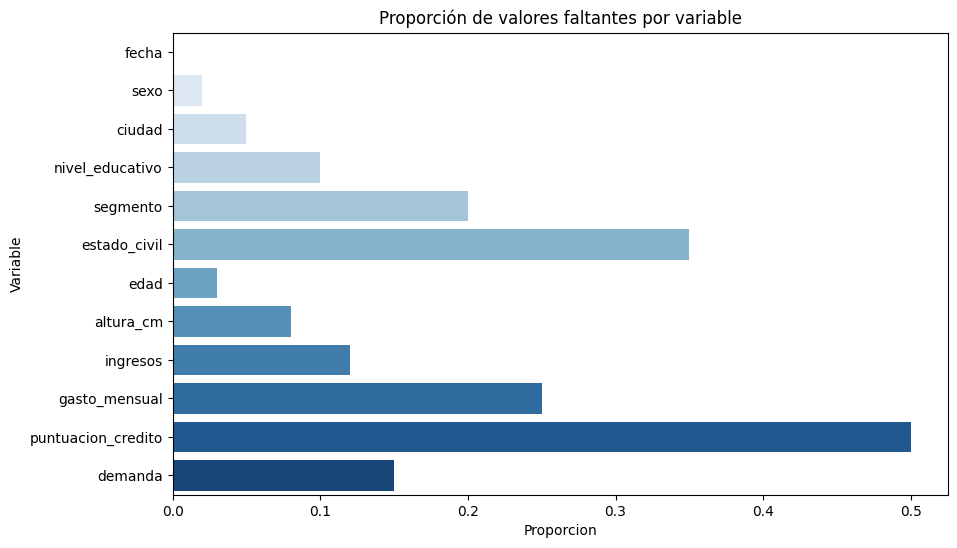

In [11]:
missing = df.isnull().mean().reset_index()
missing.columns = ["Variable", "Proporcion"]

plt.figure(figsize=(10,6))
sns.barplot(x="Proporcion", y="Variable", data=missing, palette="Blues")
plt.title("Proporción de valores faltantes por variable")
plt.show()

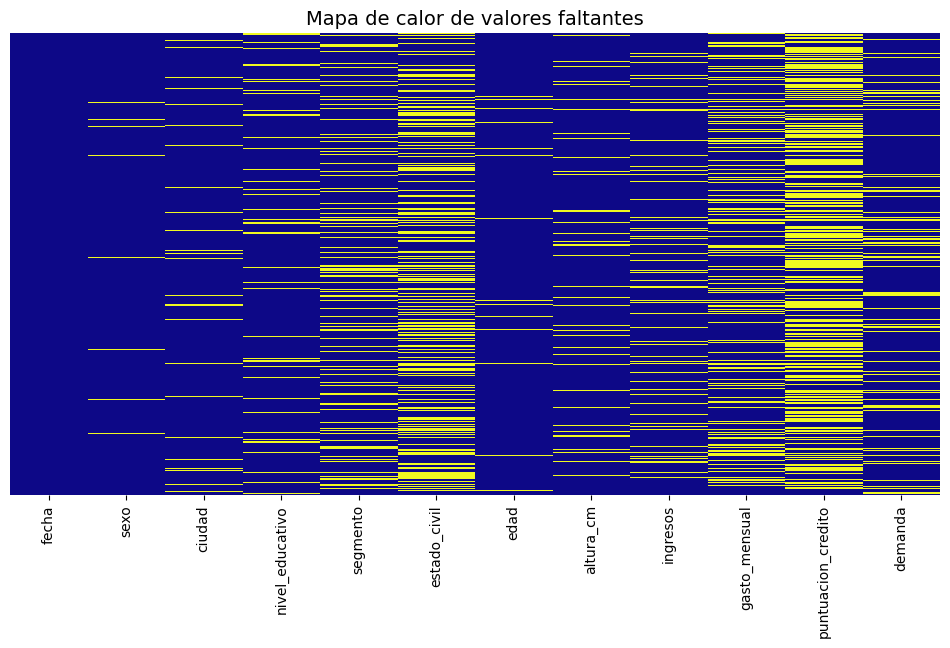

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='plasma')
plt.title("Mapa de calor de valores faltantes", fontsize=14)
plt.show()

Del análsisi anterior de valores faltantes podemos concluir que: la variable con más datos faltantes es `puntuacion_credito`, con un 50%, seguida de `estado_civil` (35%) y `gasto_mensual` (25%). Otras variables como `sexo`, `ciudad` o `fecha` tienen porcentajes muy bajos (menores al 5%). Esta visualización permite identificar fácilmente qué variables podrían requerir una imputación más cuidadosa o incluso ser descartadas si el porcentaje de datos faltantes es muy alto. 

## ***3. Clasificación del tipo faltante***

En primer lugar separo por medio de flags los datos faltantes y los que no.

In [13]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[f'flag_{col}'] = df[col].isnull().astype(int)

<Axes: >

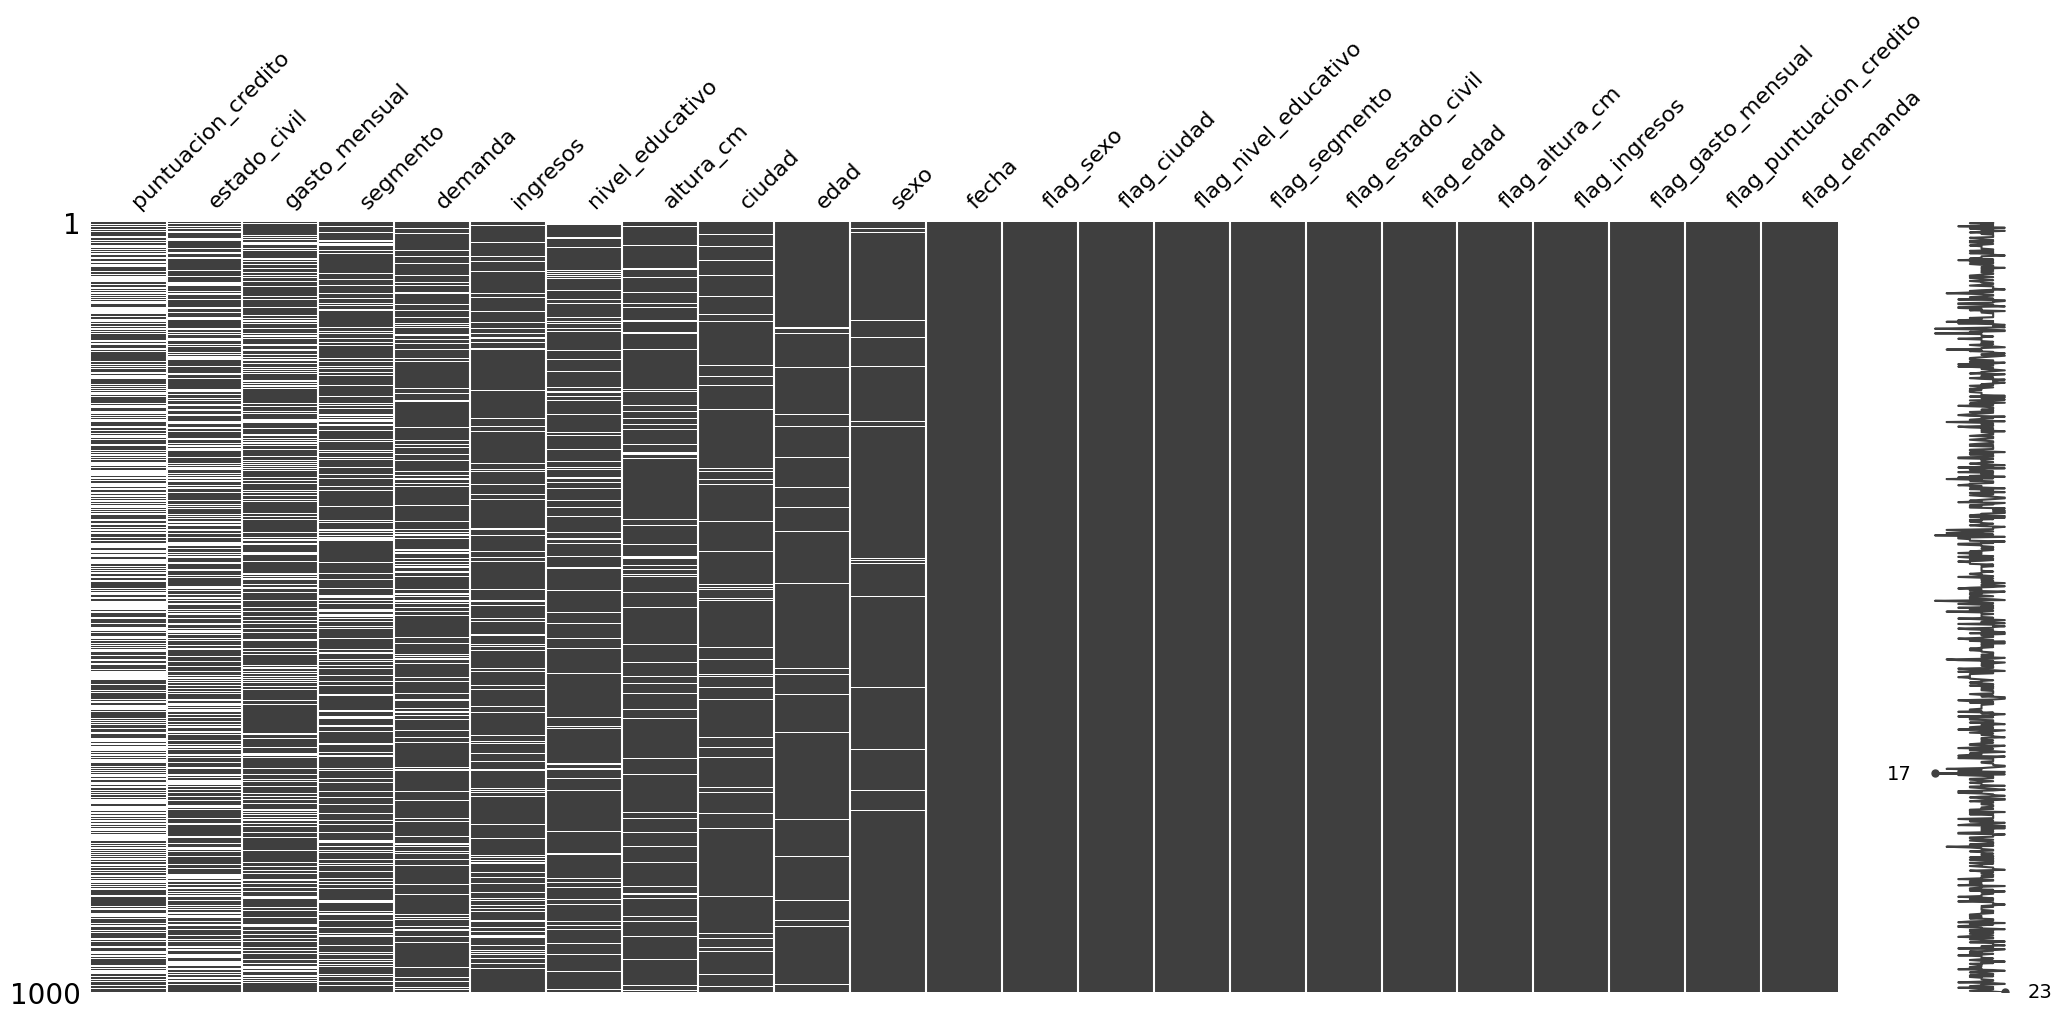

In [14]:
import missingno


df.pipe( lambda df: ( df[df.isna().sum().sort_values(ascending = False).index])
        ).pipe(missingno.matrix
    ) 

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

def graficar_faltante(df, flag_variable, max_cols=3):

    variable_original = flag_variable.replace("flag_", "")
    
    # Variables con las que comparar (excluye flags, fecha y la misma variable)
    variables = [
        col for col in df.columns
        if not col.startswith("flag_")
        and "fecha" not in col.lower()
        and col != variable_original
    ]
    
    print(f"Analizando: {flag_variable} vs otras variables ({len(variables)} gráficas)\n")
    
    n = len(variables)
    cols = min(max_cols, n)
    rows = math.ceil(n / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
    axes = axes.flatten()  # Aplana para indexar fácilmente

    for i, var in enumerate(variables):
        ax = axes[i]
        try:
            if pd.api.types.is_numeric_dtype(df[var]):
                sns.boxplot(x=flag_variable, y=var, data=df, ax=ax)
                ax.set_title(f'{var} por {flag_variable}')
            else:
                sns.countplot(x=var, hue=flag_variable, data=df, ax=ax)
                ax.set_title(f'{flag_variable} según {var}')
                ax.legend(title=flag_variable)
        except Exception as e:
            ax.text(0.5, 0.5, f"No se pudo graficar {var}\n{e}", ha='center', va='center')
            ax.set_axis_off()
    
    # Apagar ejes sobrantes si hay
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


Analizando: flag_puntuacion_credito vs otras variables (10 gráficas)



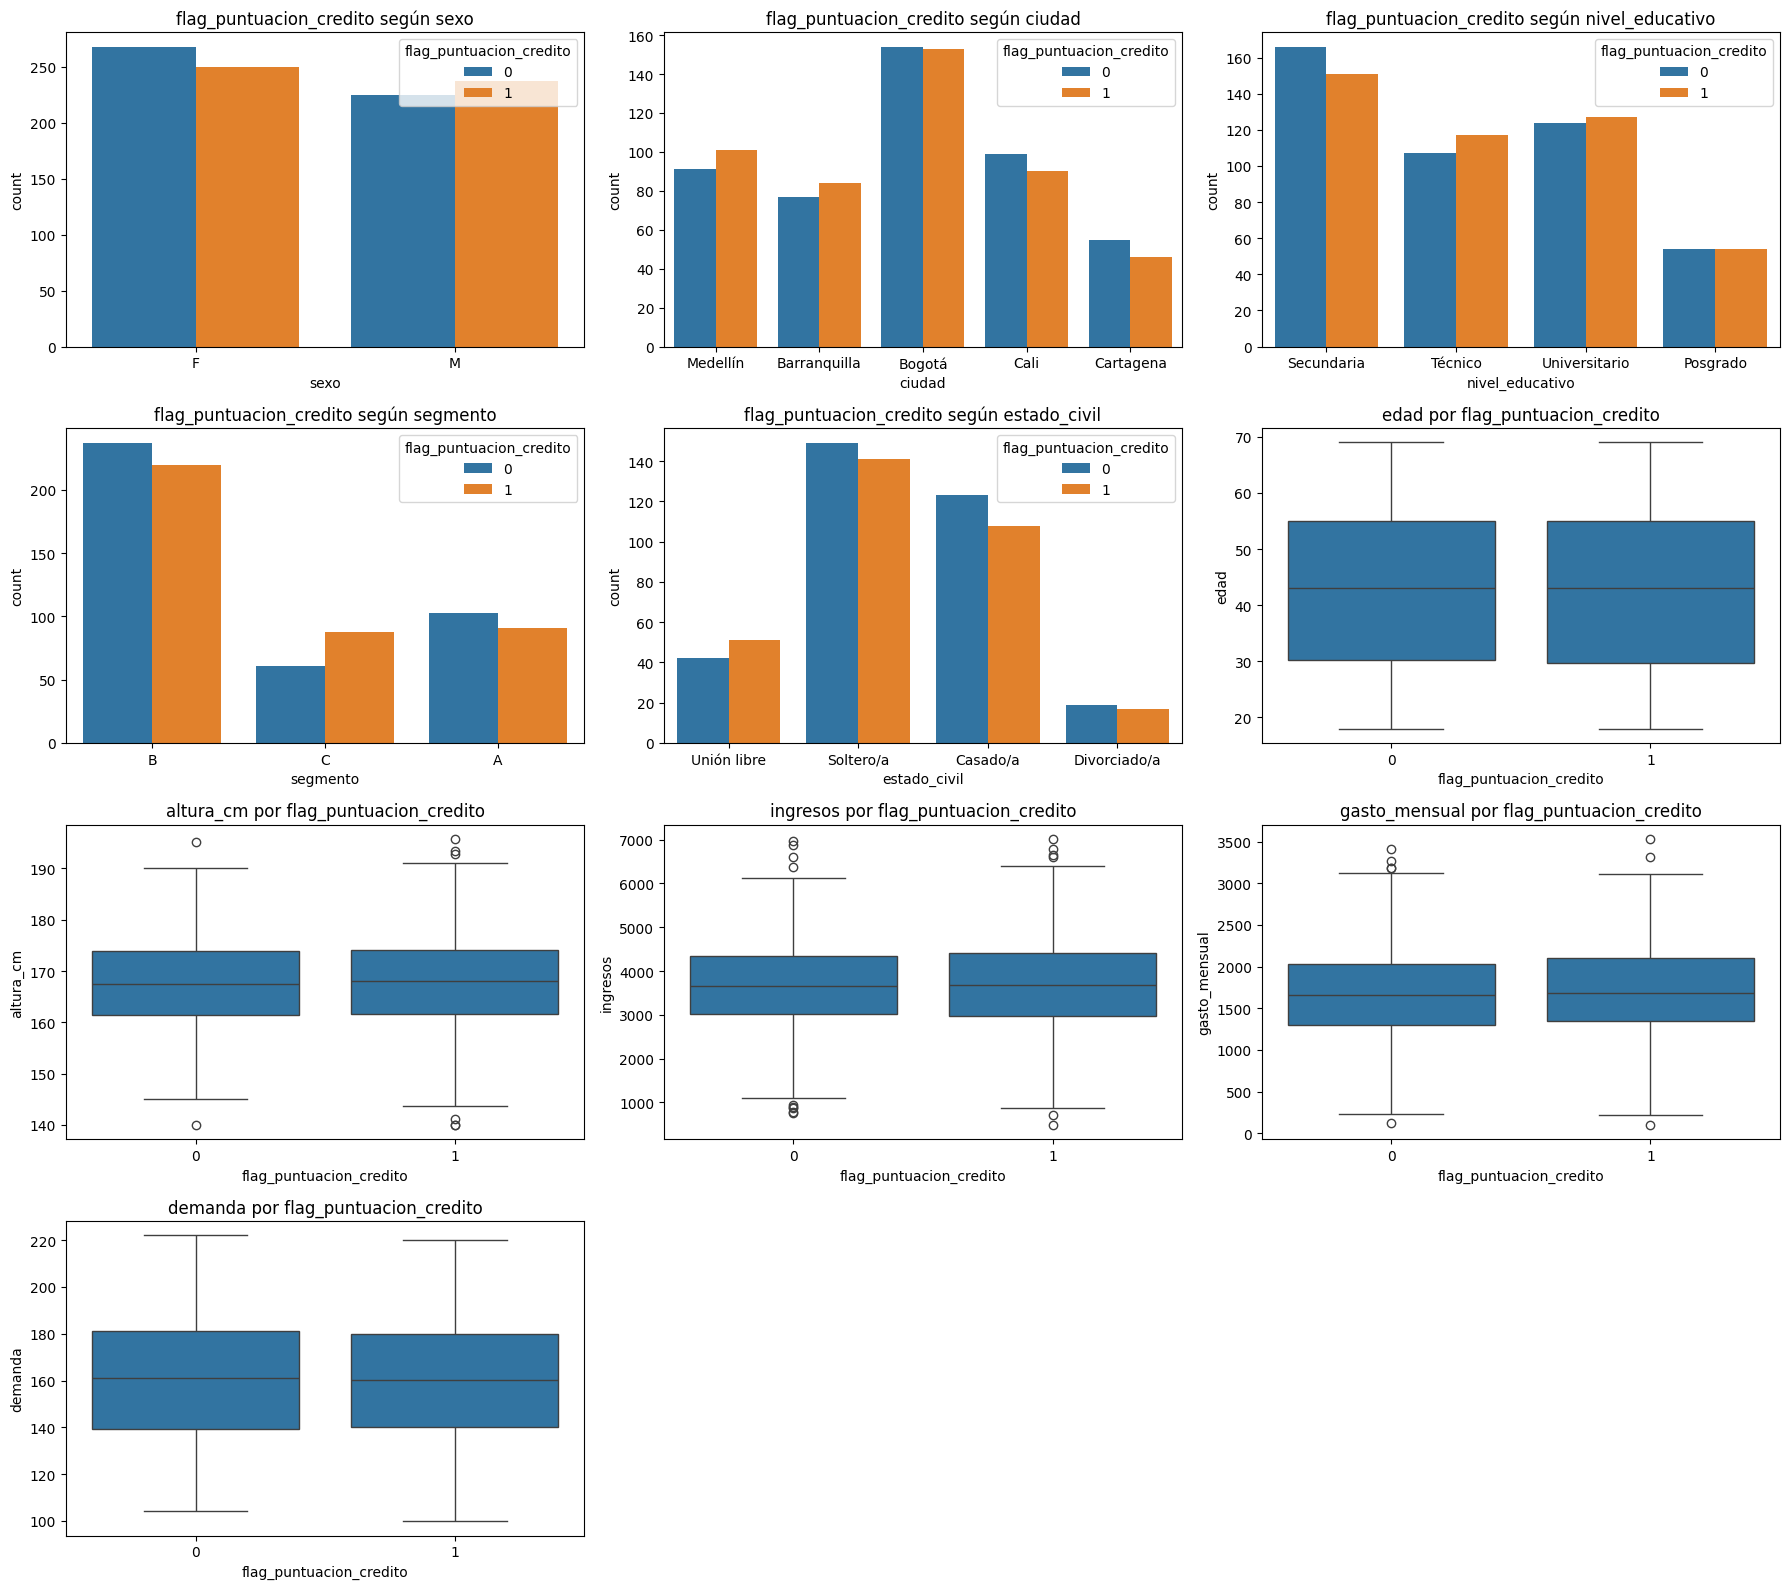

In [16]:
graficar_faltante(df, 'flag_puntuacion_credito')

Al observar las gráficas del flag de `puntuacion_credito` frente a las demás variables, se nota que la distribución de los datos faltantes es bastante similar entre los diferentes grupos de variables categóricas como sexo, ciudad, nivel educativo, segmento y estado civil, donde las barras de los valores presentes (0) y faltantes (1) se mantienen casi iguales en altura. Además, en las variables numéricas como edad, altura, ingresos, gasto mensual y demanda, los boxplots muestran distribuciones muy parecidas para ambos grupos de datos, con medianas, rangos intercuartílicos y valores atípicos muy similares. Esto indica que no hay una dependencia visible entre la presencia o ausencia de datos en `puntuacion_credito` y las otras variables del dataset. Por lo tanto, los valores faltantes en esta variable pueden clasificarse como **MCAR (Missing Completely At Random)**, ya que parecen ocurrir de manera aleatoria y no están relacionados ni con otras variables observadas ni con los valores de la misma variable.


Analizando: flag_estado_civil vs otras variables (10 gráficas)



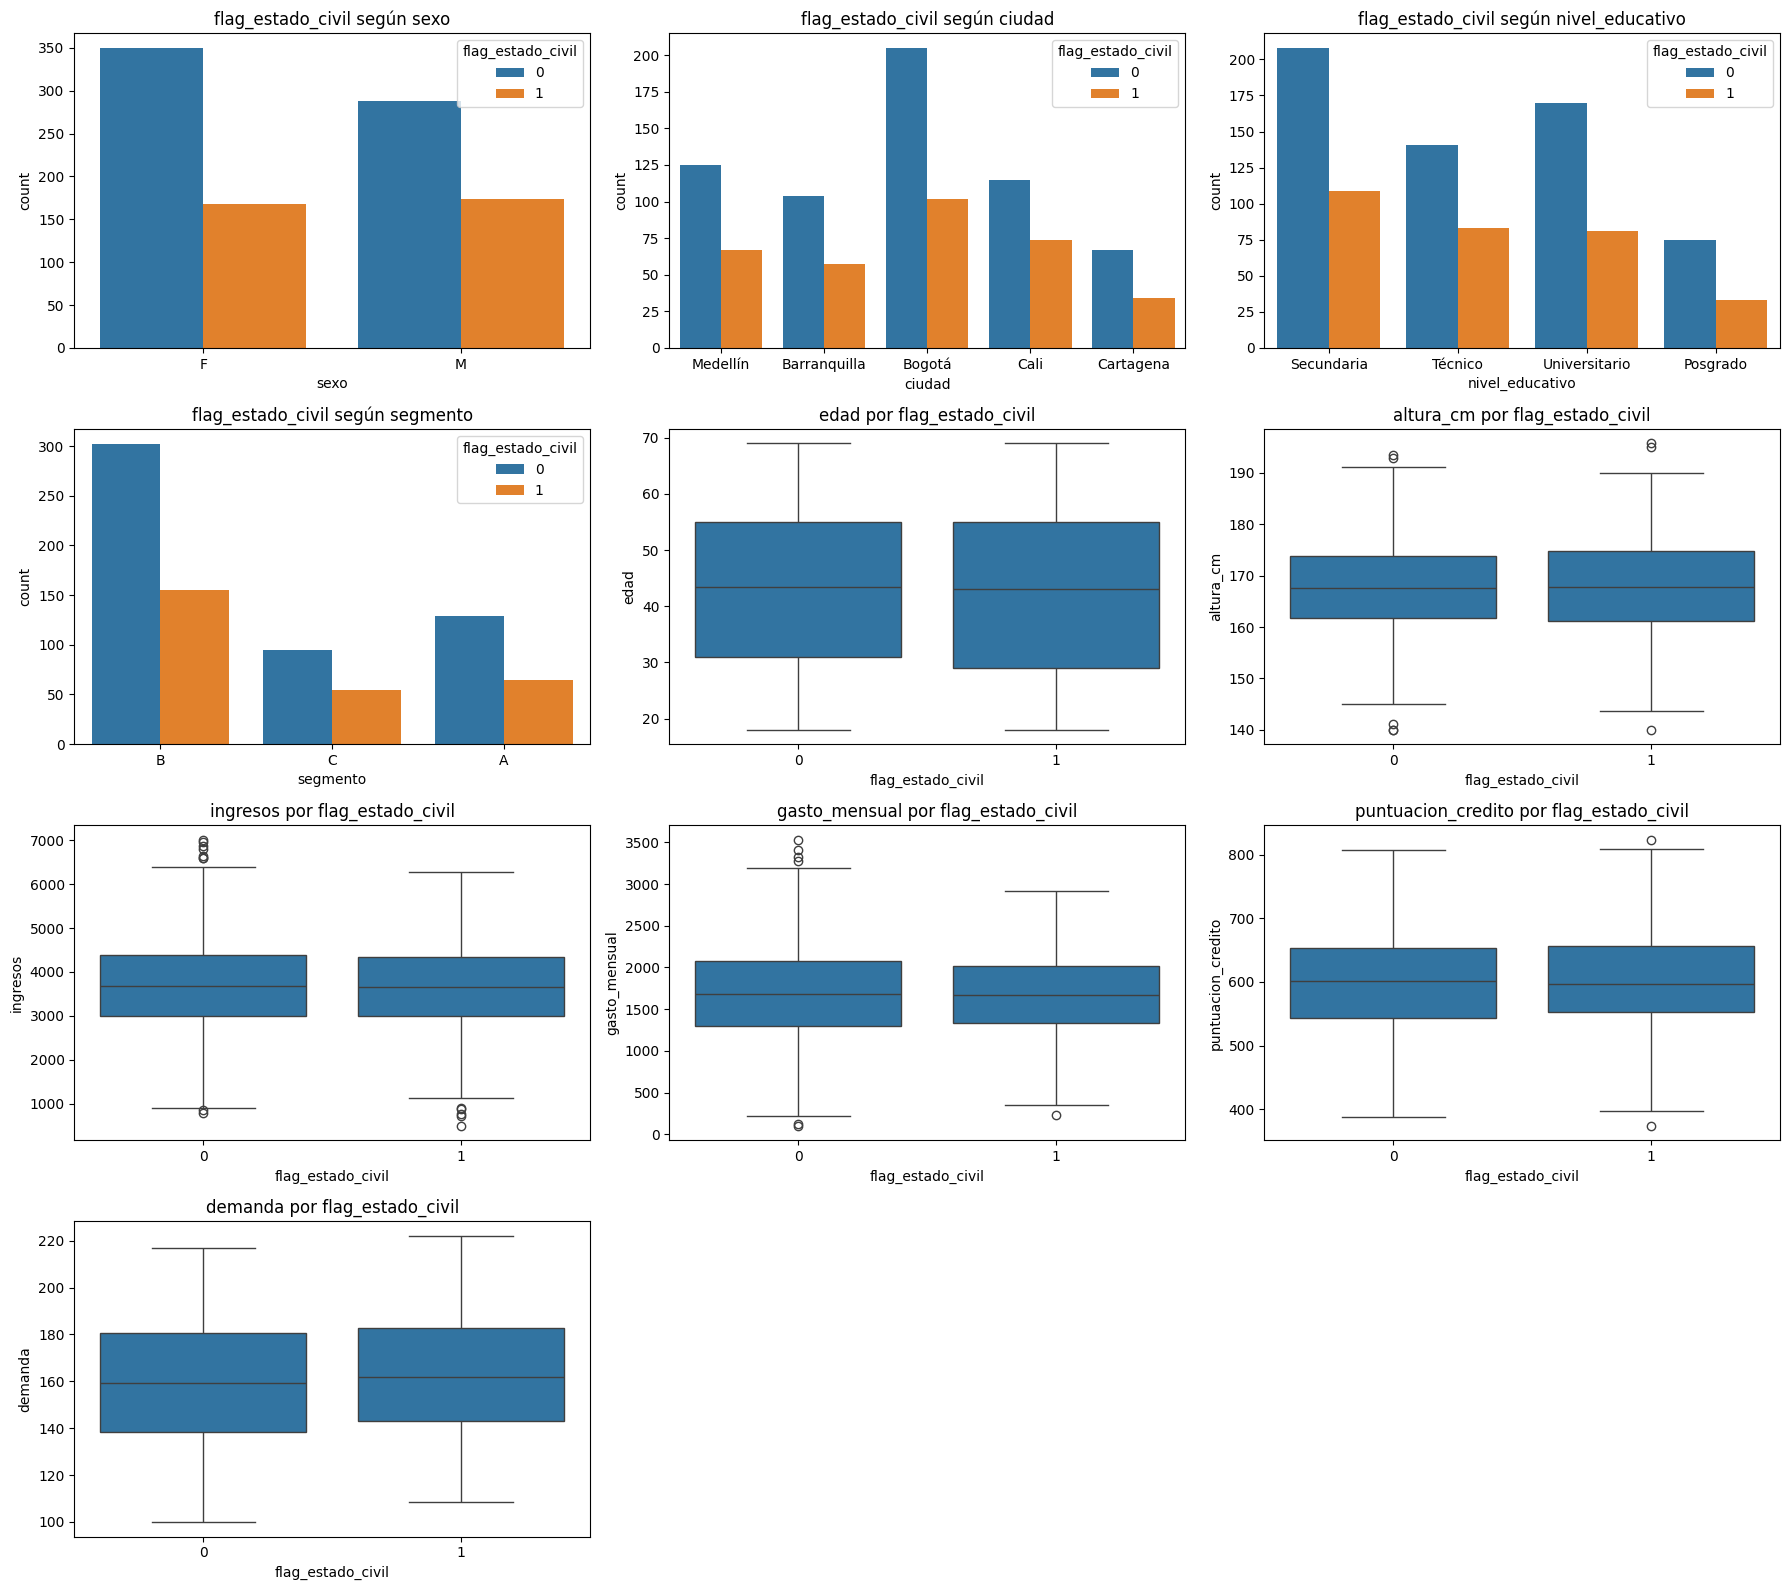

In [17]:
graficar_faltante(df, 'flag_estado_civil')

Analizando las gráficas que muestran la distribución del `estado civil` con respecto a otras variables, se observa que las proporciones de valores faltantes (flag_estado_civil = 1) varían significativamente según categorías como sexo, ciudad, nivel educativo y segmento. Por ejemplo, hay más valores faltantes en mujeres que en hombres, y también hay diferencias claras en ciertas ciudades y niveles educativos. Además, las distribuciones de variables continuas como edad, altura, ingresos, gasto mensual, puntuación de crédito y demanda no presentan grandes diferencias entre filas con y sin valores faltantes en estado civil, lo que indica que la ausencia no depende directamente de estas variables numéricas. Esto sugiere que los valores faltantes en estado civil no son completamente aleatorios (MCAR), sino que dependen de variables observadas como sexo, ciudad y nivel educativo. Por lo tanto, los datos faltantes en estado civil parecen ser del tipo **MAR (Missing At Random)**, donde la ausencia está relacionada con otras características observadas pero no con el valor mismo de la variable faltante.


Analizando: flag_gasto_mensual vs otras variables (10 gráficas)



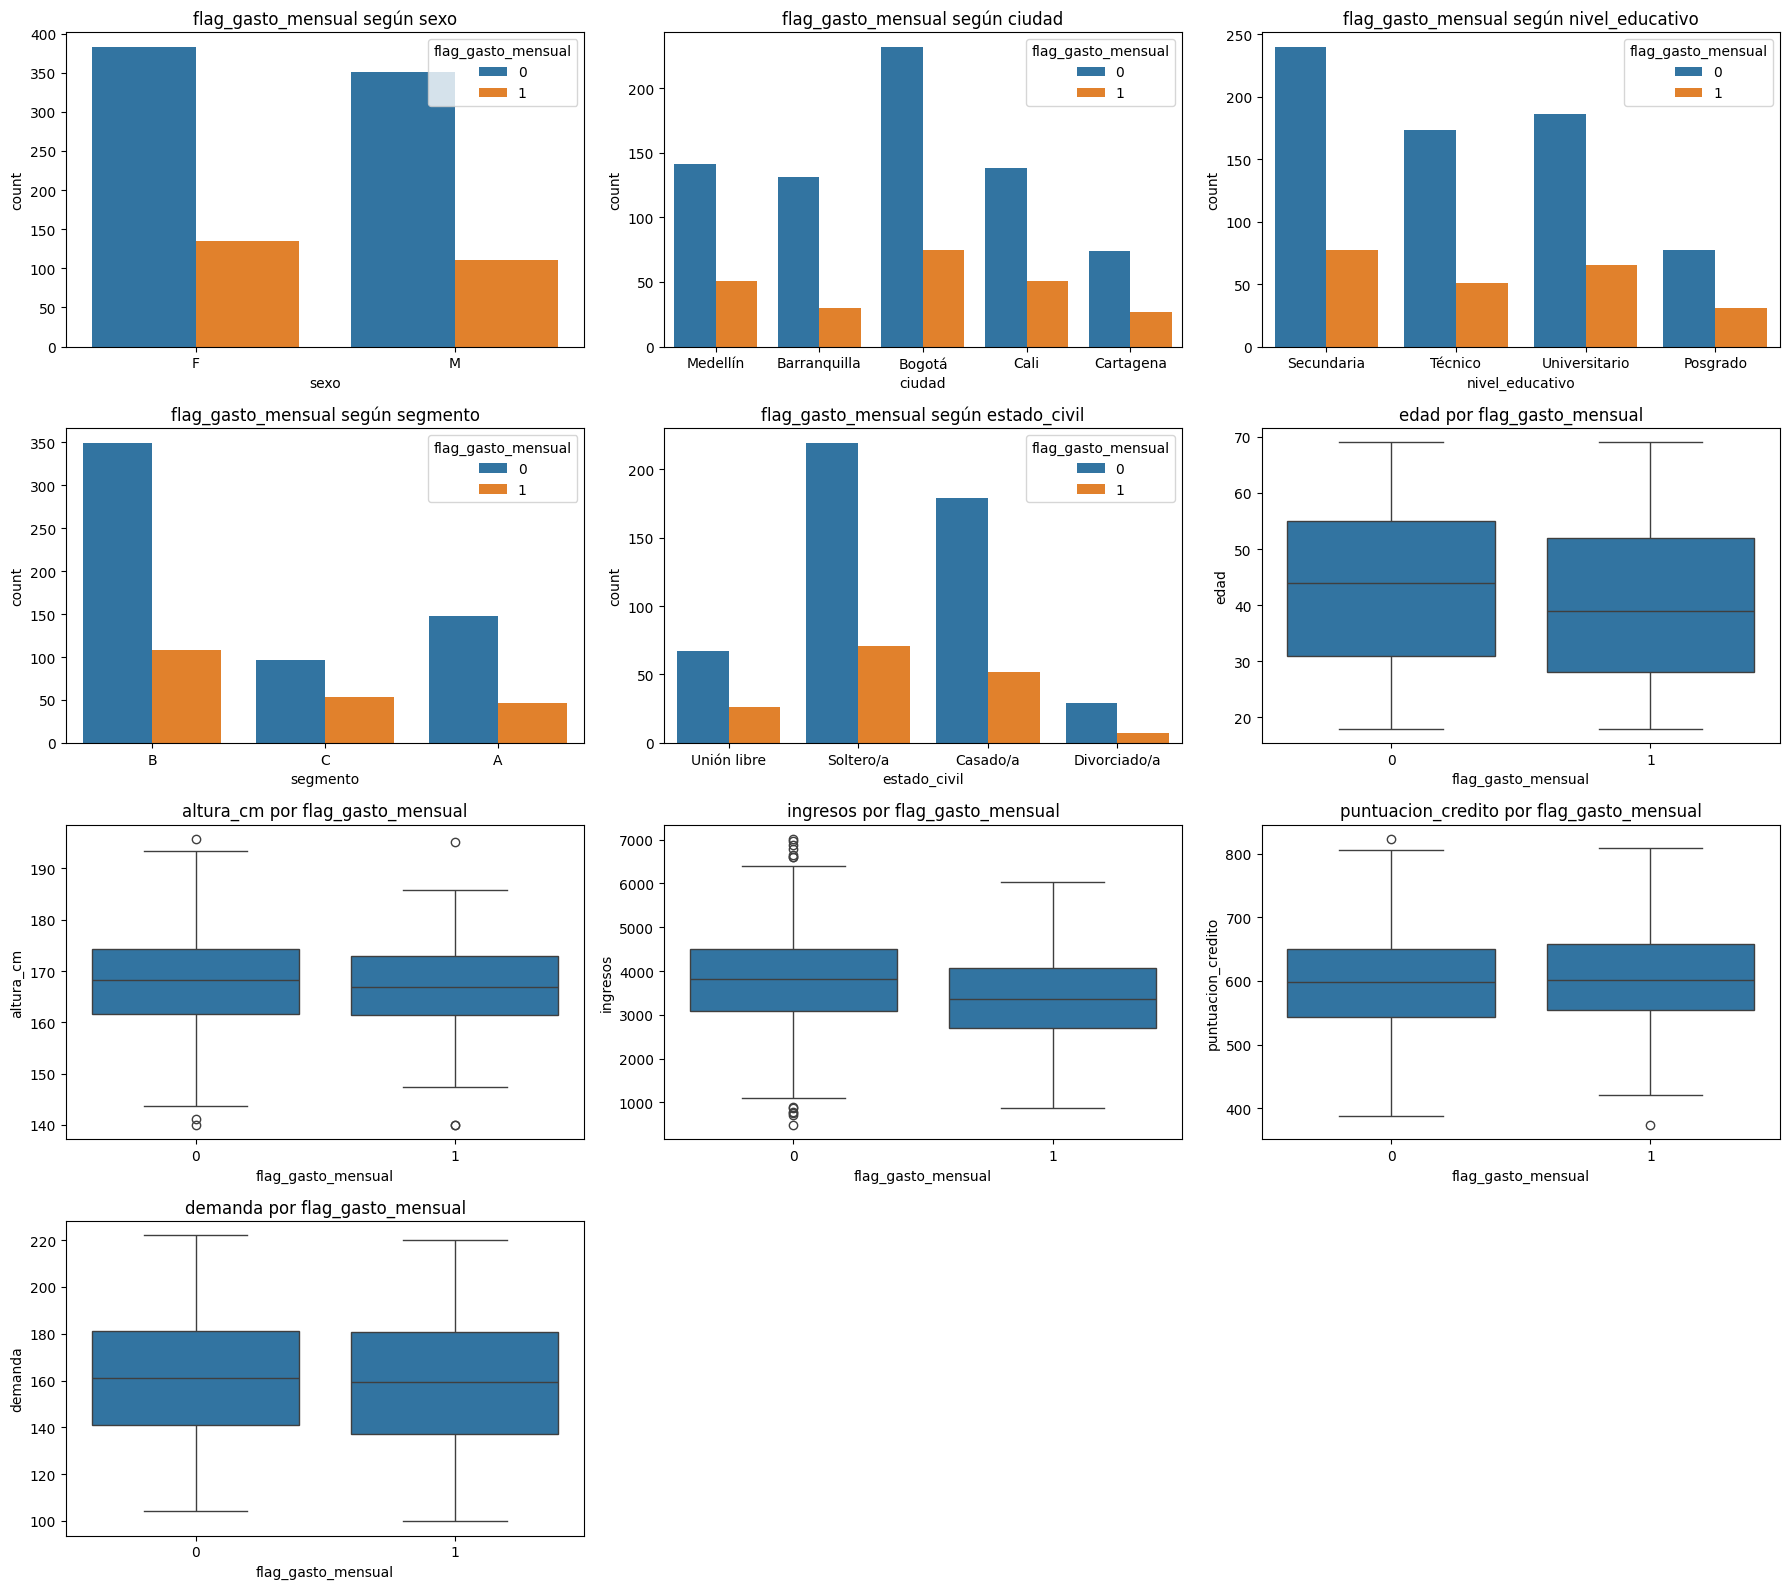

In [18]:
graficar_faltante(df, 'flag_gasto_mensual')

Al observar las gráficas que muestran la variable `flag_gasto_mensual` en función de diferentes categorías y variables continuas, se nota que las proporciones de valores faltantes varían claramente según sexo, ciudad, nivel educativo, segmento y estado civil. Por ejemplo, las mujeres tienen más valores faltantes que los hombres, y ciudades como Bogotá presentan una mayor cantidad de datos faltantes. Además, aunque las variables continuas como altura, ingresos, puntuación de crédito y demanda muestran distribuciones similares para filas con y sin datos faltantes, se observan ciertas diferencias en la variable edad, donde quienes tienen datos faltantes tienden a ser un poco más jóvenes en promedio. Estos patrones indican que los valores faltantes no ocurren de forma aleatoria sino que dependen de otras variables observadas. Por ello, se puede concluir que los datos faltantes en gasto mensual son del tipo **MAR (Missing At Random)**, ya que la ausencia está relacionada con otras características observables pero no con el valor de gasto mensual en sí mismo.


Analizando: flag_segmento vs otras variables (10 gráficas)



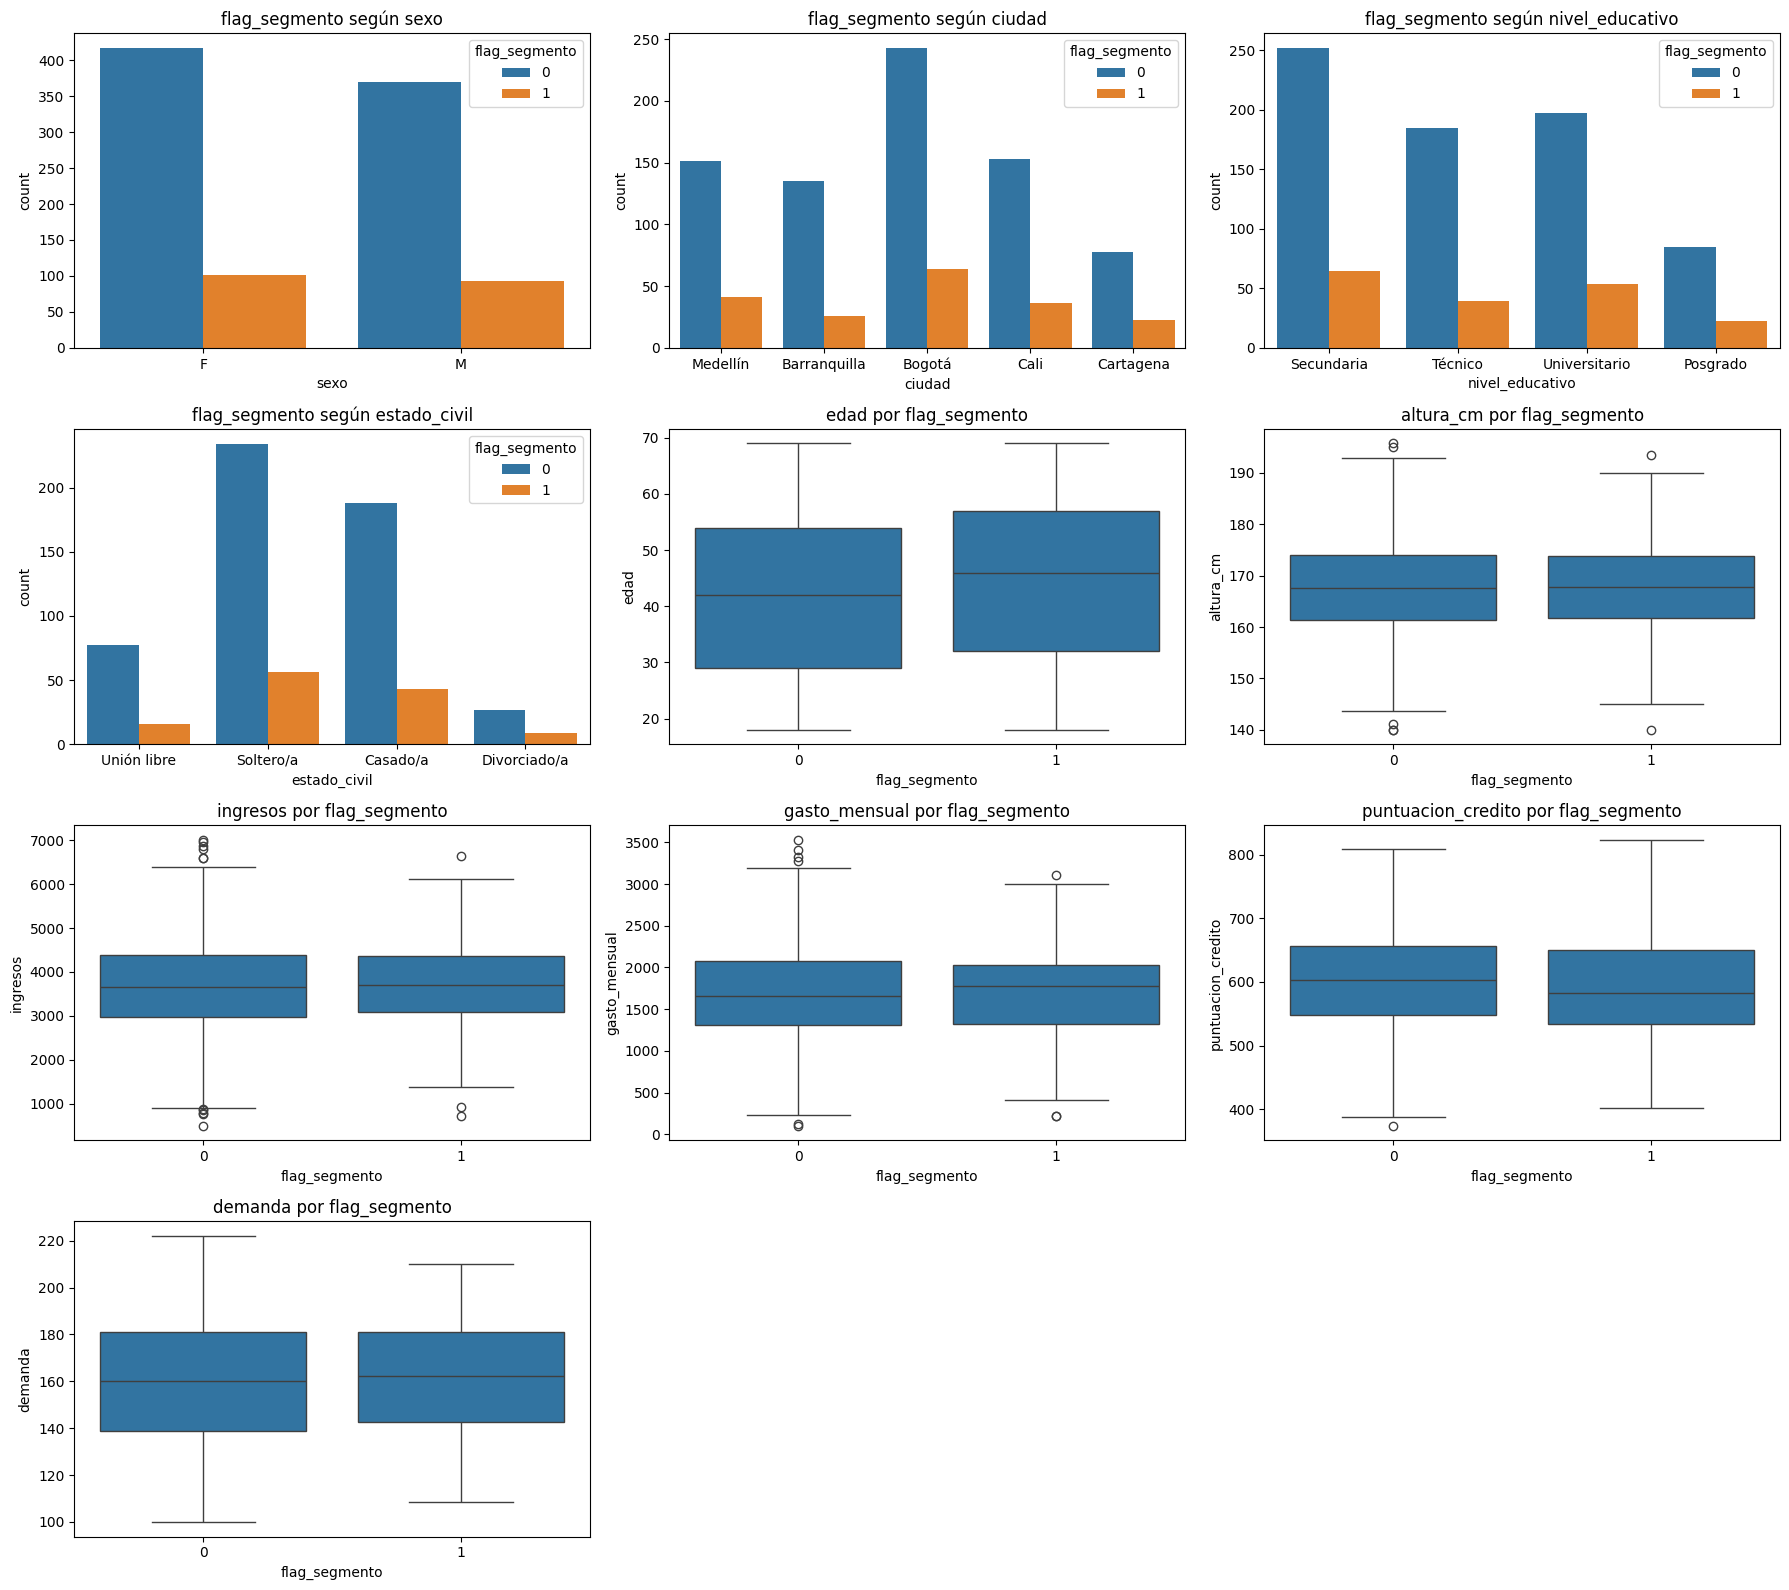

In [19]:
graficar_faltante(df, 'flag_segmento')

Al analizar las gráficas que relacionan el `flag_segmento` con variables categóricas y numéricas, se observa que la proporción de datos faltantes varía claramente según sexo, ciudad, nivel educativo y estado civil, indicando una relación entre los datos faltantes y estas variables observadas. Por ejemplo, en ciudades como Bogotá y Medellín hay una mayor cantidad de datos faltantes en comparación con otras ciudades, y también se nota que ciertos niveles educativos tienen más valores faltantes. Sin embargo, las variables continuas como edad, altura, ingresos, gasto mensual, puntuación de crédito y demanda presentan distribuciones bastante similares entre los grupos con y sin datos faltantes, sin diferencias muy marcadas que sugieran un sesgo fuerte. Esto sugiere que la ausencia de datos no depende directamente del valor del segmento, sino que está relacionada con otras características observables. Por lo tanto, se puede concluir que los valores faltantes para esta variable también son del tipo **MAR (Missing At Random)**, ya que la probabilidad de que falten datos depende de otras variables observadas en el dataset.


Analizando: flag_demanda vs otras variables (10 gráficas)



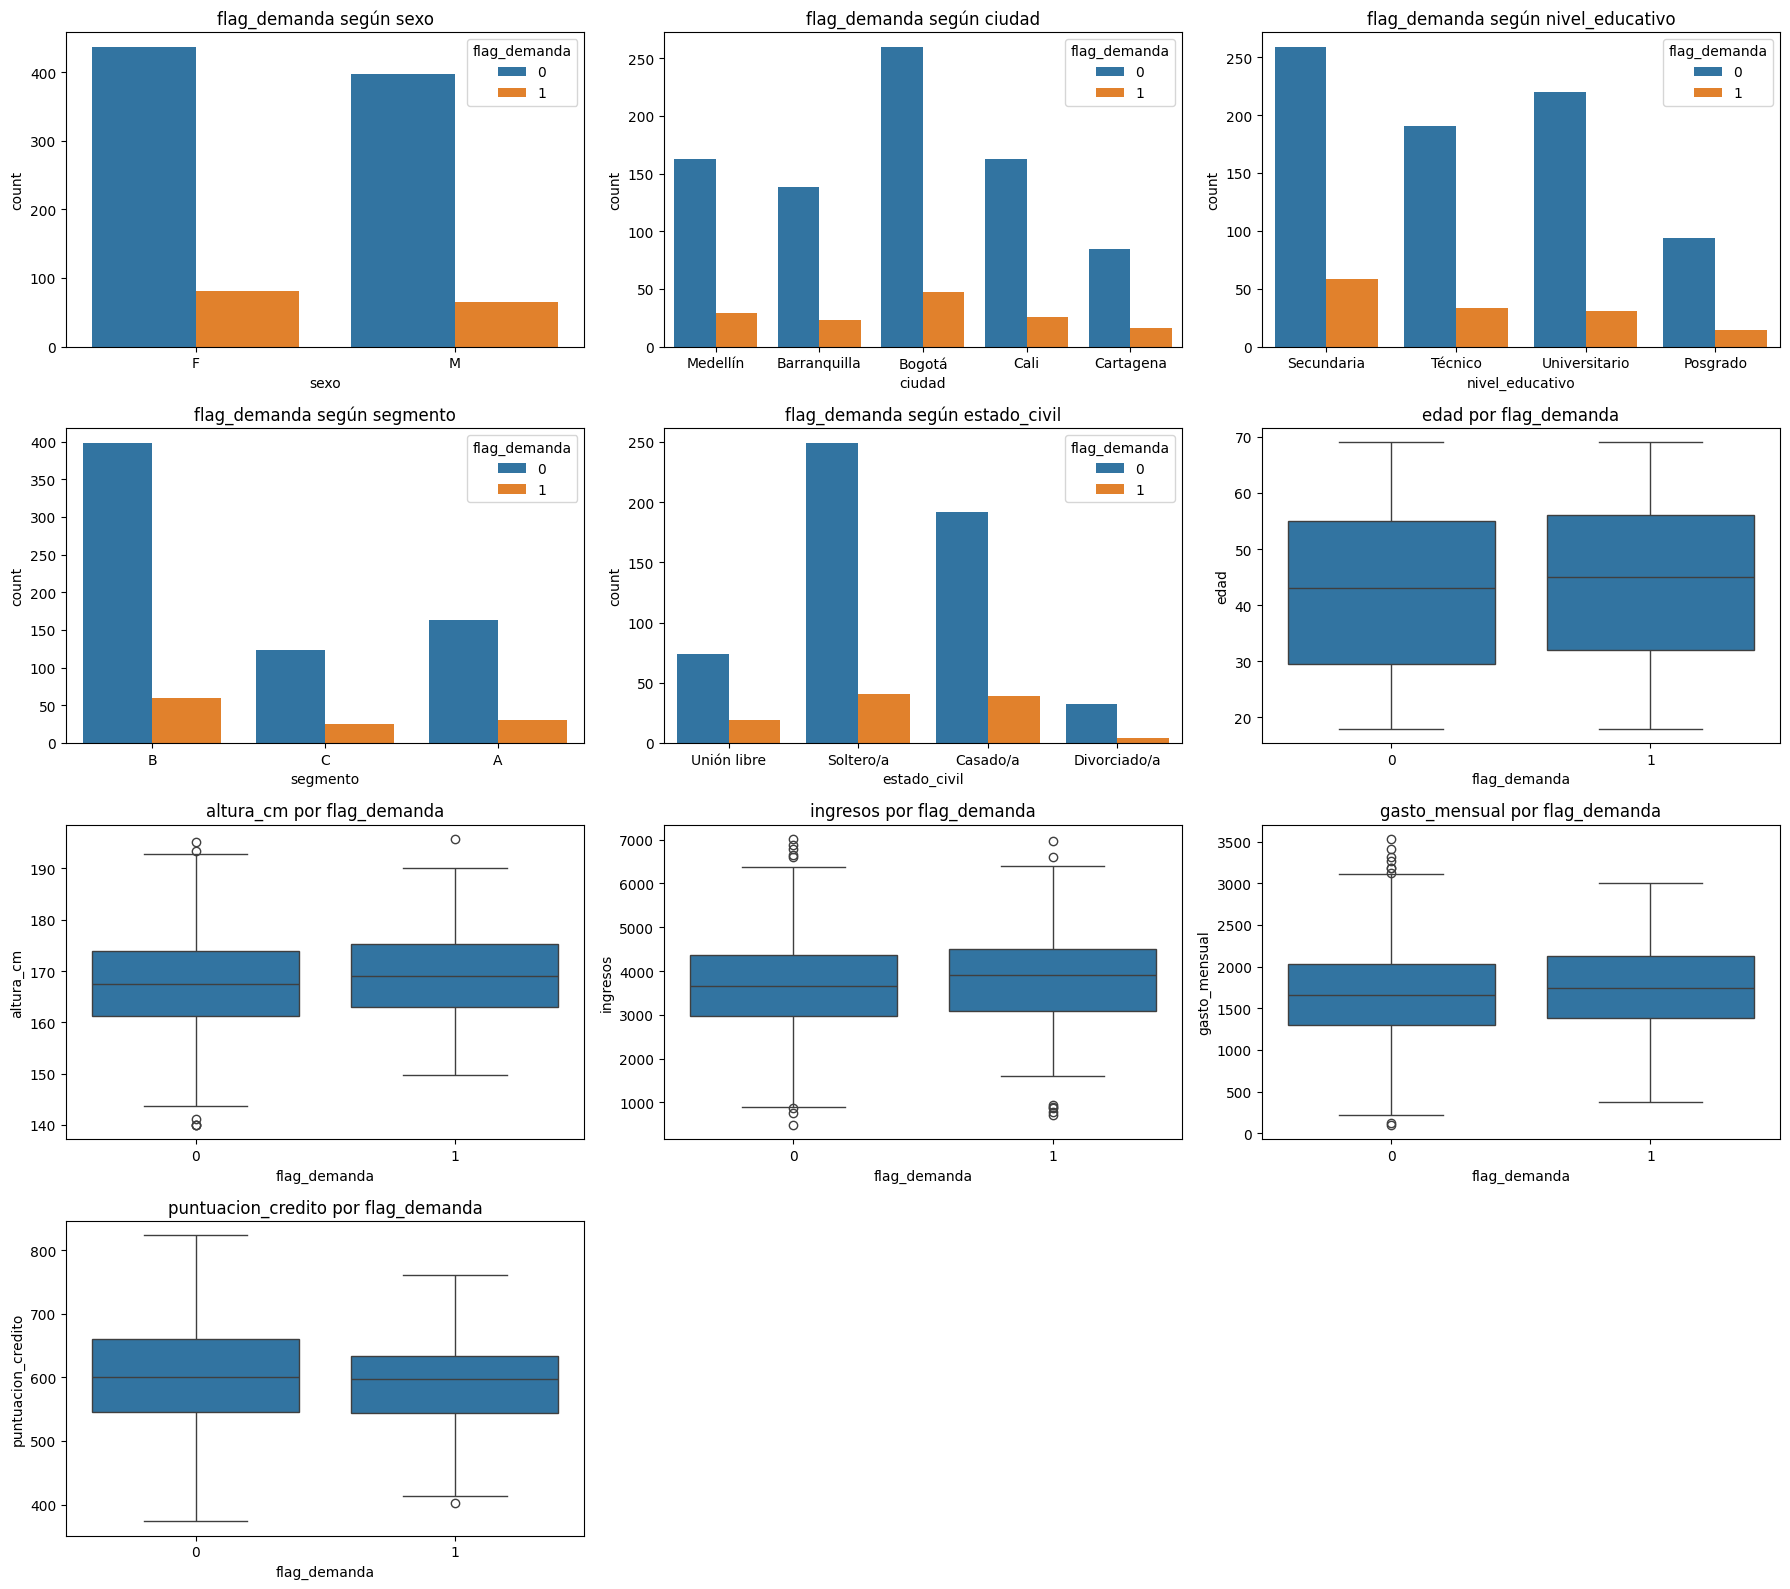

In [20]:
graficar_faltante(df, 'flag_demanda')

Al observar las gráficas relacionadas con el `flag_demanda`, se nota que la proporción de datos faltantes varía según variables categóricas como sexo, ciudad, nivel educativo, segmento y estado civil, mostrando que la ausencia de datos está relacionada con estas características observadas. Por ejemplo, hay una mayor cantidad de datos faltantes en ciertas ciudades como Bogotá y Medellín, y también en niveles educativos como secundaria y técnico. Sin embargo, cuando se analizan las variables continuas como edad, altura, ingresos, gasto mensual y puntuación de crédito, no se observan diferencias significativas en sus distribuciones entre quienes tienen y no tienen datos faltantes. Esto indica que la probabilidad de que falten datos no depende directamente del valor de la variable demanda sino de otras variables observadas en el conjunto de datos. Por lo tanto, estos valores faltantes pueden considerarse del tipo **MAR (Missing At Random)**, porque la ausencia de información depende de otras variables observadas y no del valor mismo de la variable que falta.


Analizando: flag_ingresos vs otras variables (10 gráficas)



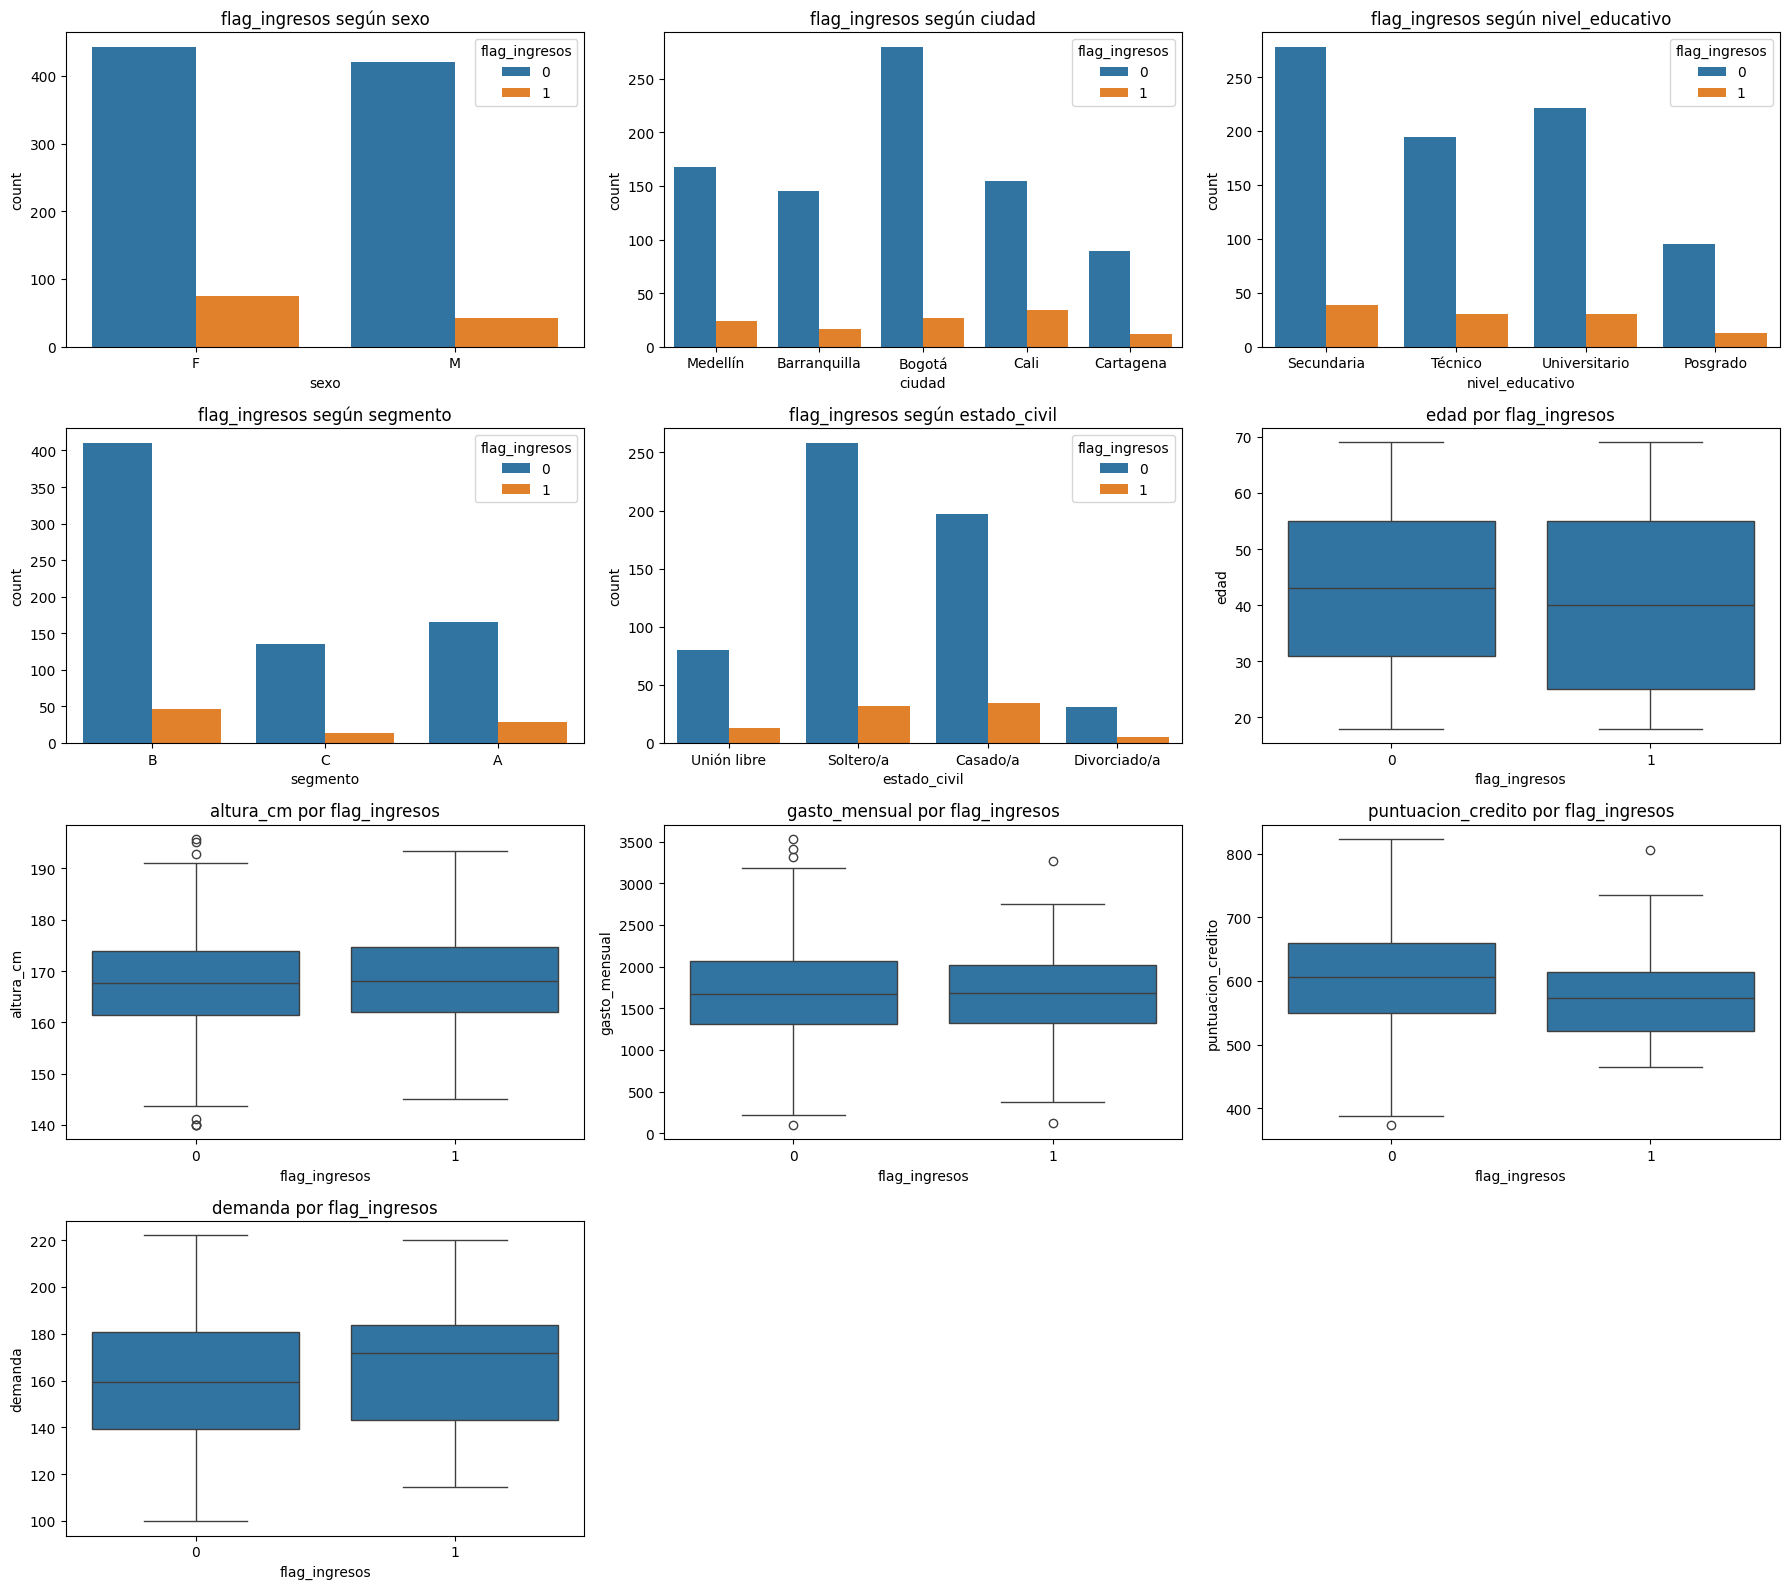

In [21]:
graficar_faltante(df, 'flag_ingresos')

Analizando las gráficas del `flag_ingresos`, se observa que la proporción de datos faltantes está relacionada con variables categóricas como sexo, ciudad, nivel educativo, segmento y estado civil, donde ciertos grupos presentan mayor ausencia de información. Por ejemplo, ciudades como Bogotá y Cali, o niveles educativos como secundaria y técnico muestran una mayor cantidad de valores faltantes en ingresos. Sin embargo, al revisar las variables continuas como edad, altura, gasto mensual, puntuación de crédito y demanda, las distribuciones son muy similares entre quienes tienen datos faltantes y quienes no. Esto sugiere que la probabilidad de que falten datos de ingresos no depende directamente del valor de los ingresos mismos, sino de otras características observadas en el conjunto de datos. Por lo tanto, estos valores faltantes también pueden considerarse del tipo **MAR (Missing At Random)**, dado que la ausencia de datos está condicionada por otras variables observadas y no por la variable ingresos en sí.


Analizando: flag_nivel_educativo vs otras variables (10 gráficas)



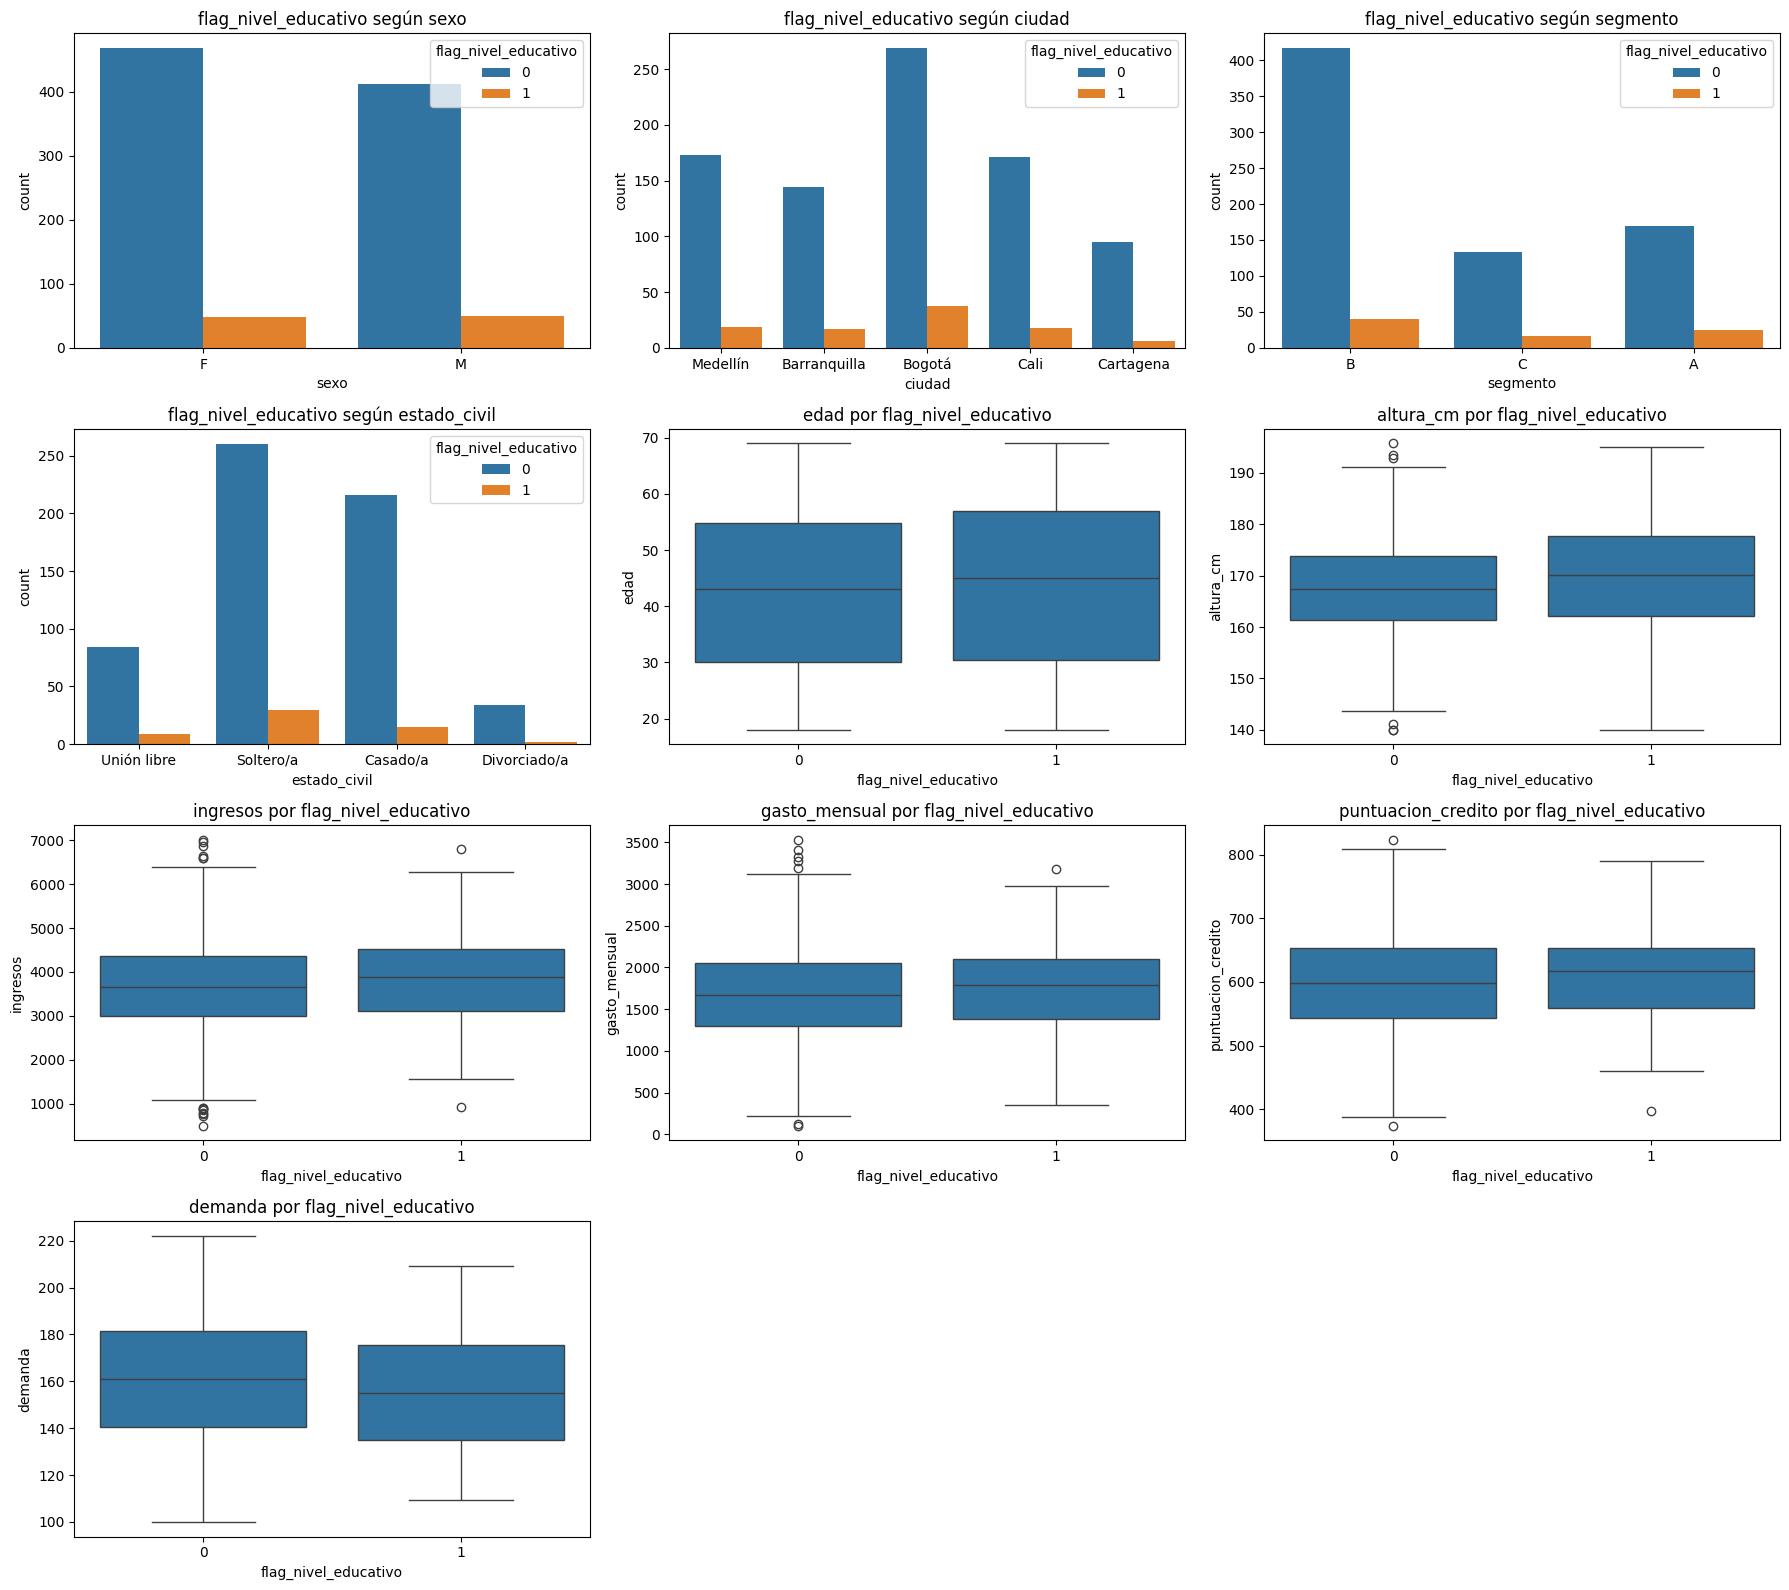

In [22]:
graficar_faltante(df, 'flag_nivel_educativo')

Al observar las gráficas correspondientes al `flag_nivel_educativo`, se puede notar que la proporción de datos faltantes varía según categorías como sexo, ciudad, segmento y estado civil, lo que indica que ciertas subpoblaciones tienen más ausencia de información que otras. Por ejemplo, en ciudades como Bogotá y Barranquilla y en el estado civil de soltero/a hay una mayor cantidad de datos faltantes. Sin embargo, cuando se analizan las variables continuas como edad, altura, ingresos, gasto mensual, puntuación de crédito y demanda, no se aprecian diferencias notables en sus distribuciones entre quienes tienen y no tienen datos de nivel educativo. Esto indica que la ausencia de esta información no depende directamente del valor del nivel educativo ni de estas variables continuas, sino que está asociada a otras variables observadas. Por ende, podemos concluir que los valores faltantes en nivel educativo son del tipo **MAR (Missing At Random)**, ya que la probabilidad de que falten datos depende de otras variables observadas en el dataset.


Analizando: flag_altura_cm vs otras variables (10 gráficas)



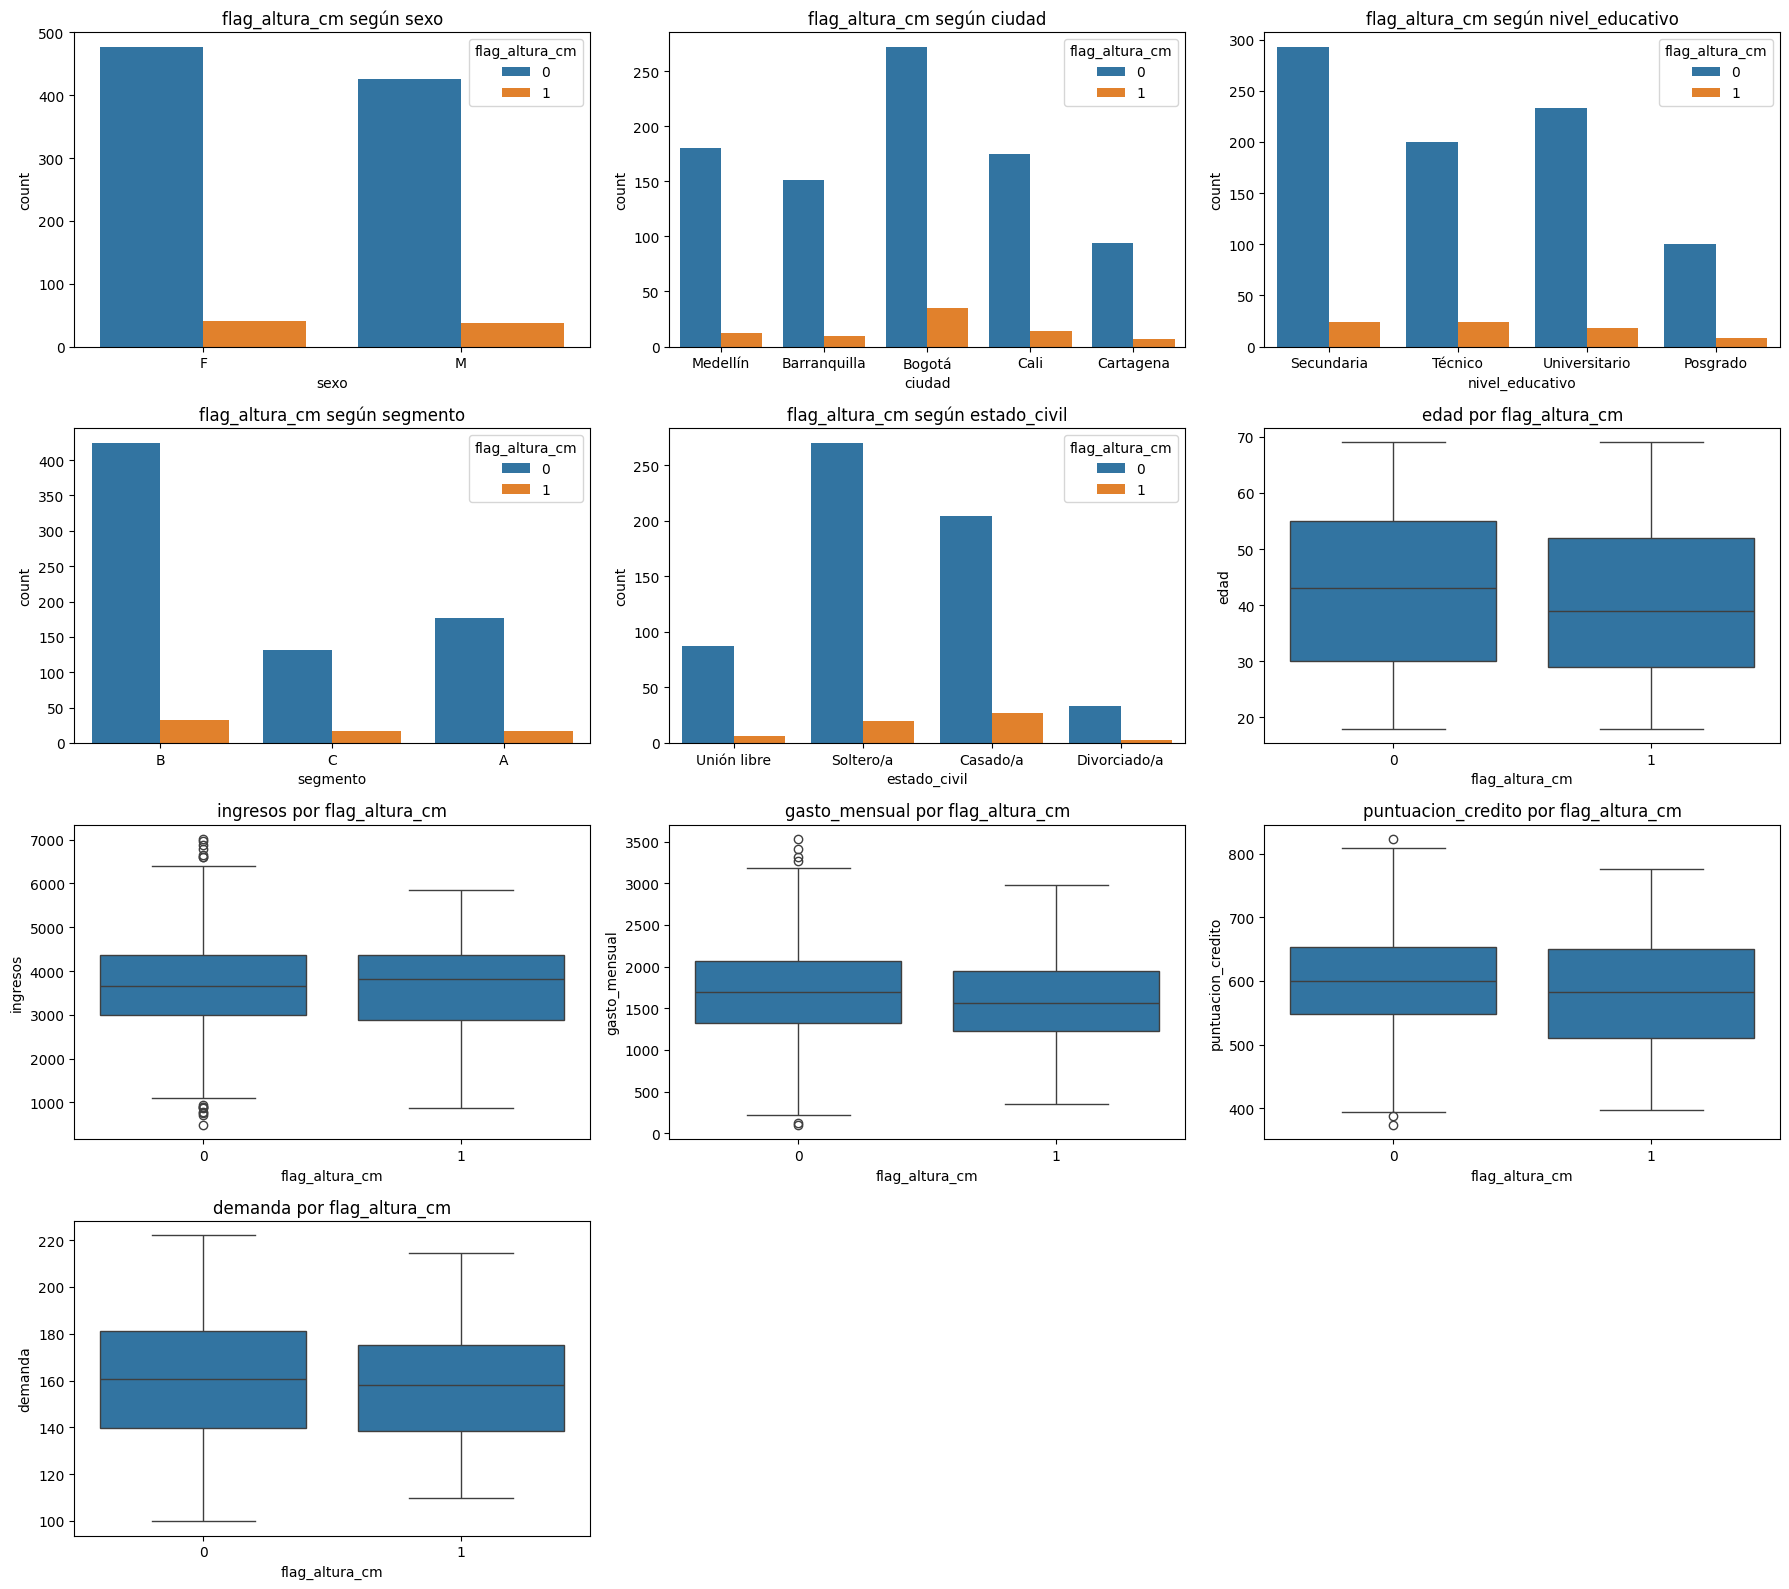

In [23]:
graficar_faltante(df, 'flag_altura_cm')

Analizando las gráficas de barras y los boxplots para la variable `altura_cm` y su flag de datos faltantes, se observa que la proporción de datos faltantes no es completamente uniforme entre las categorías de sexo, ciudad, nivel educativo, segmento y estado civil. Por ejemplo, hay una ligera diferencia en la cantidad relativa de datos faltantes entre hombres y mujeres, así como entre ciudades como Bogotá y Cartagena. Además, en los boxplots, las distribuciones de variables como edad, ingresos y gasto mensual son similares entre los grupos con datos faltantes y sin datos faltantes, pero existen diferencias sutiles en algunas categorías. Esto sugiere que los datos faltantes no son completamente aleatorios (MCAR), sino que probablemente son **Missing At Random (MAR)**, donde la ausencia de datos depende parcialmente de variables observables como la ciudad o el nivel educativo.


Analizando: flag_ciudad vs otras variables (10 gráficas)



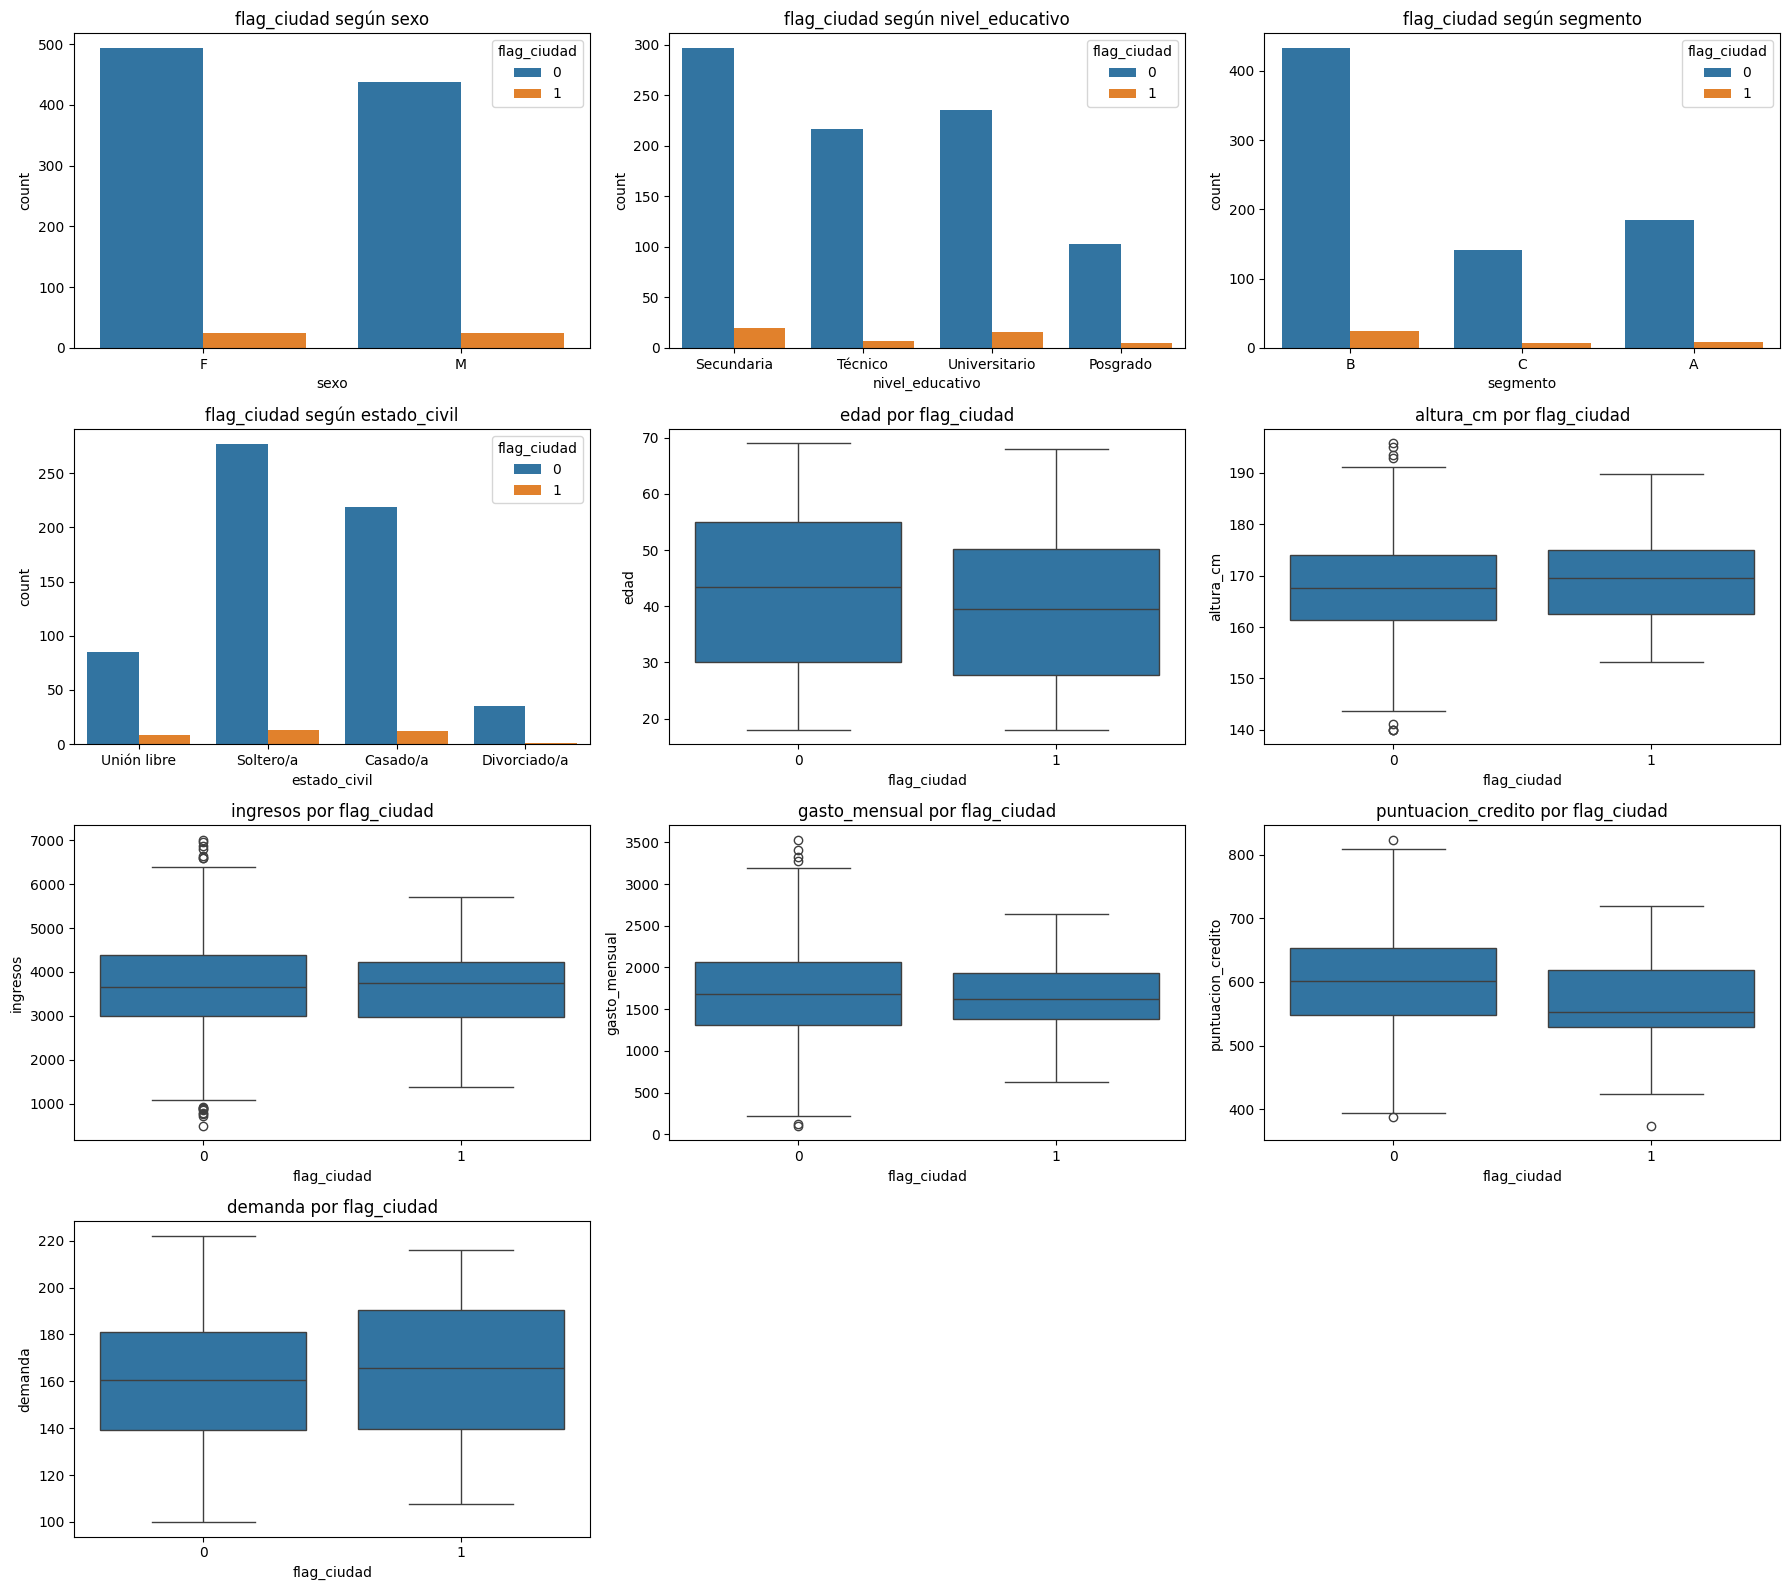

In [24]:
graficar_faltante(df, 'flag_ciudad')

Al observar las gráficas de barras y boxplots relacionadas con la variable `ciudad` y su flag de datos faltantes, se nota que la proporción de datos faltantes varía en función de algunas categorías como el nivel educativo y el estado civil, mientras que en sexo y segmento la proporción es más homogénea. Además, en las distribuciones de variables cuantitativas como ingresos, gasto mensual, edad y puntaje de crédito, se aprecian diferencias claras entre los grupos con y sin datos faltantes, especialmente en gasto mensual y puntaje de crédito, donde los valores tienden a ser menores en el grupo con datos faltantes. Esto indica que los valores faltantes en la variable ciudad no están distribuidos de forma completamente aleatoria (no MCAR), sino que dependen de características observables y de otras variables en el conjunto de datos, lo que sugiere un mecanismo de **Missing At Random (MAR)**. Por lo tanto, la ausencia de información sobre ciudad está relacionada con otras variables del conjunto, y no es simplemente por azar.


Analizando: flag_edad vs otras variables (10 gráficas)



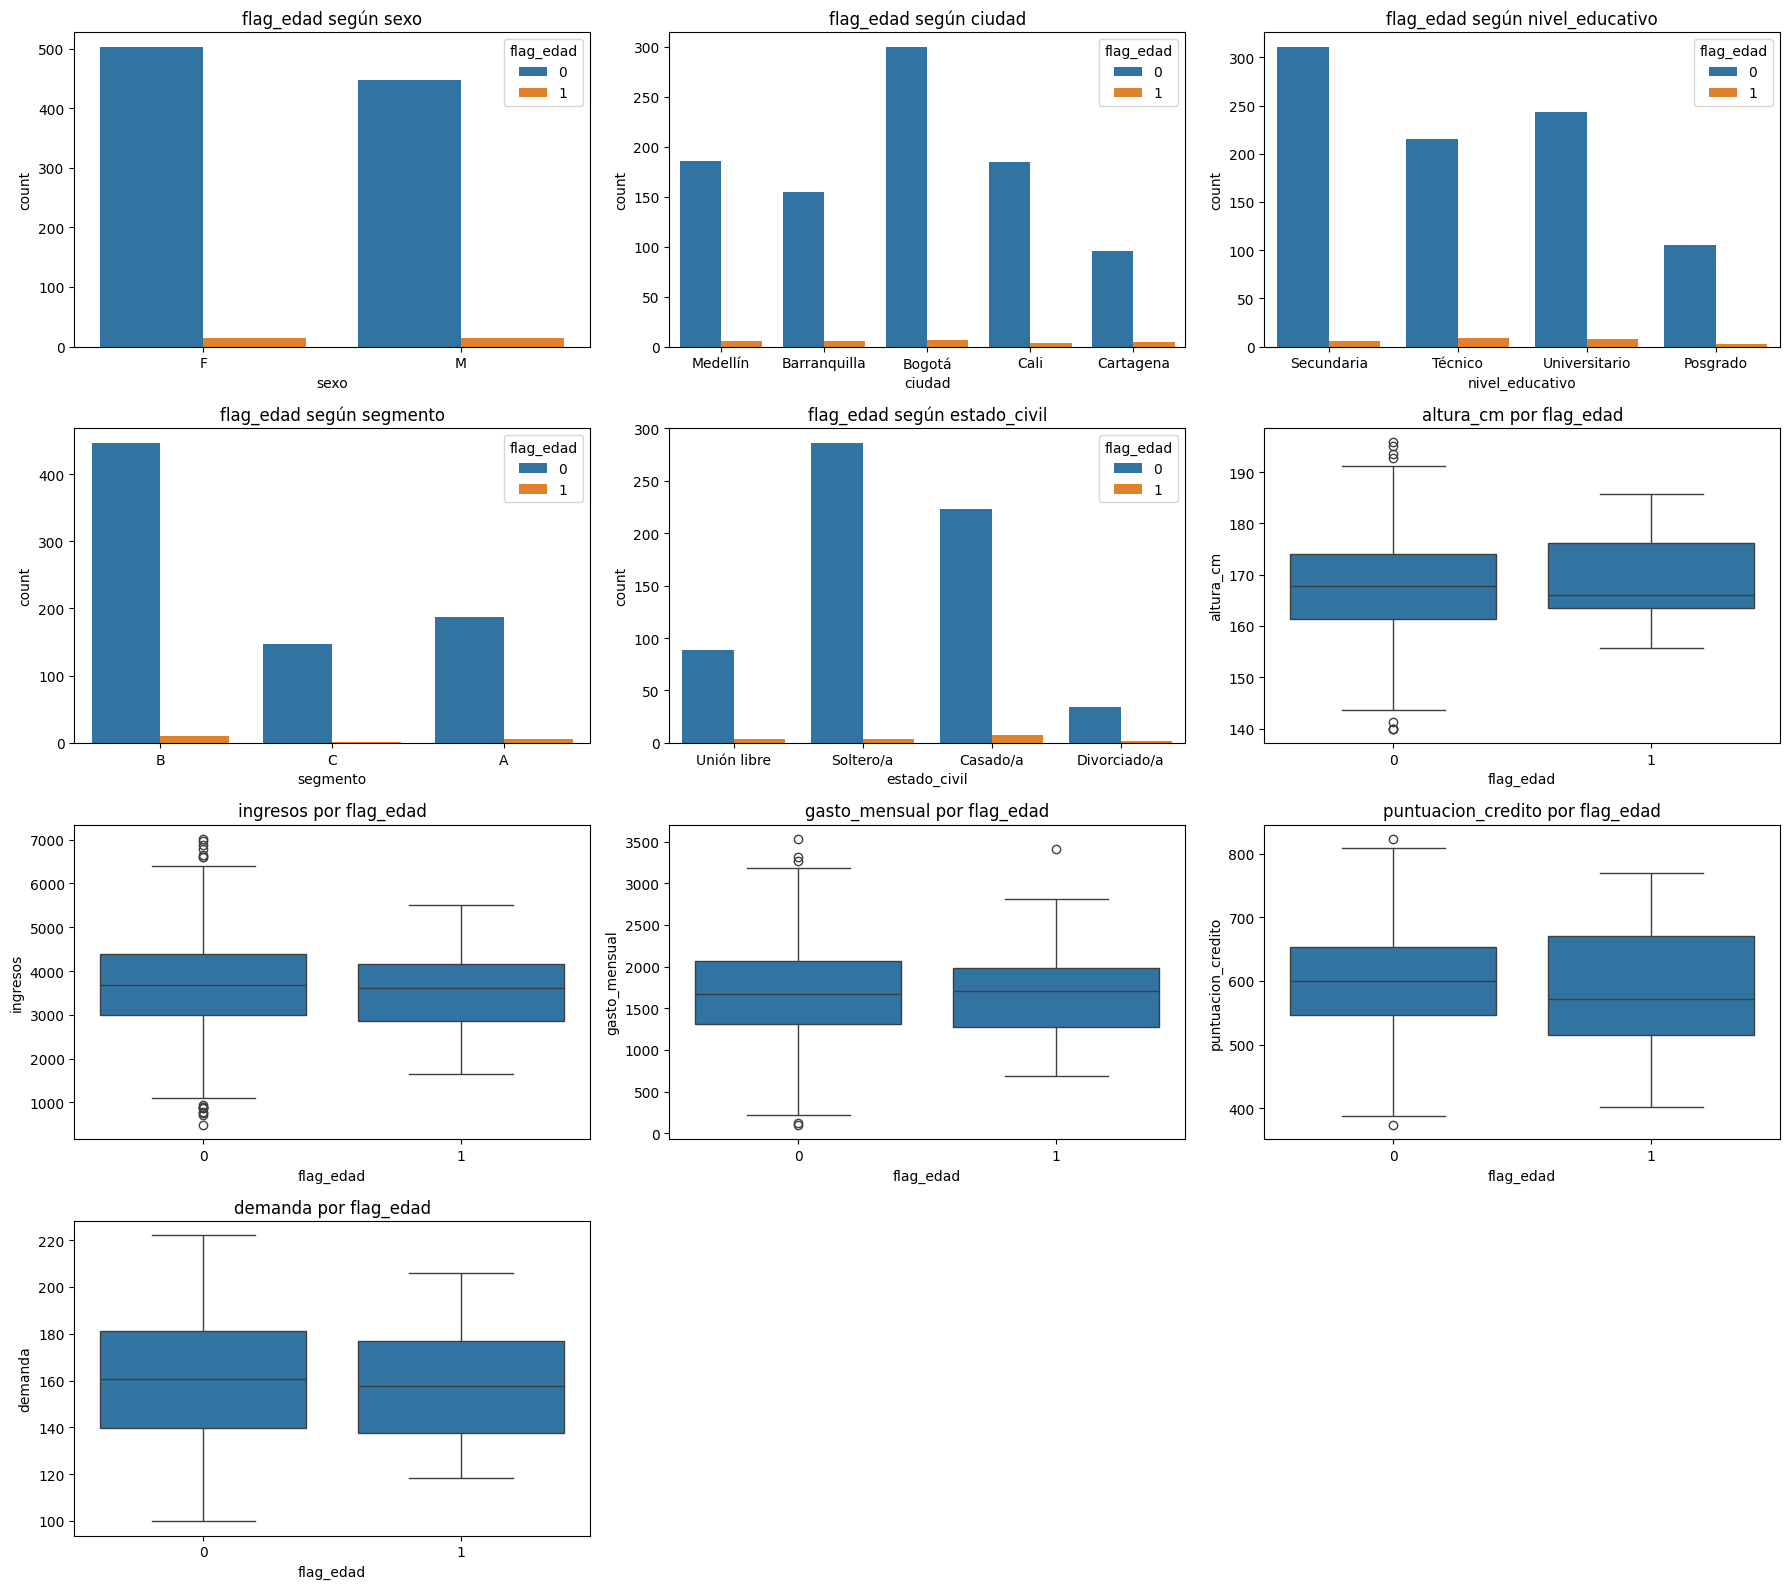

In [25]:
graficar_faltante(df, 'flag_edad')

Al analizar las gráficas que muestran la variable `edad` con su flag de datos faltantes, se observa que la proporción de datos faltantes es bastante uniforme en categorías como sexo, ciudad, nivel educativo, segmento y estado civil, con solo ligeras variaciones que no parecen significativas. Además, las distribuciones de variables numéricas relacionadas como altura, ingresos, gasto mensual, puntaje de crédito y demanda muestran patrones similares entre los grupos con y sin datos faltantes, sin diferencias marcadas en sus medianas o rangos. Esto indica que los datos faltantes en la variable edad parecen estar distribuidos al azar, sin depender de otras características observables del conjunto de datos. Por lo tanto, se puede concluir que los valores faltantes en edad corresponden a un mecanismo **Missing Completely At Random (MCAR)**, es decir, la ausencia de información es completamente aleatoria y no está relacionada con otras variables del dataset.


Analizando: flag_sexo vs otras variables (10 gráficas)



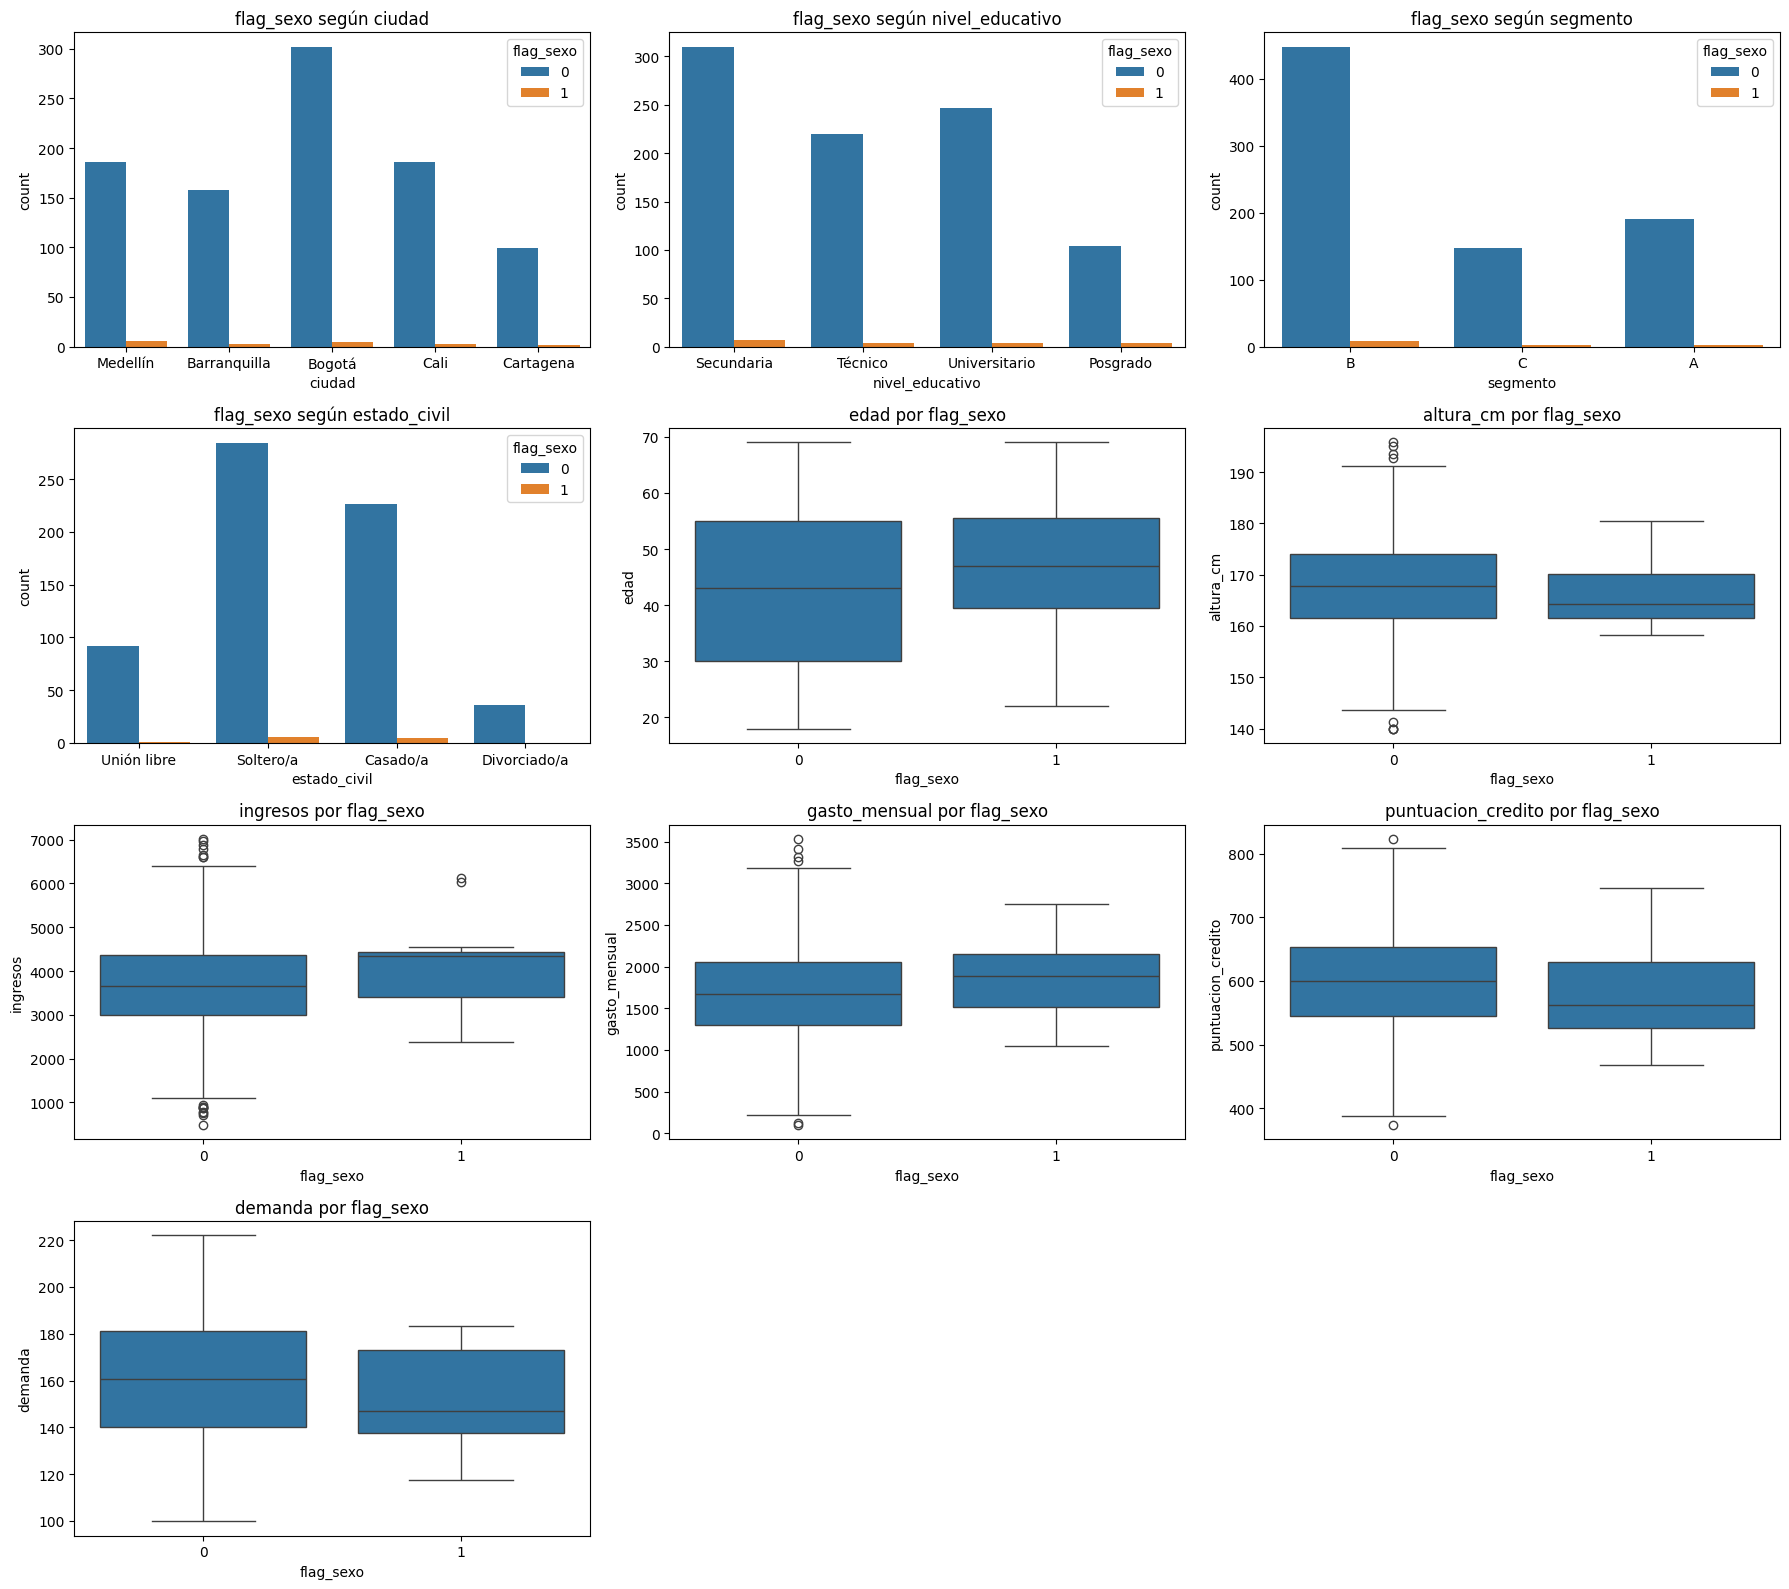

In [26]:
graficar_faltante(df, 'flag_sexo')

Al observar las gráficas que muestran la variable `sexo` junto con su flag de datos faltantes, se nota que la proporción de valores faltantes no está distribuida de manera uniforme entre las diferentes categorías de ciudad, nivel educativo, segmento y estado civil. En particular, algunos grupos como "Soltero/a" en estado civil y ciertos niveles educativos muestran más casos con datos faltantes que otros, lo que indica una relación entre la ausencia de información y estas variables categóricas. Además, las distribuciones de las variables numéricas como edad, altura, ingresos, gasto mensual, puntaje de crédito y demanda también presentan diferencias visibles entre los grupos con y sin datos faltantes. Esto sugiere que los valores faltantes en la variable sexo no son completamente aleatorios, sino que dependen de ciertas características observables. Por lo tanto, podemos concluir que los valores faltantes en sexo corresponden a un mecanismo **Missing At Random (MAR)**, es decir, la ausencia de datos está relacionada con otras variables del conjunto.


## ***4. Discusión sobre imputabilidad***

**Puntuacion_credito**

Sí se debe imputar. La distribución de valores faltantes no es aleatoria, ya que hay diferencias claras por ciudad, segmento y nivel educativo. Por tanto, imputar es necesario para no eliminar grupos enteros del análisis. Como es una variable numérica, y la ausencia de datos está relacionada con otras variables, los métodos recomendados son **KNN** (porque puede capturar relaciones no lineales con otras variables) o **regresión** si hay una relación lineal clara. Evitar media y mediana, ya que podrían introducir sesgos por la no aleatoriedad de los faltantes.


**Estado_civil**

Sí se debe imputar. Los valores faltantes muestran diferencias por ciudad, sexo y nivel educativo, lo que indica que no son aleatorios. Como es una variable categórica, las mejores opciones son **KNN** (para capturar similitudes con otras personas) o **hot-deck**, que selecciona valores reales de registros similares. 


**Gasto_mensual**

Sí se debe imputar. La ausencia de datos no es aleatoria, ya que depende de variables como ciudad, segmento y estado civil. Dado que es una variable numérica, y los faltantes tienen un patrón estructurado, las mejores técnicas serían **KNN** o **regresión**, ya que permiten imputar en función de otras variables relacionadas. La **media** o **mediana** podrían funcionar si se aplican por subgrupos, pero tienen más riesgo de simplificar demasiado los datos.


**Segmento**

Sí se debe imputar. La distribución de los valores faltantes en la variable `segmento` no es completamente aleatoria, ya que se observa una mayor concentración de datos faltantes en ciertas ciudades, niveles educativos y estados civiles. Esto sugiere que los faltantes son del tipo **MAR** (faltan condicionados a otras variables observadas). Imputar es necesario para no perder representatividad de ciertos grupos sociales. El riesgo de imputar incorrectamente radica en asignar categorías que no reflejen correctamente la condición socioeconómica de la persona, especialmente si se usa una técnica muy general. Por ser una variable categórica y por la estructura de los datos, la técnica más adecuada sería **KNN** o **hot-deck**, ya que pueden considerar múltiples variables relacionadas para realizar una imputación más precisa y coherente.


**Demanda**

Sí se debe imputar. En el caso de la variable `demanda`, los valores faltantes tampoco están completamente al azar, ya que su distribución muestra variaciones por segmento, ciudad y estado civil. Esto indica que los datos faltan de forma condicionada (MAR), por lo cual imputar se justifica para mantener la completitud del conjunto de datos. El principal riesgo es que al imputar sin tener en cuenta esta dependencia se distorsione la relación real entre la demanda y factores como los ingresos o el gasto mensual. Como se trata de una variable numérica con un patrón estructurado, las técnicas más adecuadas serían **KNN** o **regresión**, ya que permiten modelar la relación entre la demanda y otras variables relevantes, evitando los sesgos que implicaría usar simplemente la media o mediana.


**Ingresos**

Sí se debe imputar. La variable `ingresos` presenta una distribución de valores faltantes que depende claramente de otras variables como ciudad, nivel educativo y segmento, lo cual sugiere que los faltantes son del tipo MAR. Esto implica que imputar es necesario para no introducir un sesgo por eliminación de datos que no son aleatorios. El riesgo de imputar con técnicas simples como la media o mediana es que se ignoren las diferencias estructurales entre distintos grupos socioeconómicos, lo que puede afectar el análisis de desigualdad o comportamiento financiero. Por lo tanto, la técnica más adecuada es **KNN** si se quiere preservar relaciones no lineales, o **regresión** si la relación con otras variables (como edad o gasto) es lineal y clara.

**nivel_educativo**

Sí se justifica imputar esta variable porque los valores faltantes no se distribuyen de manera completamente aleatoria: hay diferencias leves según ciudad, estado civil y segmento, lo que indica que su ausencia podría estar relacionada con otras variables sociodemográficas. Dejar los nulos podría reducir la representatividad de ciertos grupos, especialmente en ciudades como Medellín o en segmentos como el B. El principal riesgo de imputar es introducir un sesgo si se usa una técnica simple como la moda, ya que podría sobrerrepresentar un nivel educativo dominante como secundaria. Por ser una variable categórica y considerando que su ausencia no es completamente aleatoria, lo más adecuado sería utilizar **KNN** o **hot-deck**, ya que estas técnicas permiten considerar similitudes con otras variables y así evitar distorsionar la distribución original.


**altura_cm**

Se debe imputar esta variable, ya que aunque los valores faltantes parecen estar distribuidos relativamente de manera similar entre grupos, hay ligeras diferencias por sexo, ciudad y estado civil que sugieren una no aleatoriedad total. Además, al ser una variable numérica y posiblemente útil para análisis posteriores, eliminar estos casos podría reducir la capacidad explicativa del modelo. El riesgo principal de imputar con métodos simples como la media o mediana es que podrían ignorar patrones importantes que se relacionan con otras variables como el sexo, que influye naturalmente en la estatura. Por eso, la mejor opción es usar **KNN** o **regresión**, ya que permiten aprovechar las correlaciones con otras variables numéricas como edad o ingresos, ofreciendo una imputación más contextualizada.


**ciudad**

Sí se debe imputar esta variable. Aunque los valores faltantes no son muy numerosos, su distribución muestra ciertas diferencias por estado civil y nivel educativo, lo que sugiere que su ausencia no es completamente aleatoria. Dejar los nulos podría llevar a eliminar observaciones valiosas para el análisis, especialmente porque ciudad puede ser una variable clave para segmentar comportamientos o políticas. El riesgo al imputar estaría en elegir una técnica inadecuada como la moda, que podría sobrerrepresentar ciudades con mayor frecuencia como Bogotá. Por ser una variable categórica y al estar relacionada con otras, lo más recomendable es usar **hot-deck** o **KNN**, ya que permiten mantener la coherencia entre ciudad y otras características del individuo sin imponer una única categoría dominante.

**Edad**

Sí se debe imputar. En este caso, los faltantes parecen estar distribuidos de forma más uniforme, lo que sugiere que podrían ser aleatorios. Por ser una variable numérica y con bajo riesgo de sesgo, **mediana** es la opción más adecuada, ya que es robusta frente a outliers. También se podría usar **media**, pero solo si la distribución de edad es relativamente simétrica, cosa que no siempre ocurre.


**Sexo**

No se recomienda imputar. El sexo tiene muy pocos valores faltantes y, por los gráficos, estos parecen distribuidos casi aleatoriamente. Imputar podría introducir errores de clasificación en una variable categórica binaria muy sensible. Además, dado que no hay una relación clara con otras variables para inferir el sexo, cualquier imputación se basaría más en suposiciones que en evidencia. En este caso, lo más prudente sería **dejar los nulos o eliminar esos pocos registros**, si el análisis lo permite.

## ***5. Representación de la imputación***

### ***5.1. Variables numéricas***

Se separan las variables numéricas en un vector.

In [27]:
var_num = ['edad', 'altura_cm', 'ingresos', 'gasto_mensual', 'puntuacion_credito', 'demanda']

#### ***5.1.1. `knn - numéricas:`***

Se crea una función que usa un moelo de knn para imputar las variables numéricas.

In [28]:
from sklearn.impute import KNNImputer

def knn_imputacion_numericas(df, variables_numericas, k=5):

    df_imputado_knn = df.copy()

    # Inicializar el imputador
    imputer = KNNImputer(n_neighbors=k)

    df_imputado_knn[variables_numericas] = imputer.fit_transform(df_imputado_knn[variables_numericas])

    return df_imputado_knn

Se crea un dataframe y se imputan las variables numéricas con este método.

In [29]:
df_imputado_knn = knn_imputacion_numericas(df, variables_numericas=var_num, k=5)

#### ***5.1.2. `Regresión`***

In [30]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression  

Se imputan todas las variables numéricascon valores faltantes con el método de regresión.

In [31]:
imputer = IterativeImputer(estimator=LinearRegression(), random_state=42)
# Ajustar y transformar solo las columnas seleccionadas
df_imputado_reg = df.copy()
df_imputado_reg[var_num] = imputer.fit_transform(df[var_num])

c:\Users\maria\miniconda\envs\ml_venv\lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


---
Pruebas de normalidad para determinar a qué variables se le puede aplicar la media o la mediana.

In [32]:
from scipy.stats import shapiro
import pandas as pd

def prueba_normalidad(df, columnas, alpha=0.05):
    
    resultados = []

    for col in columnas:
        datos = df[col].dropna()
        if len(datos) < 3:
            resultados.append({
                'variable': col,
                'p_value': None,
                'es_normal': 'No evaluado (datos insuficientes)'
            })
            continue

        stat, p = shapiro(datos)
        es_normal = 'Sí' if p > alpha else 'No'

        resultados.append({
            'variable': col,
            'p_value': round(p, 4),
            'es_normal': es_normal
        })

    return pd.DataFrame(resultados)


In [33]:
normalidad = prueba_normalidad(df, var_num)
print(normalidad)

             variable  p_value es_normal
0                edad   0.0000        No
1           altura_cm   0.5911        Sí
2            ingresos   0.3245        Sí
3       gasto_mensual   0.6752        Sí
4  puntuacion_credito   0.9405        Sí
5             demanda   0.0000        No


Note que solo dos variables no tiene una dsitribución normal: edad, demanada. El resto de variables: altura_cm, ingresos, gasto_mensual y  puntuación_credito, si presentan una distribución normal.

#### ***5.1.3. `Media`***

Según los resultados anteriores de normalidad, se separan las variables que tienen una distribución normal.

In [34]:
var_num_nor =["altura_cm", "ingresos", "gasto_mensual", "puntuacion_credito"]

Ahora se crea una función que impute por la  media un vector de columnas.

In [35]:
def imputacion_media(df, columnas):
    df_imputado_media = df.copy()
    for col in columnas:
        media = df_imputado_media[col].mean()
        df_imputado_media[col].fillna(media, inplace=True)
    return df_imputado_media


Se imputan las variables selccionadas anteriormente por la media.

In [36]:
df_imputado_media = imputacion_media(df, var_num_nor)

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\297553588.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado_media[col].fillna(media, inplace=True)


#### ***5.1.4. `Mediana`***

Seleccionamos las variables que no siguen una distribución normal y las agrupamos en un vector.

In [37]:
var_num_no_nor = ["edad", "demanda"]

In [38]:
def imputacion_mediana(df, var_num):
    df_imputado_mediana = df.copy()
    for col in var_num:
        mediana = df_imputado_mediana[col].median()
        df_imputado_mediana[col].fillna(mediana, inplace=True)
    return df_imputado_mediana


Imputamos todoas las variables seleccionadas por la mediana.

In [39]:
df_imputado_mediana = imputacion_mediana(df, var_num_no_nor)

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\4206236181.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado_mediana[col].fillna(mediana, inplace=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\4206236181.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

#### ***5.1.5. Gráficas antes y después:***

Ahora observemos los cambios de cada variable según cada método de imputación aplicado.

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficos_imputacion_por_variables(df_original, df_imputado, variables):

    for variable in variables:
        fig, axes = plt.subplots(2, 2, figsize=(14, 8))
        fig.suptitle(f"Comparación de {variable} antes y después de la imputación", fontsize=16)

        # Histograma - Antes
        sns.histplot(df_original[variable], kde=True, bins=30, color='tomato', ax=axes[0, 0])
        axes[0, 0].set_title("Histograma antes")
        axes[0, 0].set_xlabel(variable)
        axes[0, 0].set_ylabel("Frecuencia")

        # Histograma - Después
        sns.histplot(df_imputado[variable], kde=True, bins=30, color='steelblue', ax=axes[0, 1])
        axes[0, 1].set_title("Histograma después")
        axes[0, 1].set_xlabel(variable)
        axes[0, 1].set_ylabel("Frecuencia")

        # Boxplot - Antes
        sns.boxplot(x=df_original[variable], color='tomato', ax=axes[1, 0])
        axes[1, 0].set_title("Boxplot antes")

        # Boxplot - Después
        sns.boxplot(x=df_imputado[variable], color='steelblue', ax=axes[1, 1])
        axes[1, 1].set_title("Boxplot después")

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


##### ***5.1.5.1. Knn***

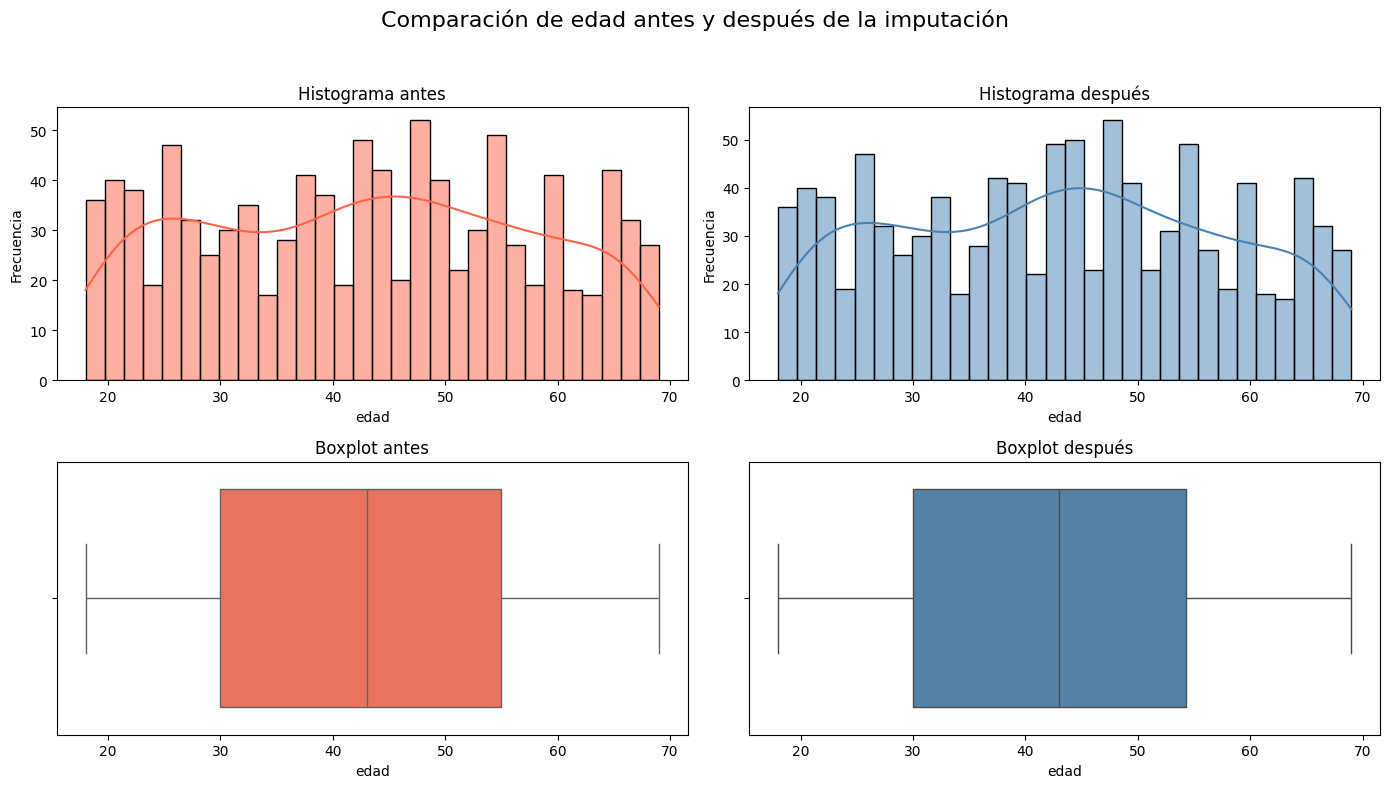

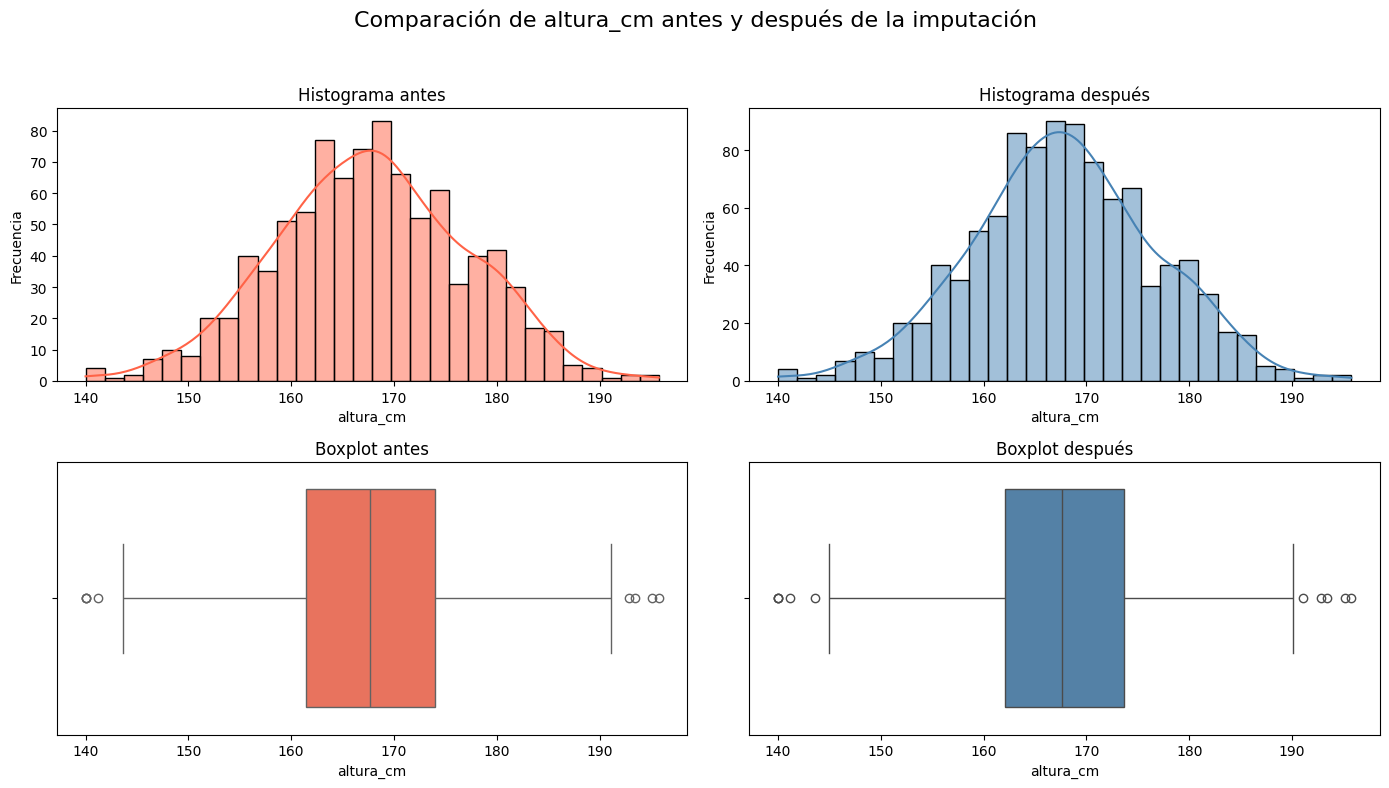

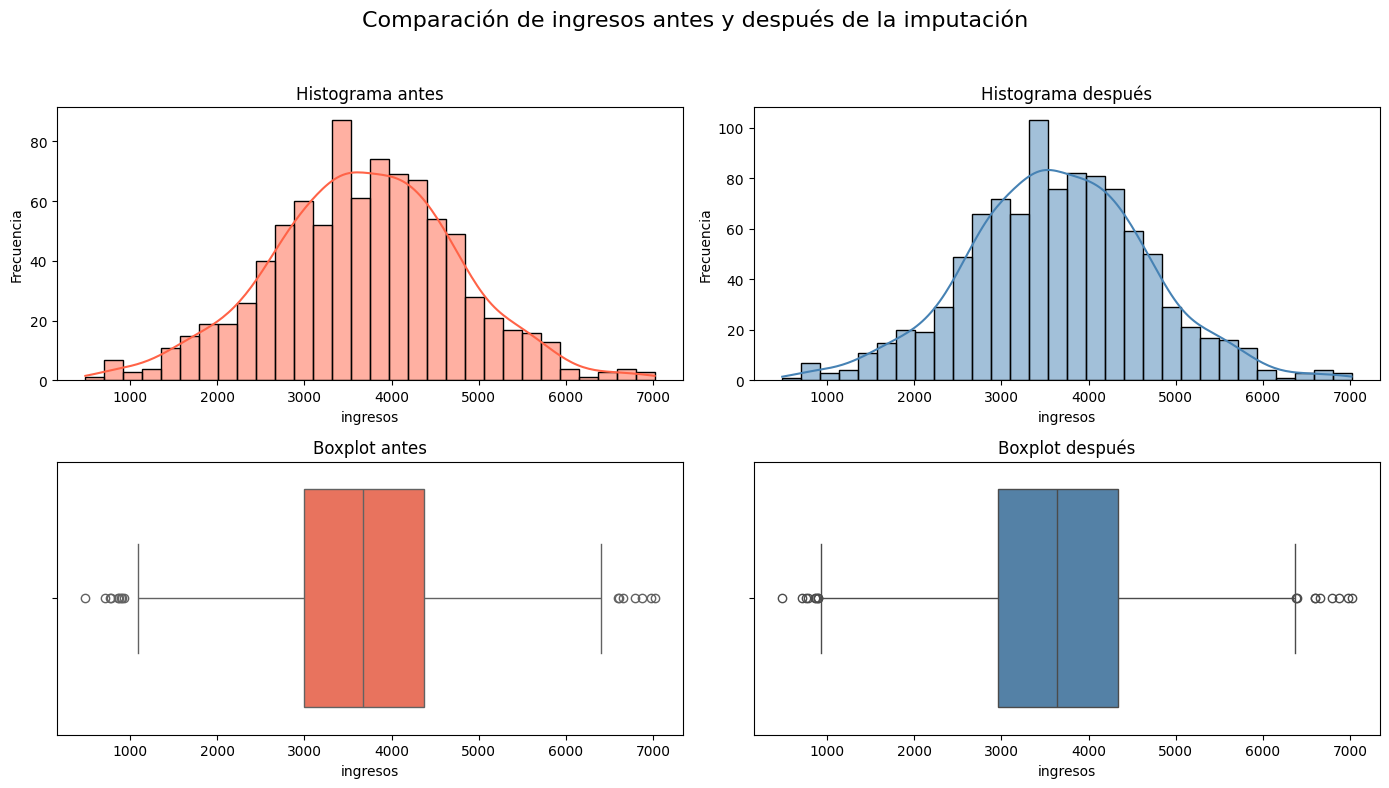

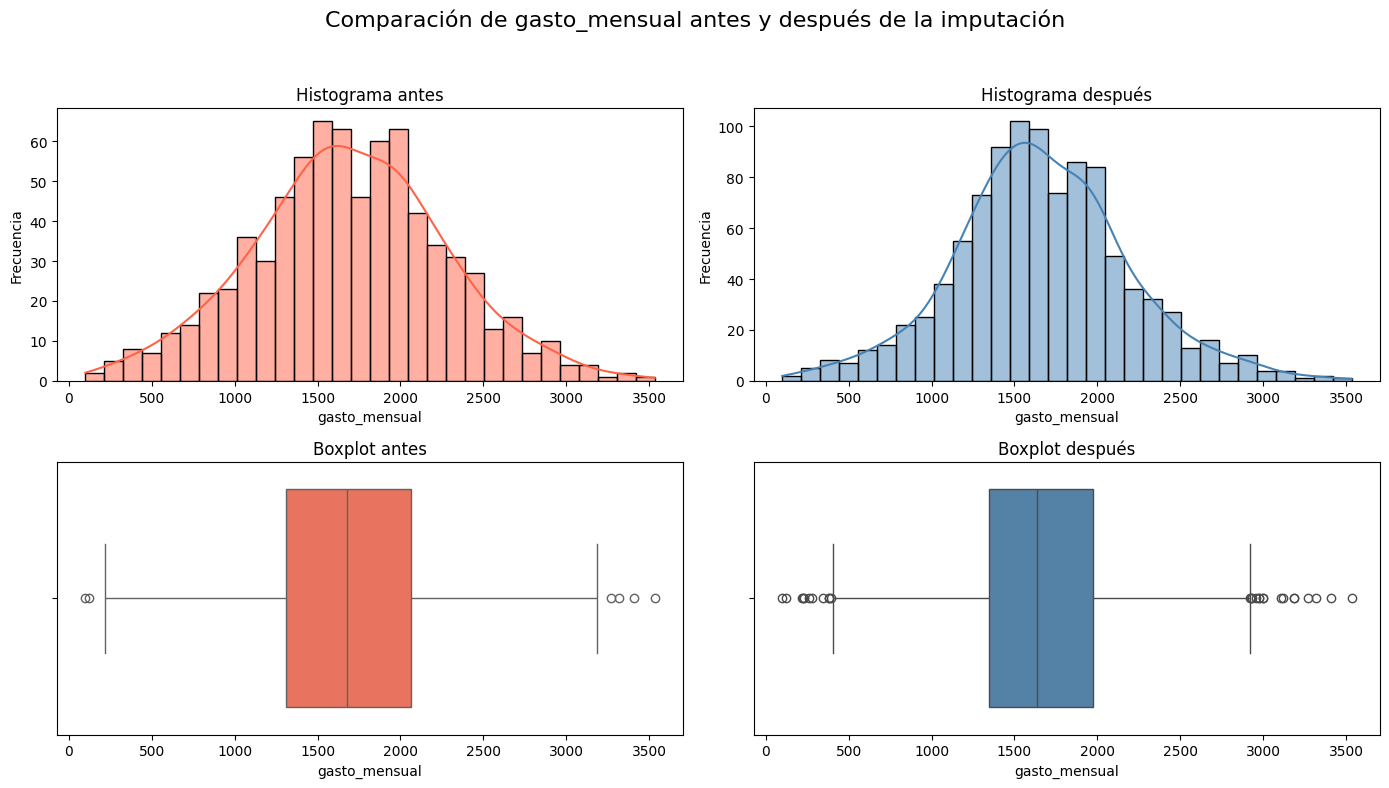

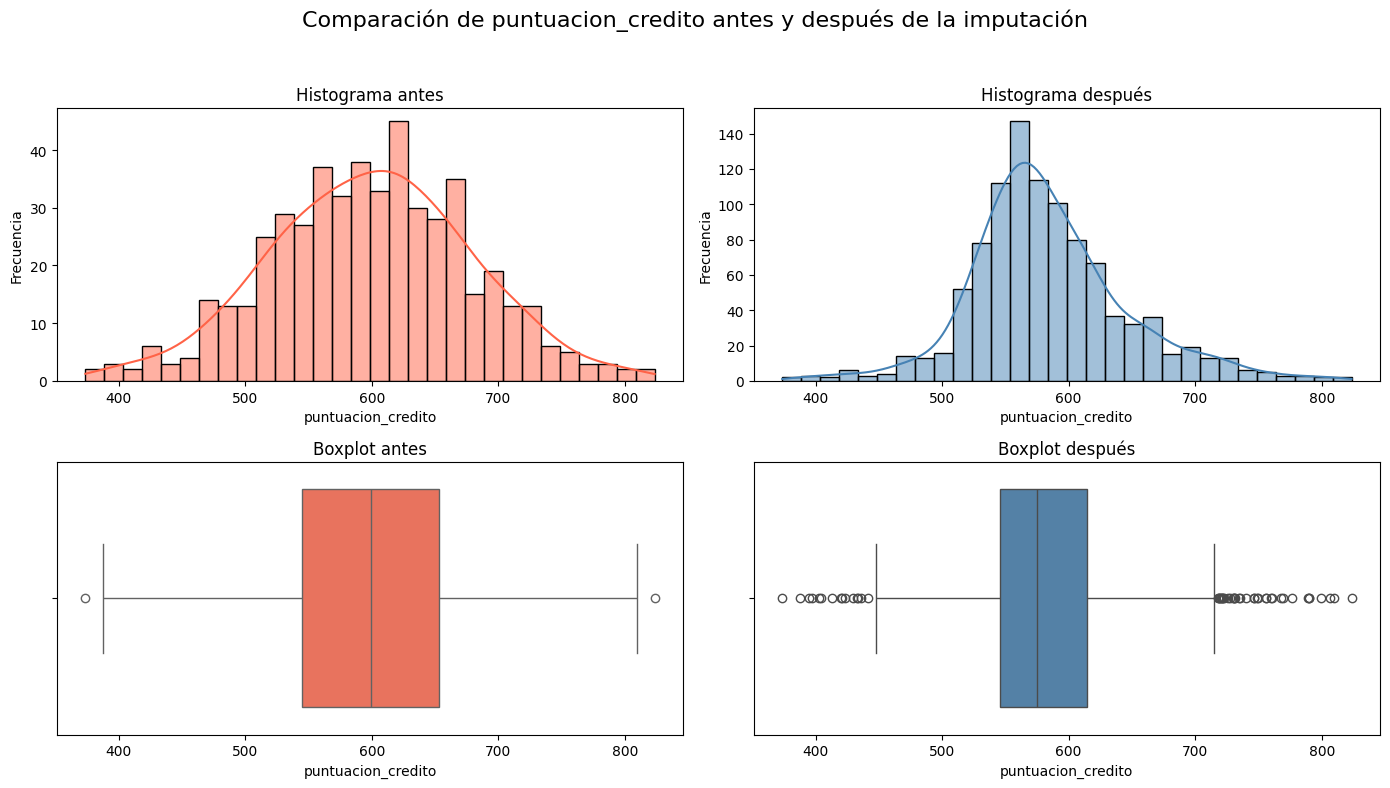

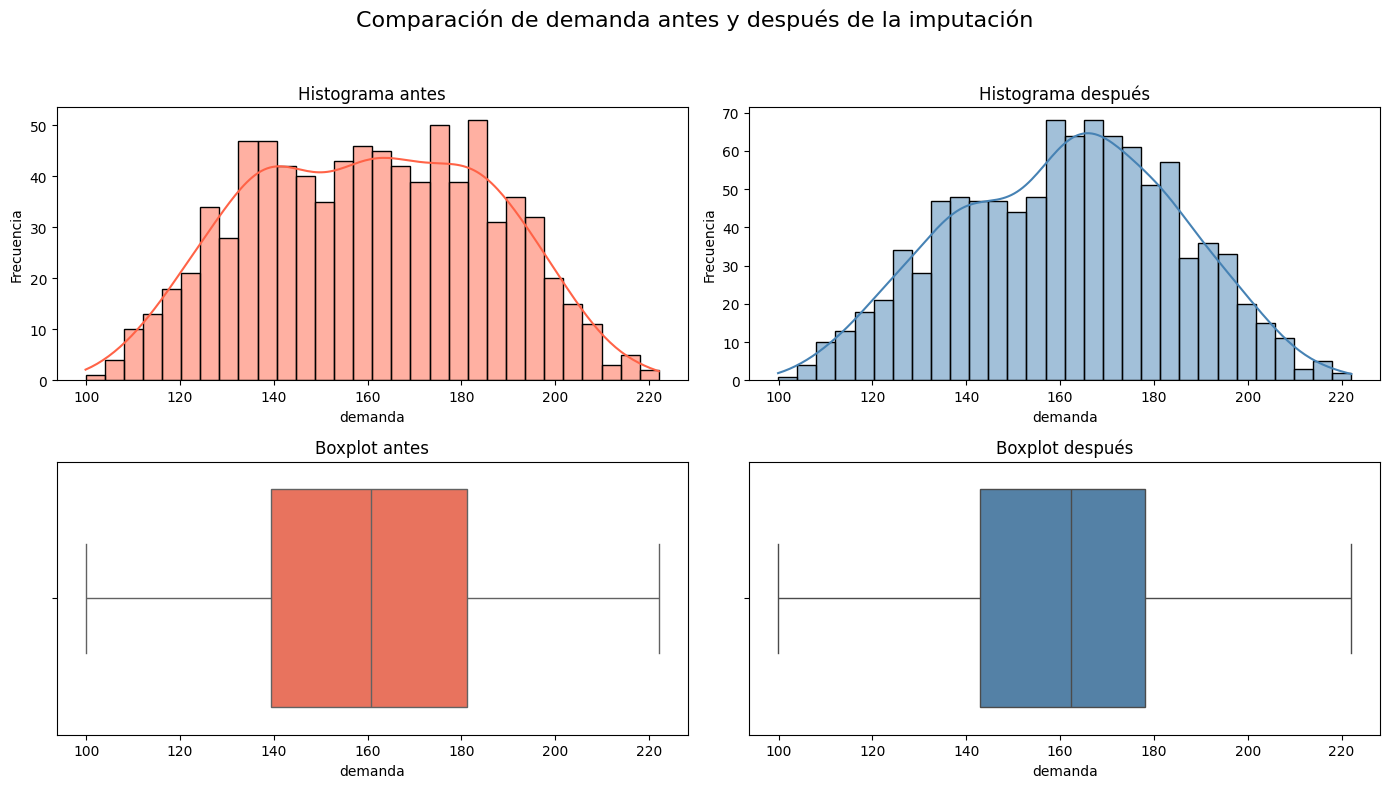

In [41]:
graficos_imputacion_por_variables(df, df_imputado_knn, variables=var_num)

Observe que variables como edad, altura e ingresos conservan a simple vista la disribición original, pero en otras variables como puntuacion_credito parece que la distribución original cambió.

##### ***5.1.5.2. Regresión***

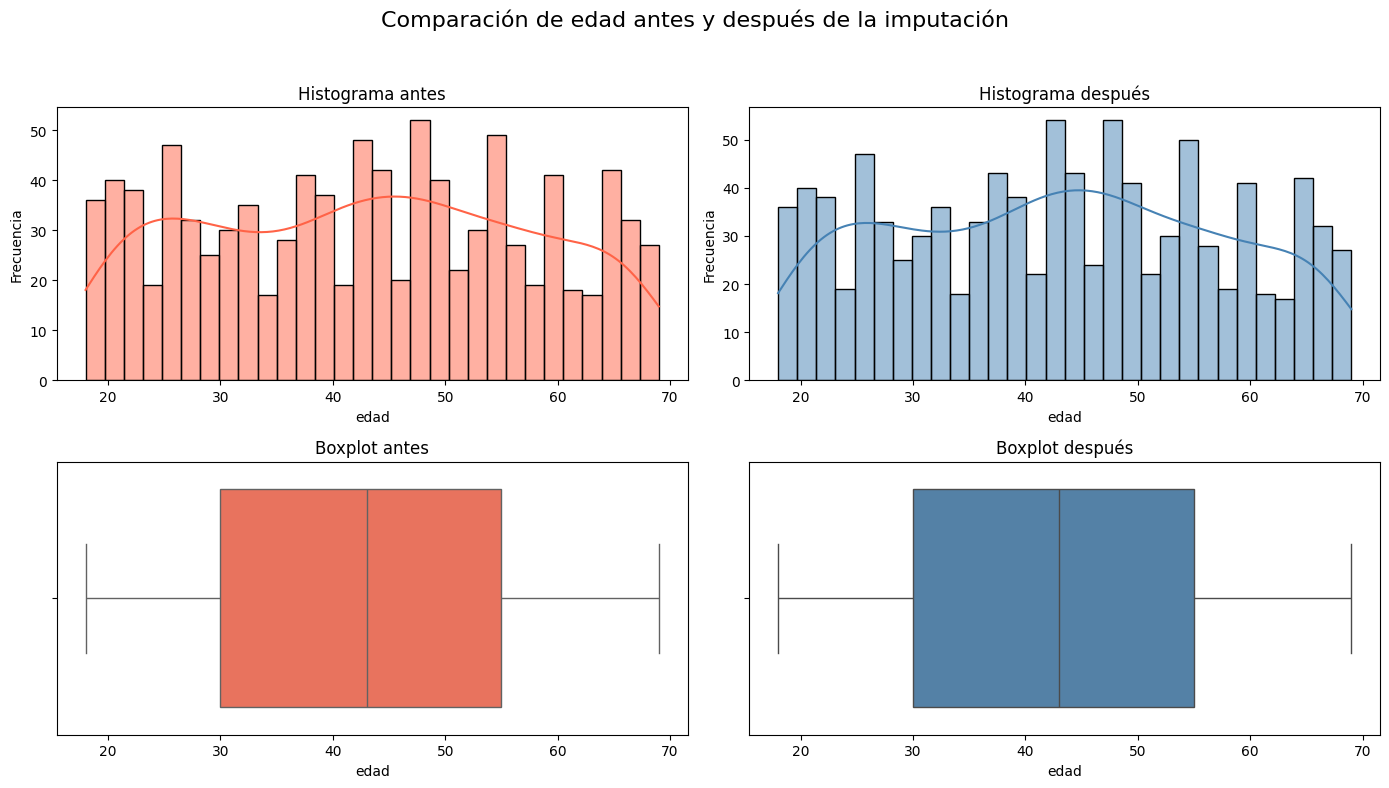

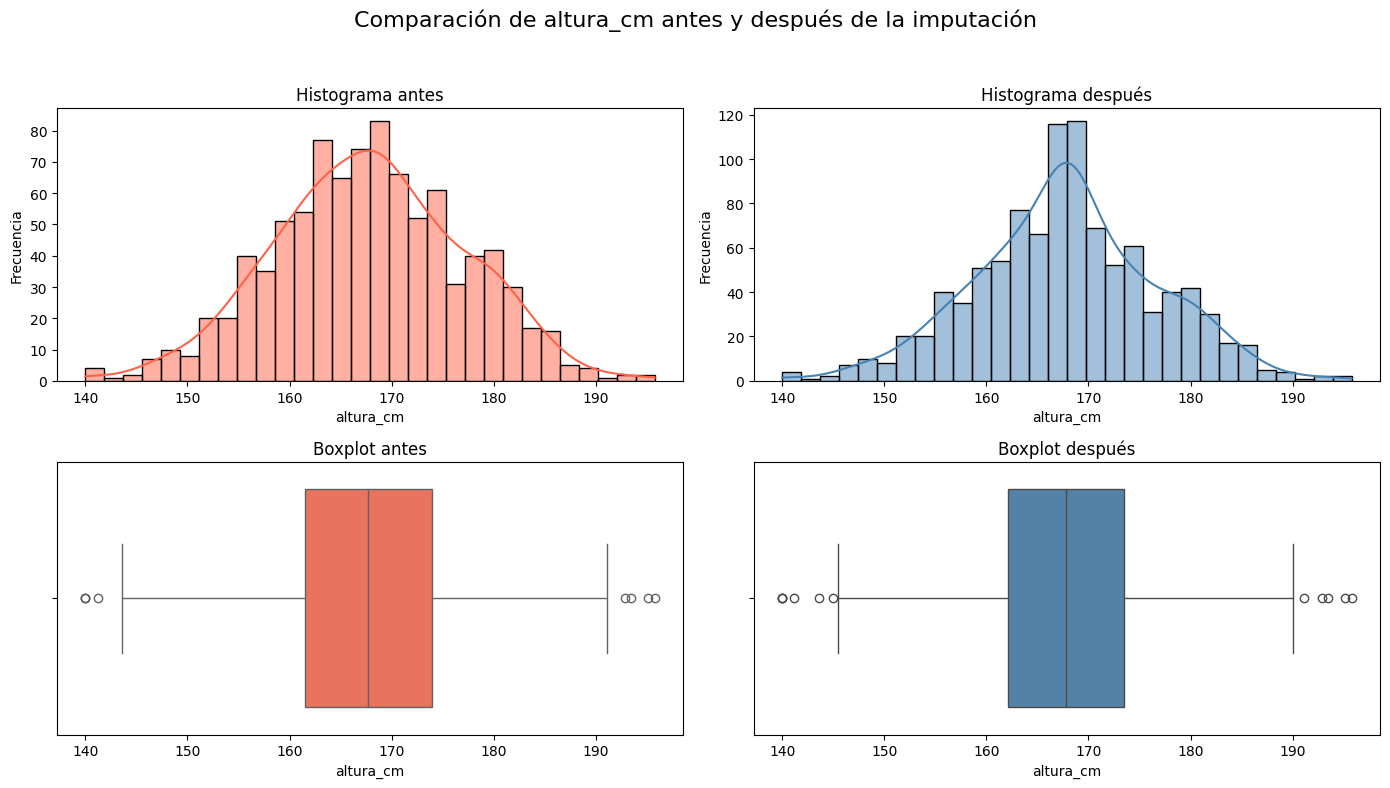

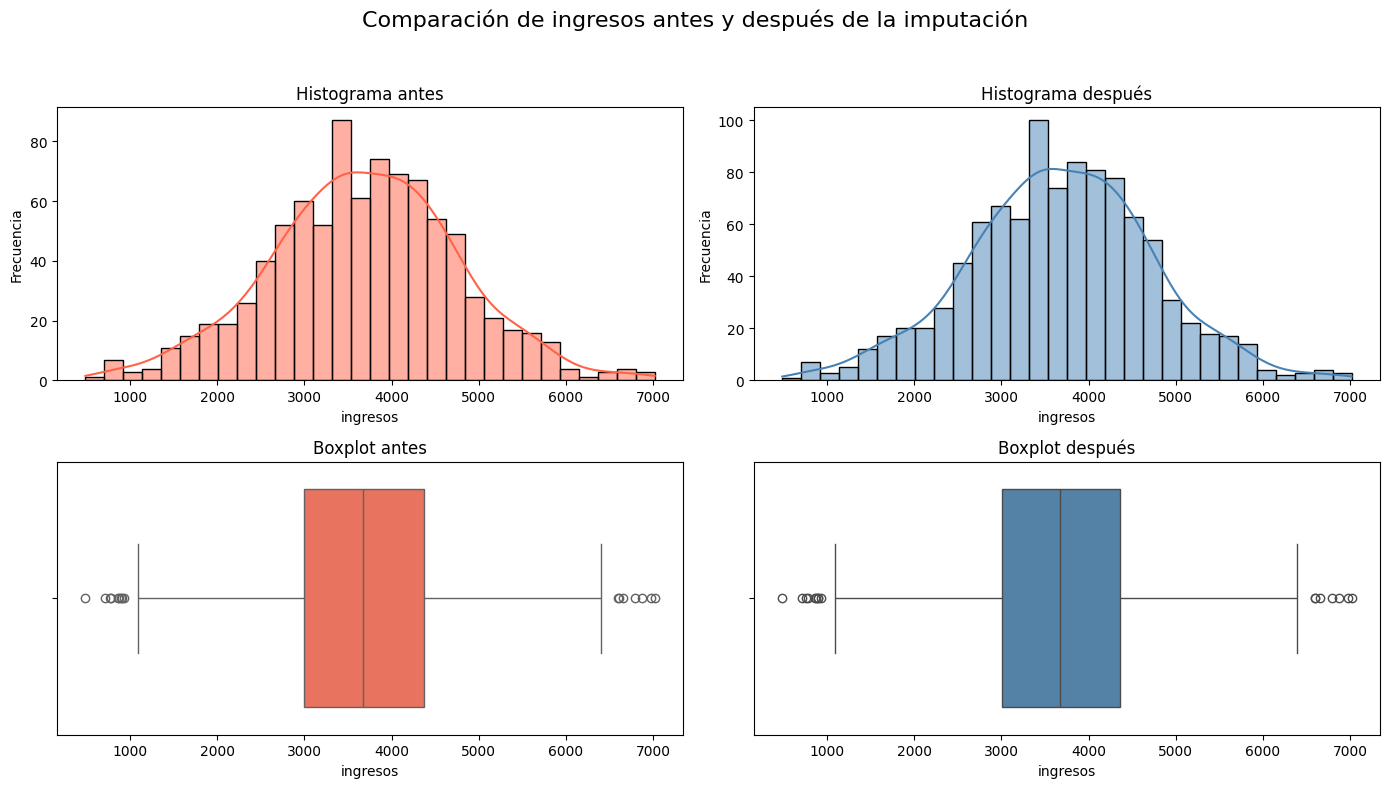

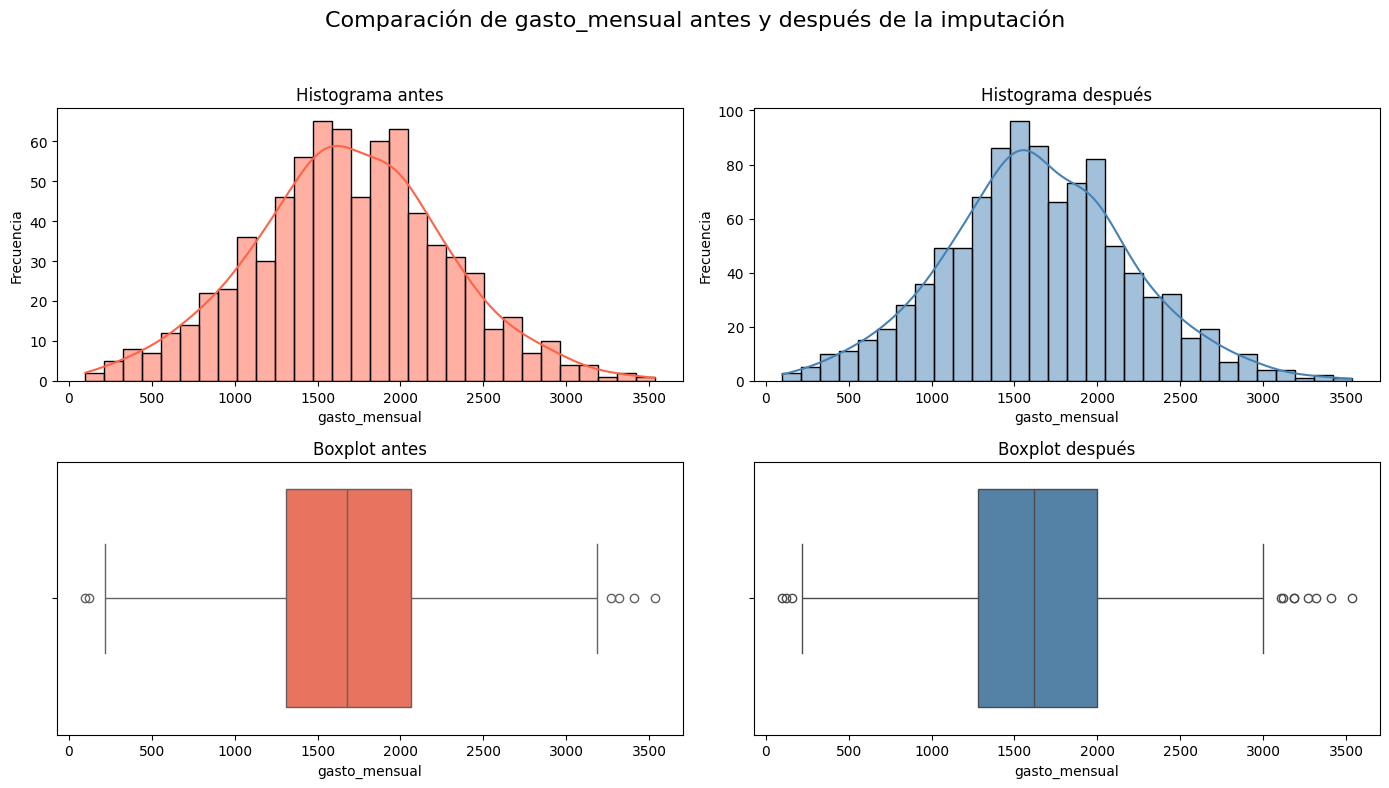

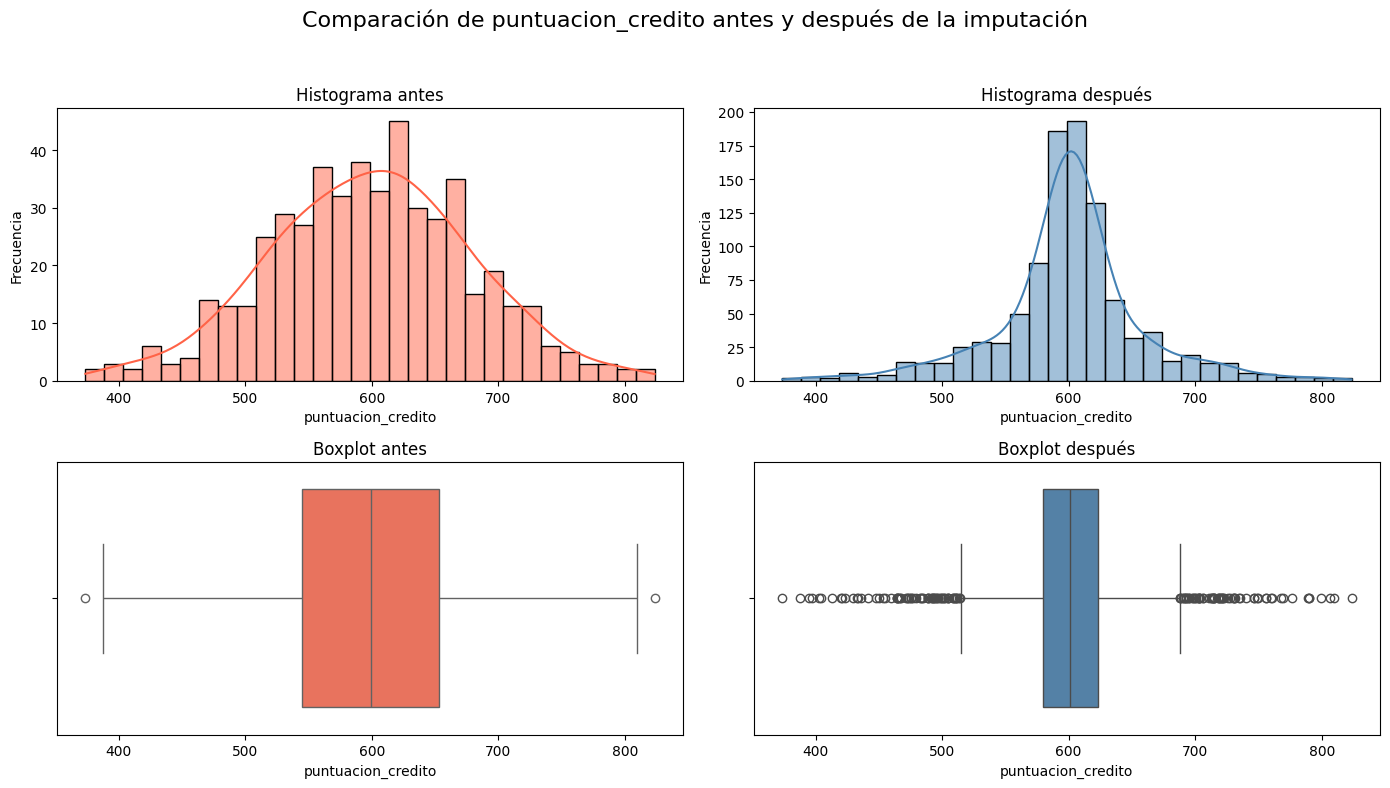

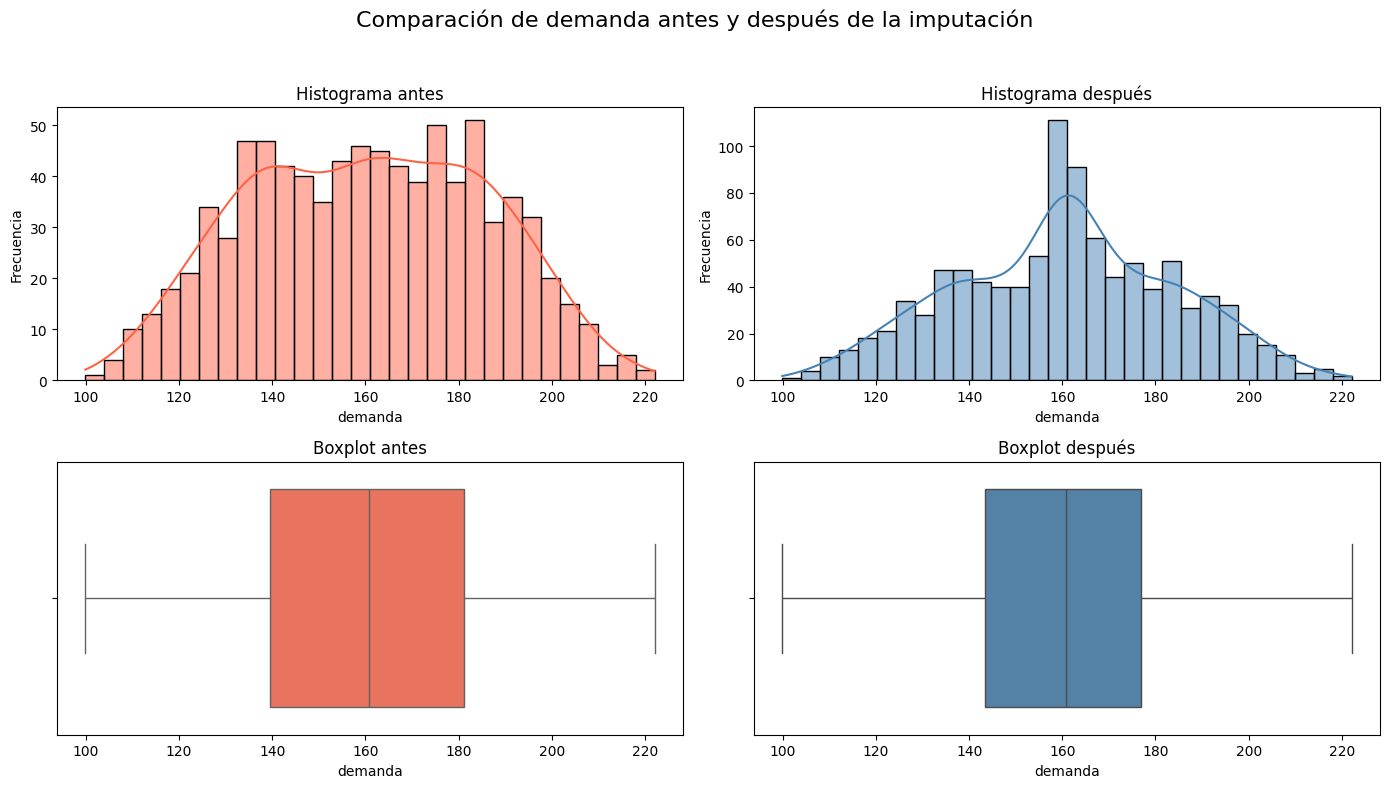

In [42]:
graficos_imputacion_por_variables(df, df_imputado_reg, variables=var_num)

Note que las mayoría de distribuciones se conservaron, pero distribuciones de variables como puntuacion_credito y demanda cambiaron a simple vista.

##### ***5.1.5.3. Media***

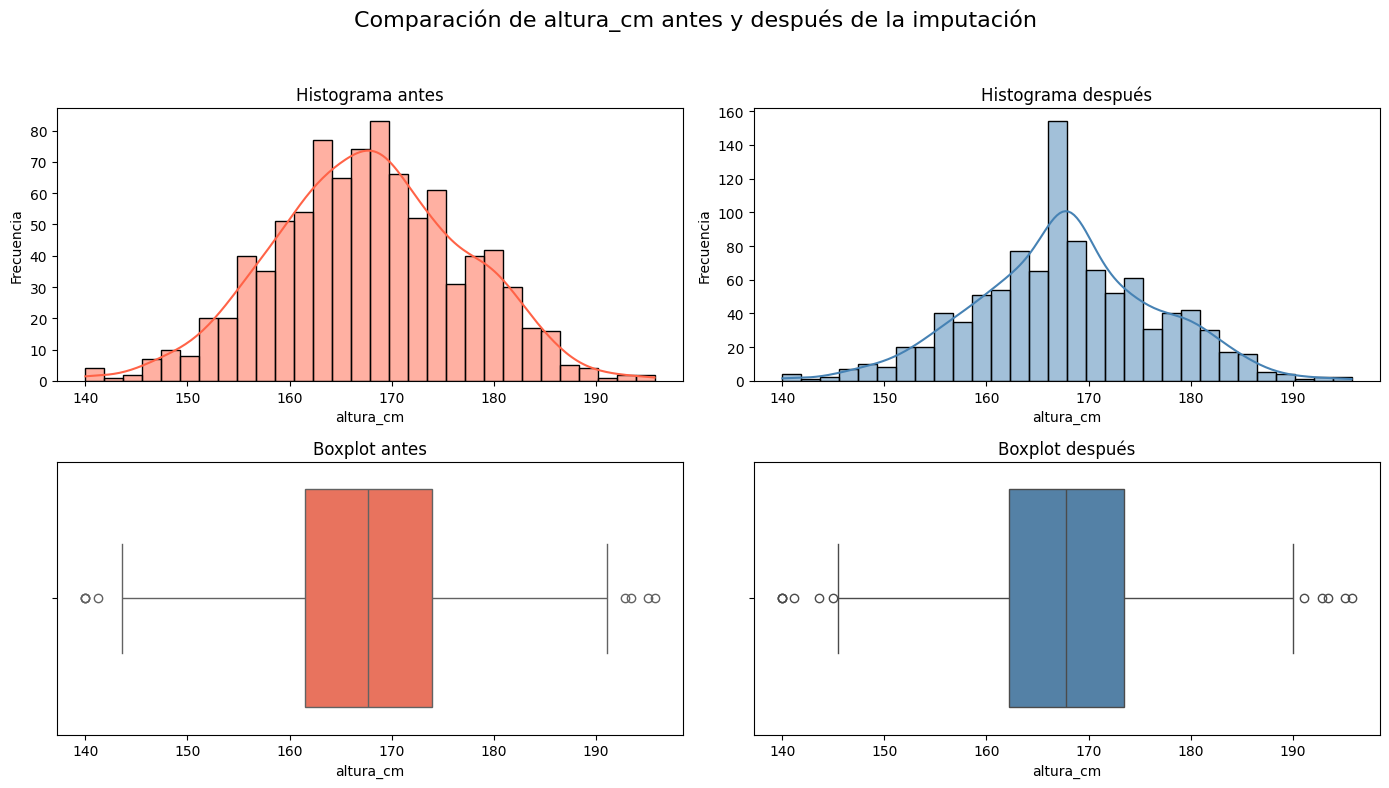

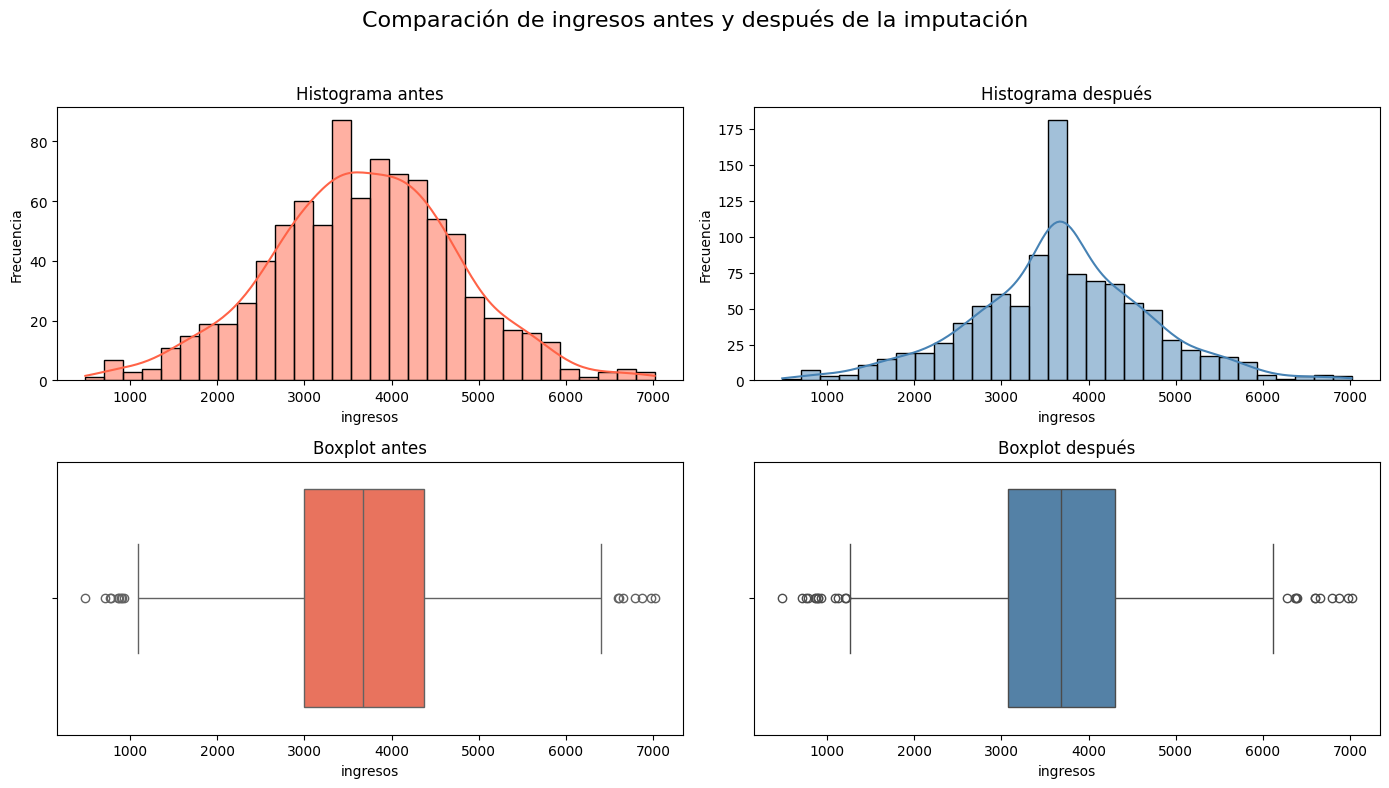

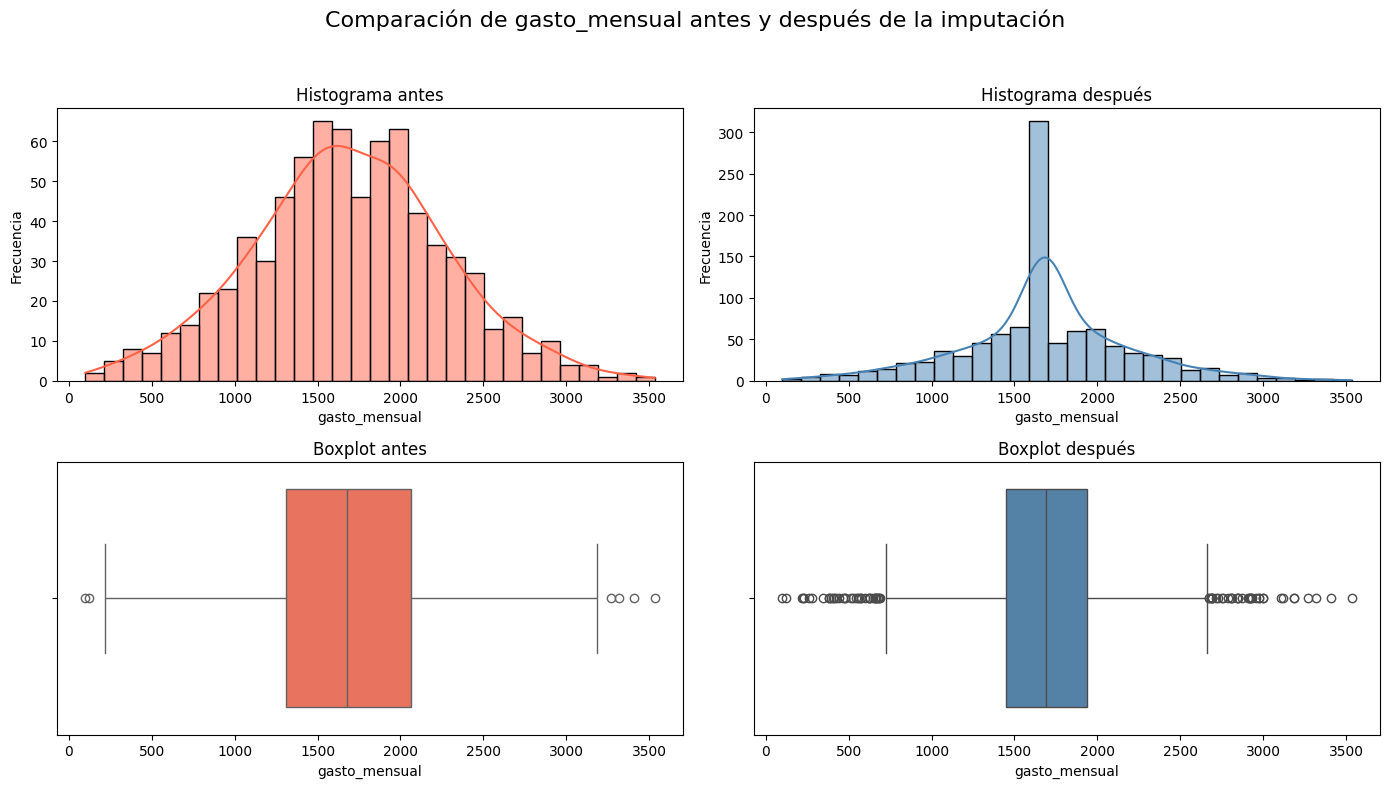

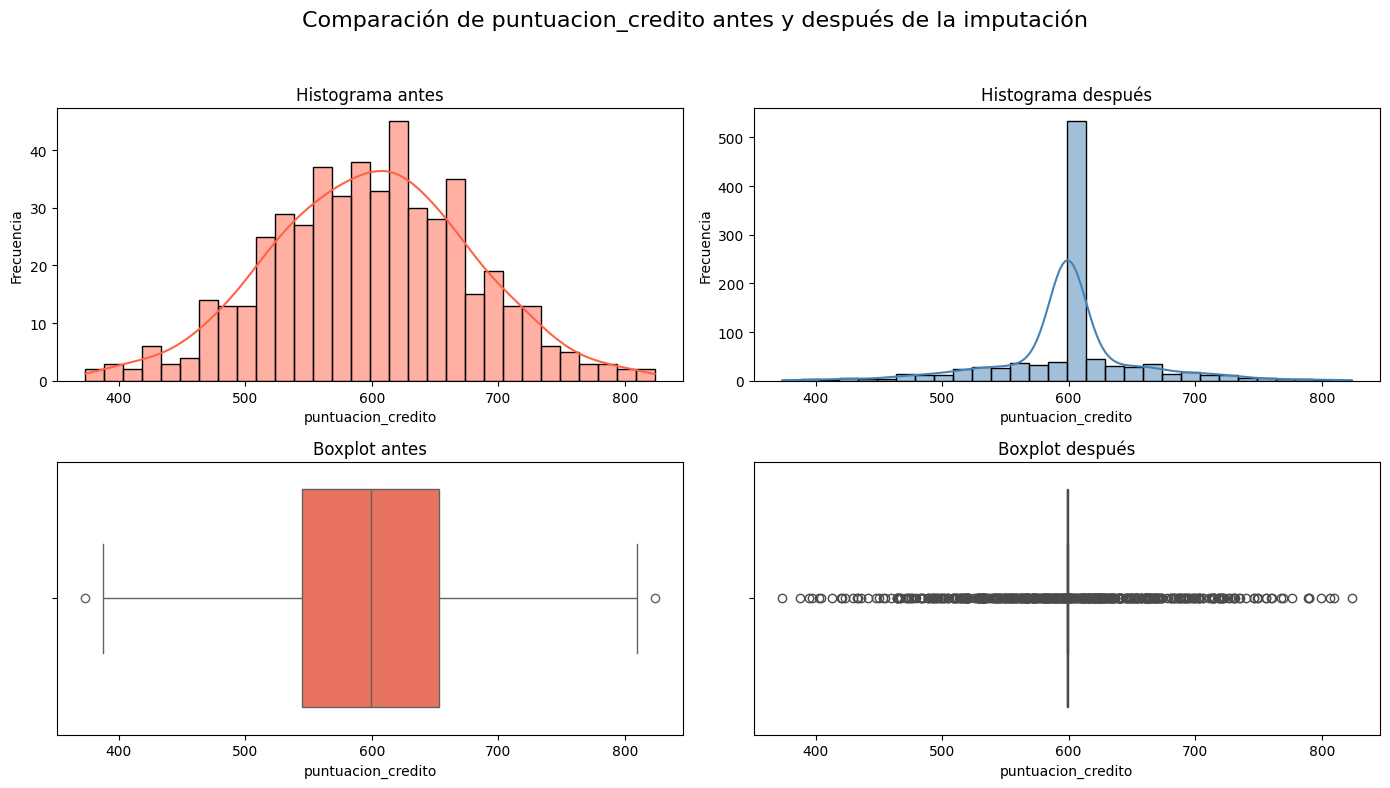

In [43]:
graficos_imputacion_por_variables(df, df_imputado_media, variables=var_num_nor)

Observe que ninguna distribución se mantuvo, pues la mayoría de datos se cententraron en la media, alterando toda la distribución y creando muchos datos extremos.

##### ***5.1.5.4. Mediana***

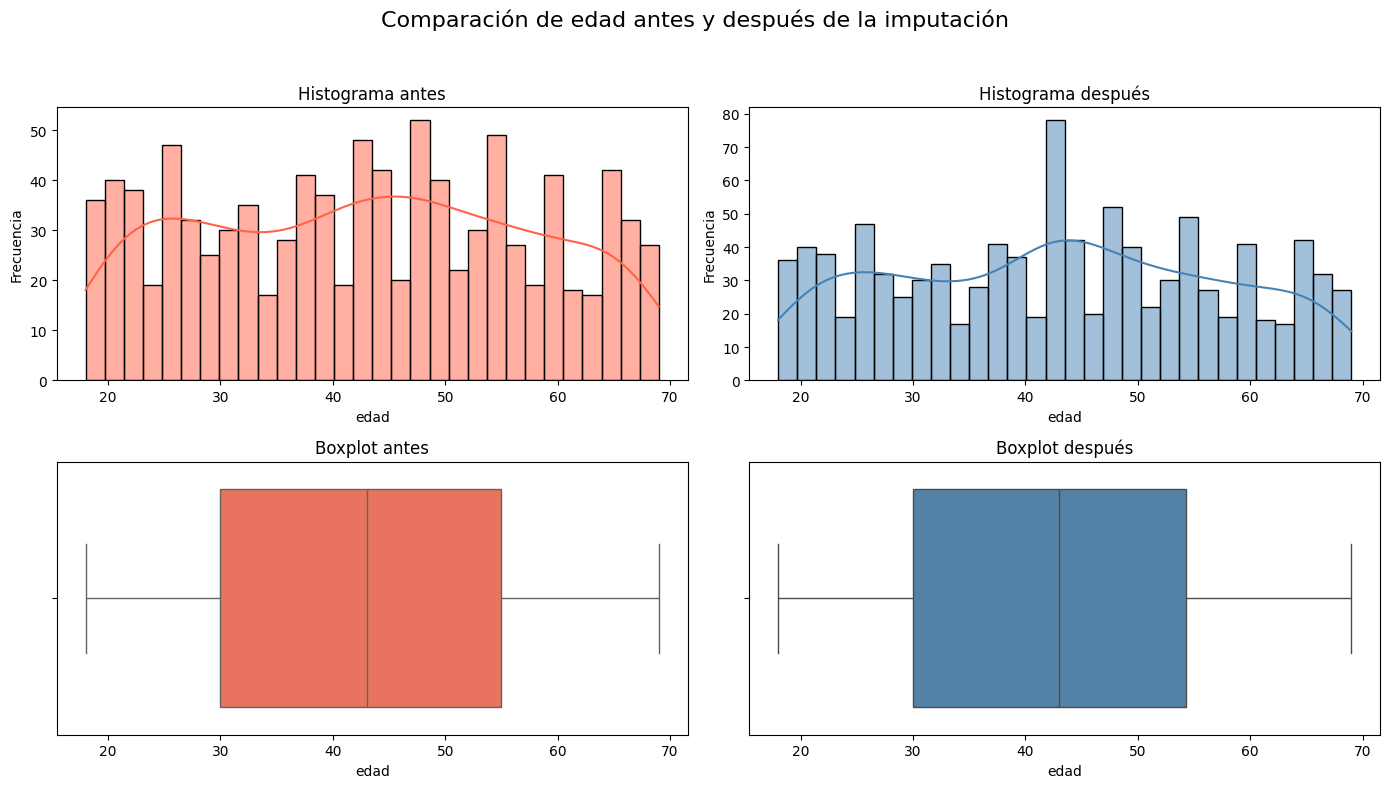

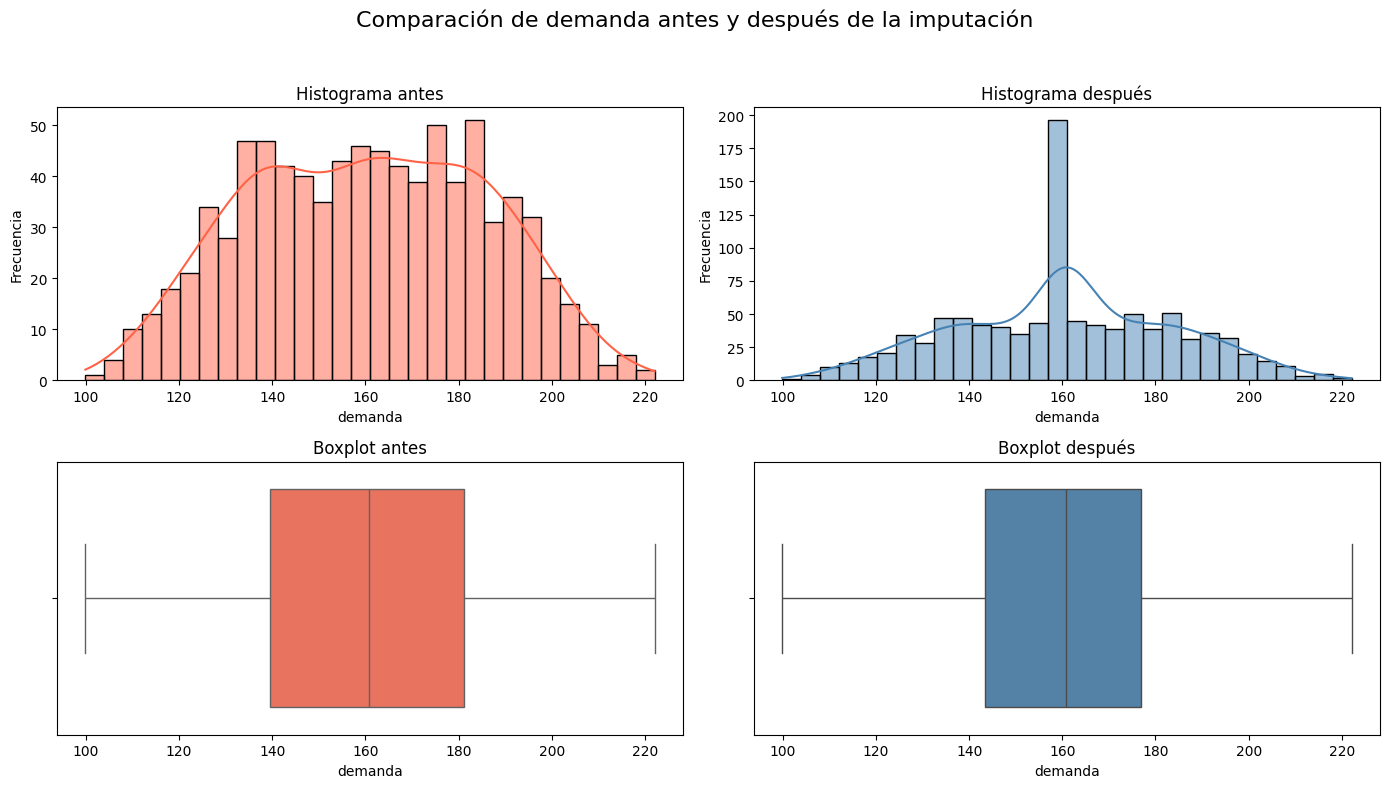

In [44]:
graficos_imputacion_por_variables(df, df_imputado_mediana, variables=var_num_no_nor)

Ocurre una situacion similar como con la  imputación por la media, pues los datos se concentran en la mitad de los datos y alteran la distribución.

### ***5.2. Variables categóricas***

Ahora separamos las variables categóricas con datso faltantes del dataframe.

In [45]:
vars_cat = ['sexo', 'ciudad', 'nivel_educativo', 'estado_civil', 'segmento']

En primer lugar, se crea una función por cada método de imputación que rellene los Nan de un vector con las columnas categóricas que tienen Nan en el dataframe.

#### ***5.2.1. `knn - categóricas:`***

In [46]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

def knn_imputacion_categoricas(df, variables_categoricas, k=5):

    df_imputado_knn_cat = df.copy()


    # Codificar todas las variables categóricas (incluyendo los NaN)
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
    df_encoded = df_imputado_knn_cat[variables_categoricas].copy()
    df_encoded = pd.DataFrame(encoder.fit_transform(df_encoded), columns=variables_categoricas)

    # Aplicar KNN Imputer
    imputer = KNNImputer(n_neighbors=k)
    df_imputed_array = imputer.fit_transform(df_encoded)

    # Redondear e invertir la codificación
    df_imputed_encoded = pd.DataFrame(np.round(df_imputed_array), columns=variables_categoricas)
    df_decoded = pd.DataFrame(encoder.inverse_transform(df_imputed_encoded), columns=variables_categoricas)

    # Reemplazar en el DataFrame original
    df_imputado_knn_cat[variables_categoricas] = df_decoded

    return df_imputado_knn_cat


In [47]:
# Aplicar imputación KNN
df_imputado_knn_cat = knn_imputacion_categoricas(df, variables_categoricas=vars_cat, k=5)

#### ***5.2.2.`hot-deck:`***

In [48]:
import pandas as pd
import numpy as np

def imputacion_hot_deck(df, columnas_cat, random_state=None):
 
    df_imputado_hd = df.copy()

    for col in columnas_cat:
        # Valores observados no nulos
        valores_observados = df_imputado_hd[col].dropna().values

        # Si no hay valores válidos, se salta la columna
        if len(valores_observados) == 0:
            print(f"No se puede imputar '{col}' por hot-deck (no hay valores observados).")
            continue

        # Índices con nulos
        nulos_idx = df_imputado_hd[df_imputado_hd[col].isna()].index

        # Imputar con selección aleatoria
        imputaciones = np.random.RandomState(seed=random_state).choice(
            valores_observados, size=len(nulos_idx), replace=True
        )
        df_imputado_hd.loc[nulos_idx, col] = imputaciones

    return df_imputado_hd


In [49]:
df_imputado_hd = imputacion_hot_deck(df, columnas_cat=vars_cat, random_state=42)

#### ***5.2.3. `moda`***

In [50]:
import pandas as pd

def imputacion_moda(df, columnas_cat):
 
    df_imputado_moda = df.copy()

    for col in columnas_cat:
        if df_imputado_moda[col].isnull().sum() > 0:
            moda = df_imputado_moda[col].mode(dropna=True)[0]
            df_imputado_moda[col].fillna(moda, inplace=True)

    return df_imputado_moda


In [51]:
df_imputado_moda = imputacion_moda(df, columnas_cat=vars_cat)

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\2907166401.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado_moda[col].fillna(moda, inplace=True)


#### ***5.2.4. `Gráfico de barras:`***

Ahora se graficará cada variable categórica para comparar la distristribución original con la distribución que queda después de imputar.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def comparar_barras_imputacion_multiples(df_original, df_imputado, variables):

    for variable in variables:
        # Calcular proporciones
        antes = df_original[variable].value_counts(dropna=False, normalize=True).sort_index()
        despues = df_imputado[variable].value_counts(normalize=True).sort_index()

        # Preparar DataFrames
        df_antes = pd.DataFrame({variable: antes.index.astype(str), 'proporcion': antes.values})
        df_despues = pd.DataFrame({variable: despues.index.astype(str), 'proporcion': despues.values})

        # Crear figura
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        fig.suptitle(f'Distribución de {variable} antes y después de la imputación', fontsize=14)

        sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
        axes[0].set_title('Antes de imputar')
        axes[0].set_ylim(0, 1)

        sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')
        axes[1].set_title('Después de imputar')
        axes[1].set_ylim(0, 1)

        plt.tight_layout(rect=[0, 0, 1, 0.93])
        plt.show()


##### **5.2.4.1. `knn:`**

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


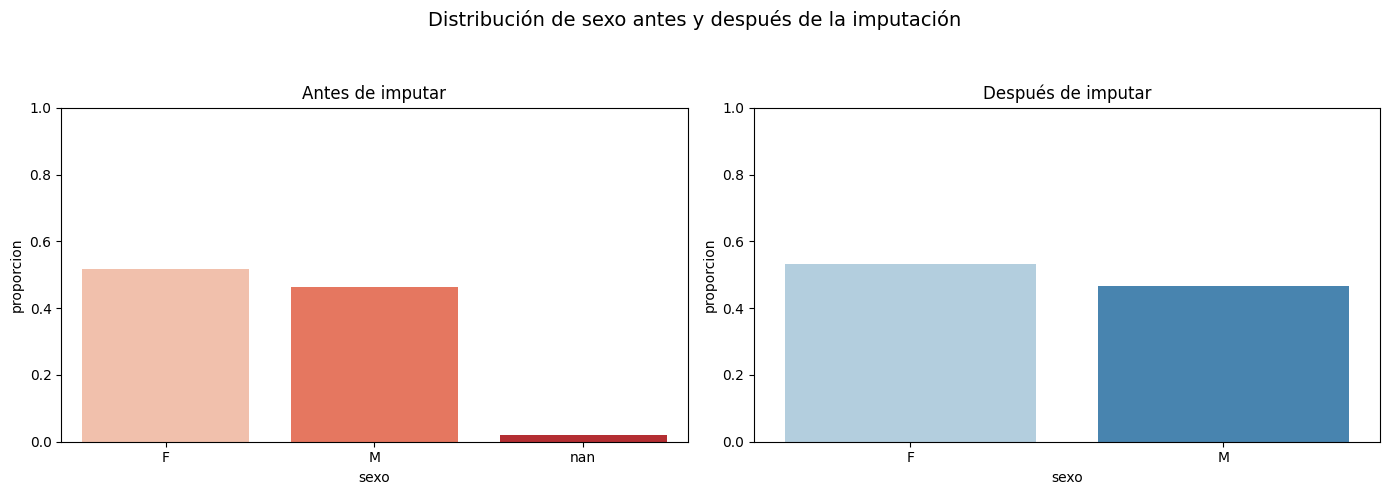

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


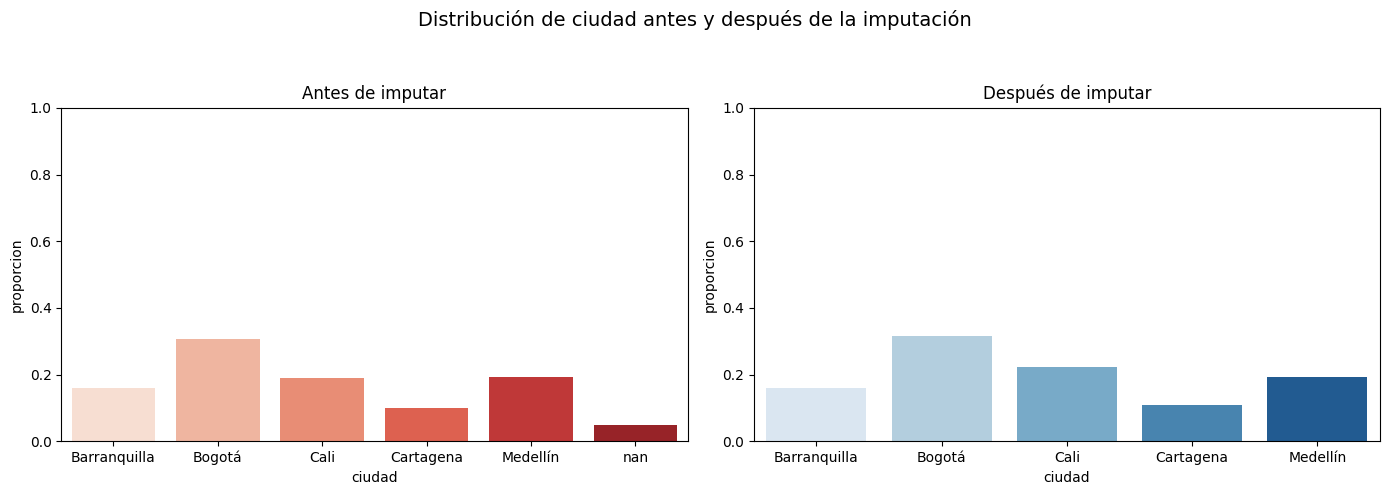

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


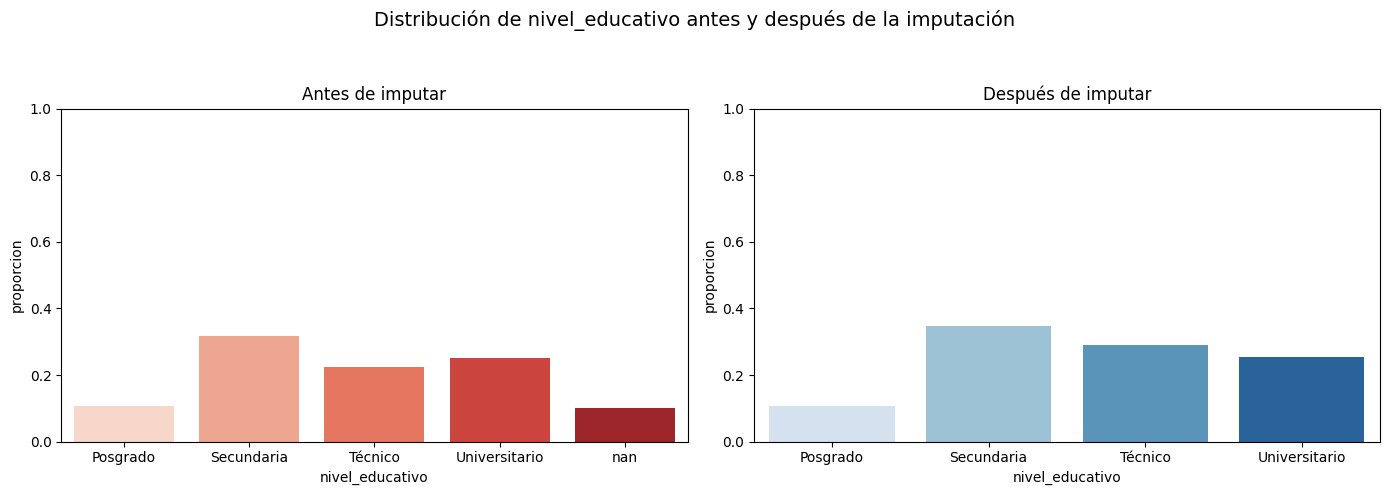

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


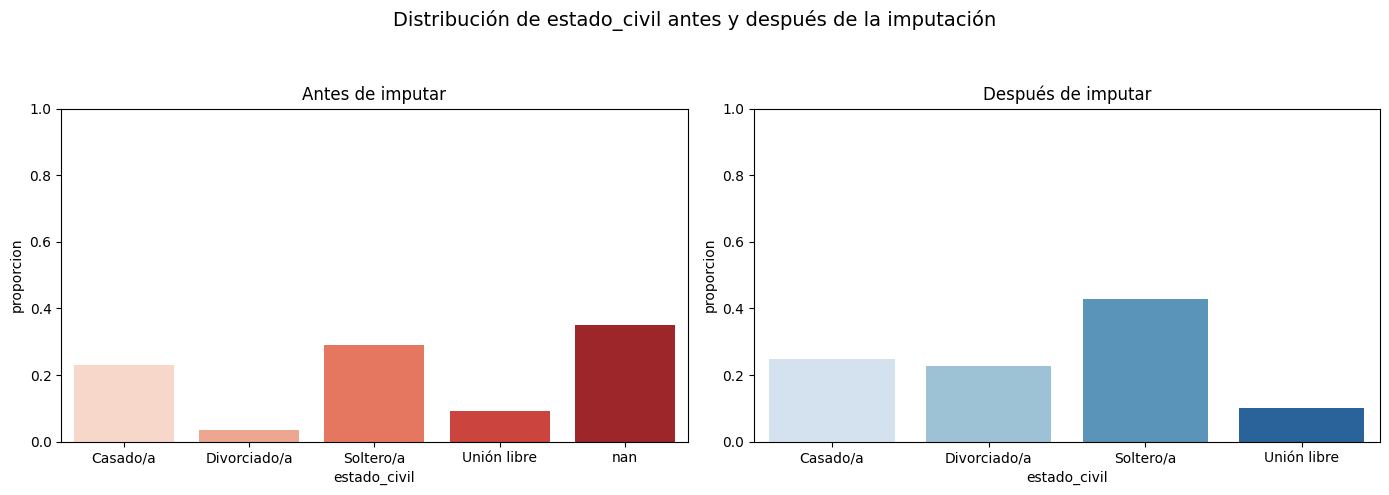

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


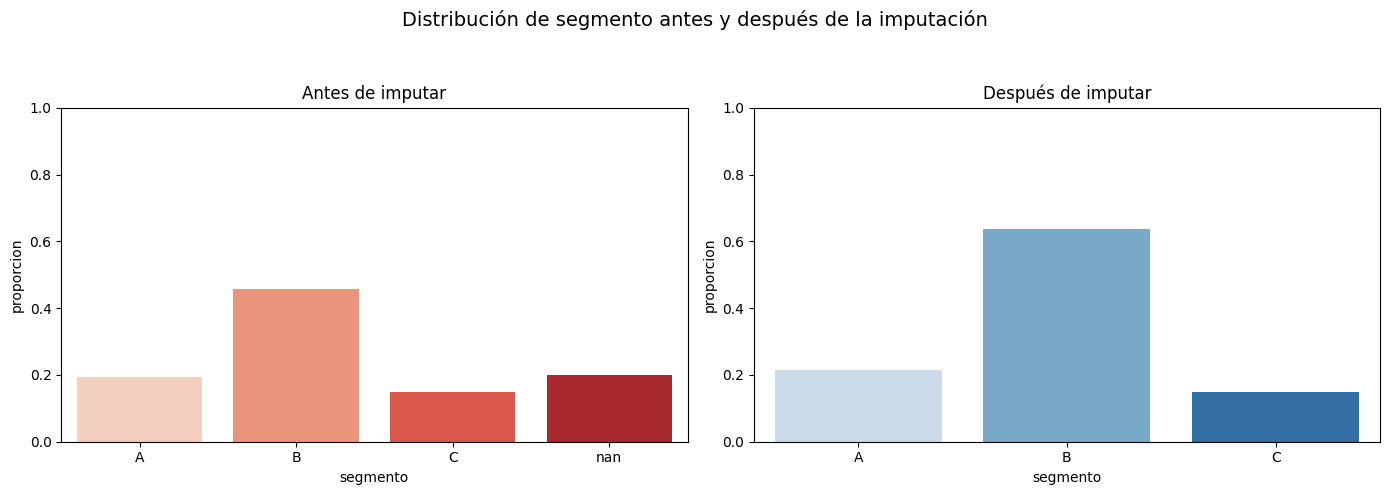

In [53]:
comparar_barras_imputacion_multiples(df, df_imputado_knn_cat, variables=vars_cat)

Podemos ver que las dsitribuciones de algunas variables como ciudad, sexo y segmento se mantuvieron con la jerarquía de las categorías con mayor frecuencia. Pero en variables como nivel_educativo y estado civil, categorías como técnnico y divorciado/a (en cada respectiva variable) presentan una frecuencia no proporcional o congruente con la distribución antes de imputar, lo queu puede estar alterando la distribución original.

##### **5.2.4.2. `hot-deck:`**

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


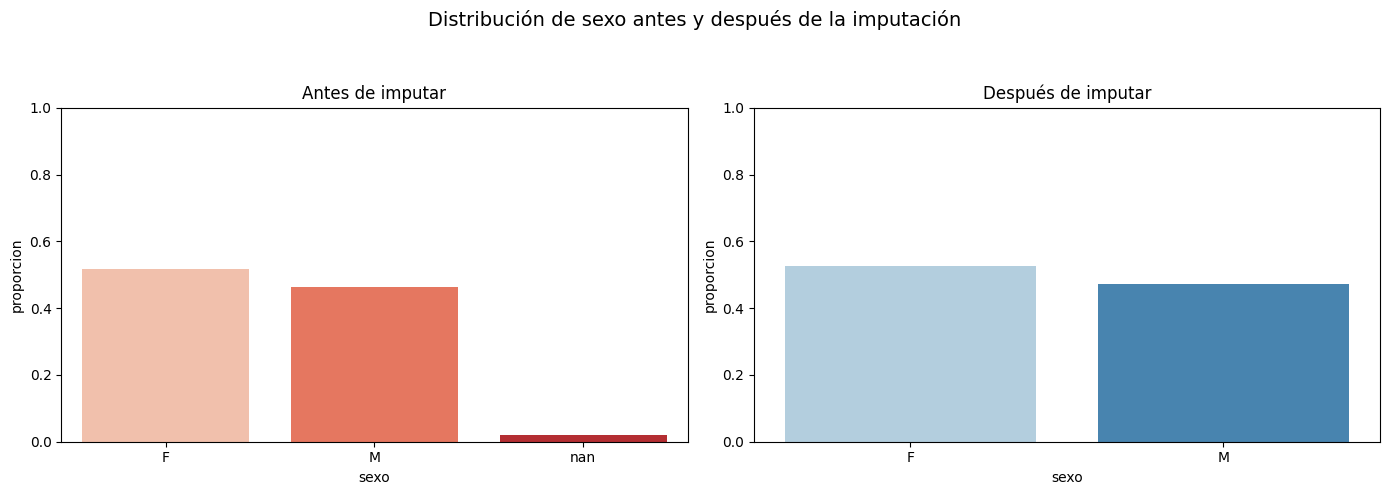

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


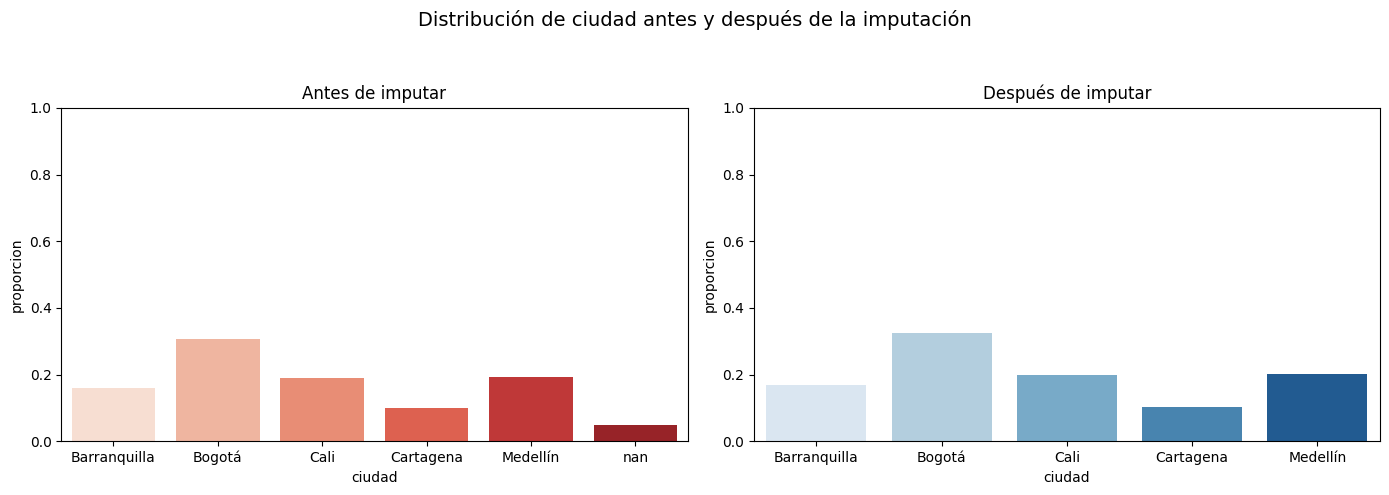

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


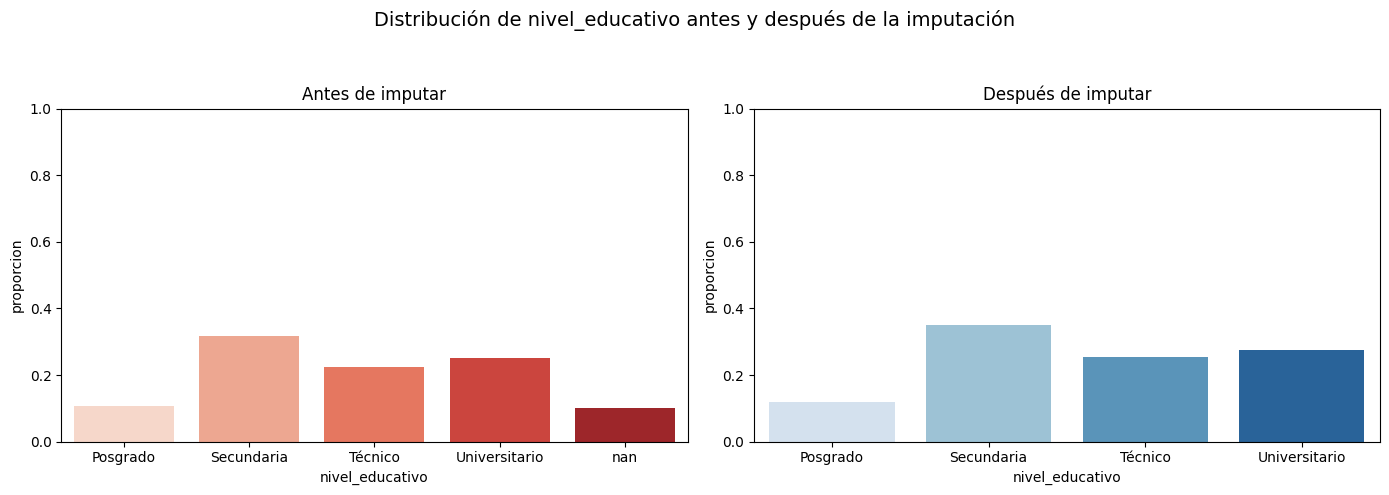

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


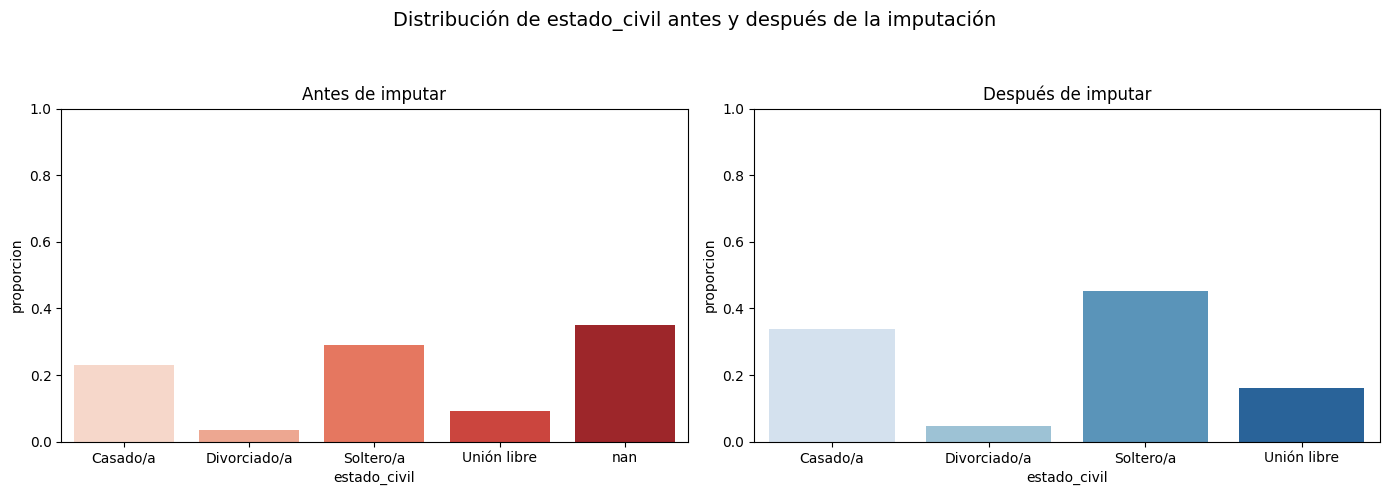

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


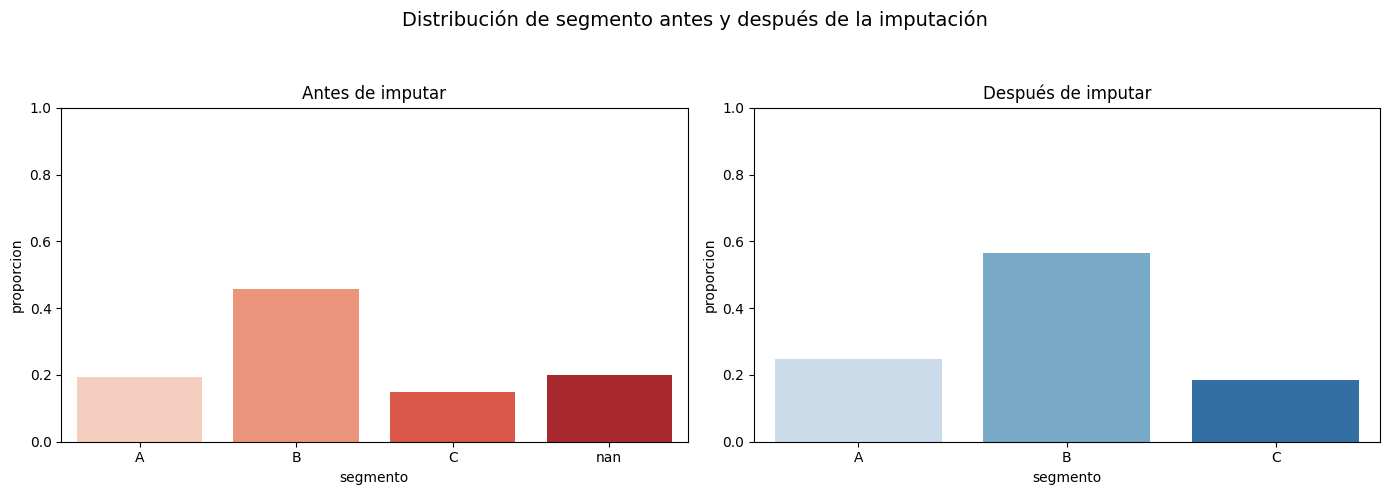

In [54]:
comparar_barras_imputacion_multiples(df, df_imputado_hd, variables=vars_cat)

El método de imputación **hot deck** resultó adecuado para estas variables categóricas, pues mantuvo la distribución original sin generar cambios drásticos en las proporciones. En sexo, ciudad y nivel educativo las frecuencias se conservaron estables, mientras que en estado civil hubo ligeras variaciones pero sin alterar la tendencia general. En conjunto, el método preserva la estructura de los datos y asigna valores coherentes, mostrando un buen desempeño en este caso.


##### **5.2.4.3. `moda:`**

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


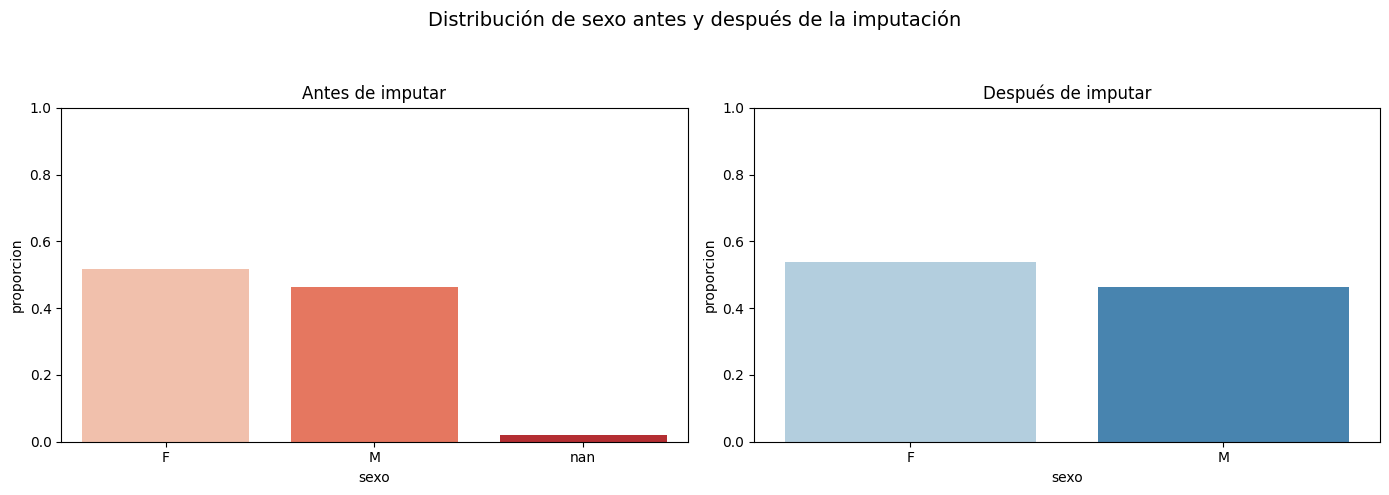

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


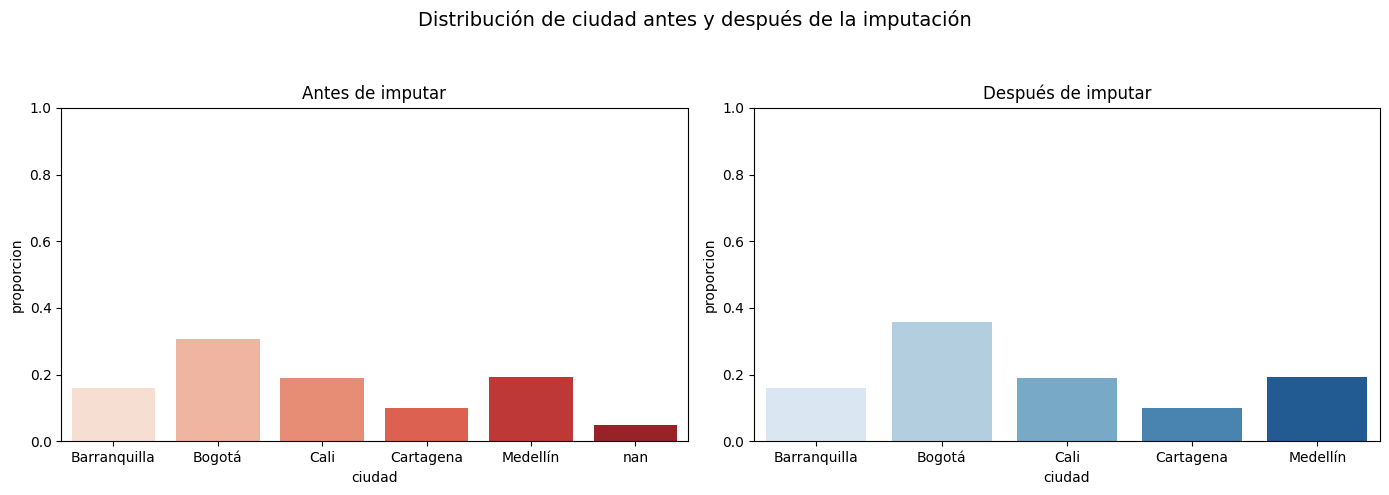

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


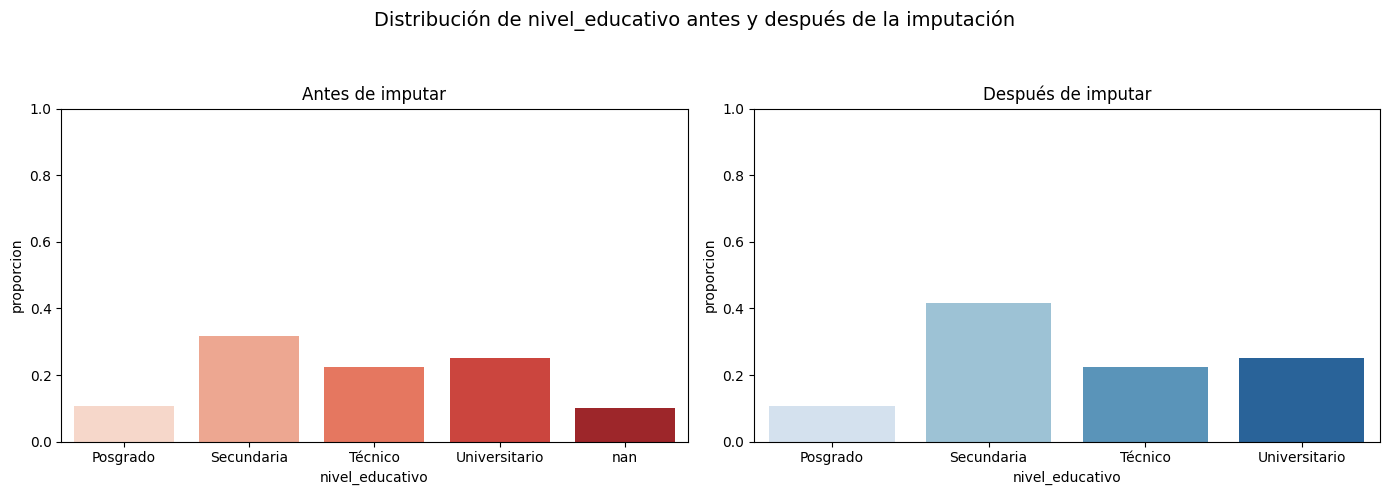

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


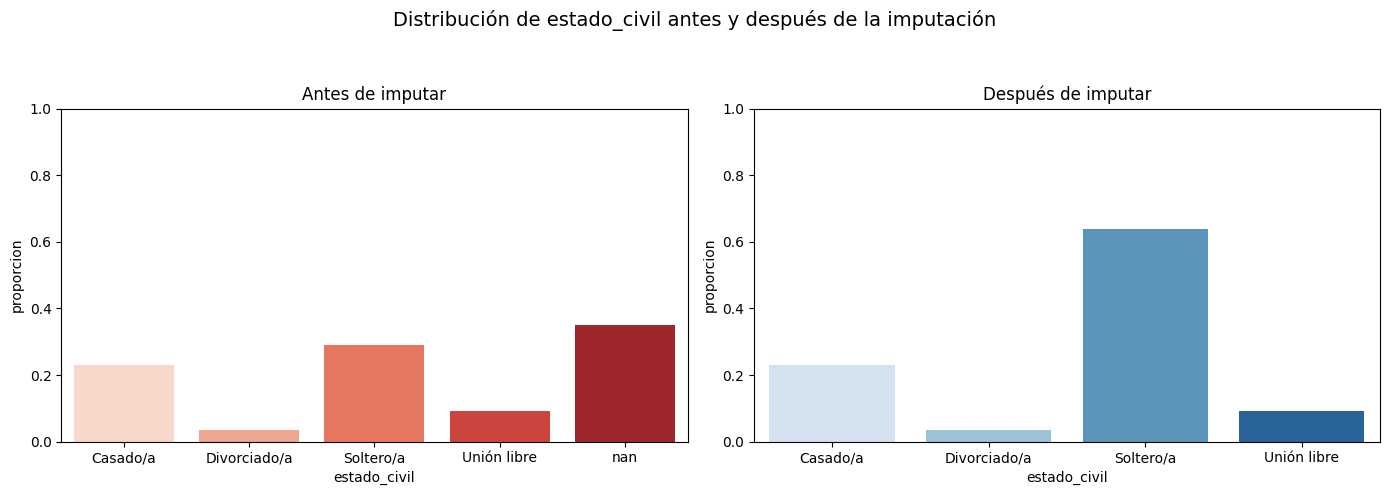

C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_antes, x=variable, y='proporcion', ax=axes[0], palette='Reds')
C:\Users\maria\AppData\Local\Temp\ipykernel_18272\1615217484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_despues, x=variable, y='proporcion', ax=axes[1], palette='Blues')


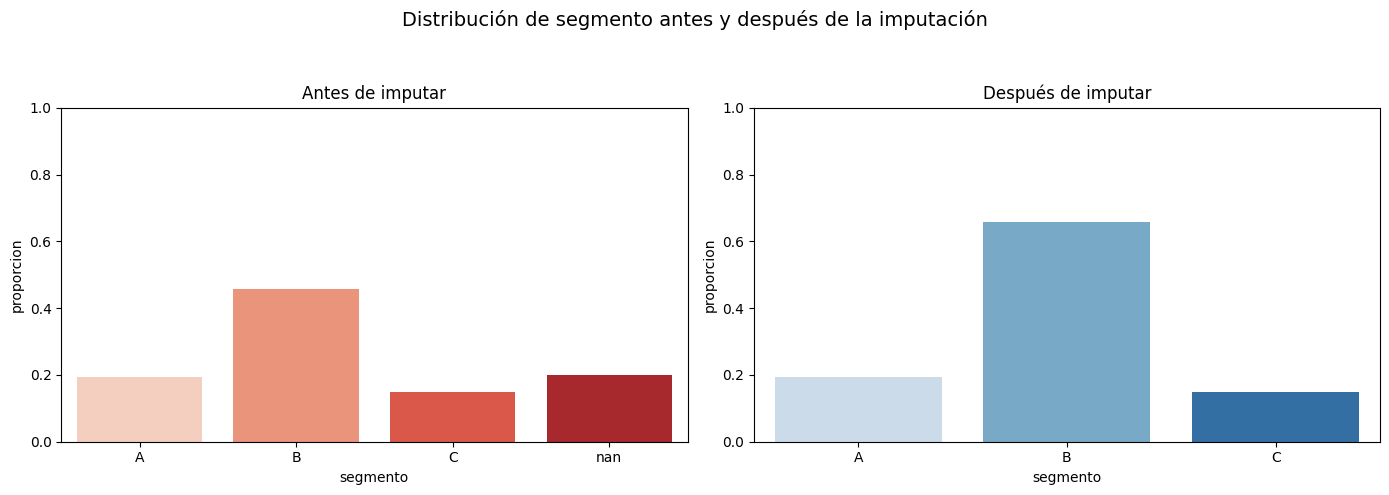

In [55]:
comparar_barras_imputacion_multiples(df, df_imputado_moda, variables=vars_cat)

Las gráficas muestran que el método de imputación por la moda tiende a mantener la distribución original cuando hay una categoría claramente dominante, como en las variables *sexo* o *nivel_educativo*, donde los cambios después de imputar son mínimos. Sin embargo, en variables con mayor dispersión o sin una moda muy marcada, como *estado_civil* o *ciudad*, se observa un aumento considerable en la categoría más frecuente, lo que altera la distribución original. Esto indica que el método puede ser útil para completar datos faltantes sin generar grandes distorsiones en variables con una moda clara, pero en otros casos puede introducir sesgos al sobrerrepresentar la categoría más común. 


## ***6. Evaluación de la imputación***

### ***6.1. Pruebas de normalidad***

En primer lugar, veamos la distribución original de cada variables según la distribución normal.

In [56]:
normalidad_antes = prueba_normalidad(df, var_num)
print(normalidad_antes)

             variable  p_value es_normal
0                edad   0.0000        No
1           altura_cm   0.5911        Sí
2            ingresos   0.3245        Sí
3       gasto_mensual   0.6752        Sí
4  puntuacion_credito   0.9405        Sí
5             demanda   0.0000        No


In [57]:
normalidad_knn = prueba_normalidad(df_imputado_knn, var_num)
print(normalidad_knn)

             variable  p_value es_normal
0                edad   0.0000        No
1           altura_cm   0.5023        Sí
2            ingresos   0.0976        Sí
3       gasto_mensual   0.0004        No
4  puntuacion_credito   0.0000        No
5             demanda   0.0000        No


Los resultados muestran que al imputar las varibles numéricas por knn, modifica el tipo de distribucióna a la que se ajustan ciertas variables. Podemos notar que La variable gasto mensual y  puntuacion_credito ya no se ajustan a una distribución normal, pero originalmente si, es decir, las distribuciones de las variables gastos_mensuales y puntuacion_credito después de la imputación, son diferentes a la original.

In [58]:
normalidad_reg = prueba_normalidad(df_imputado_reg, var_num)
print(normalidad_reg)

             variable  p_value es_normal
0                edad   0.0000        No
1           altura_cm   0.0226        No
2            ingresos   0.1464        Sí
3       gasto_mensual   0.1871        Sí
4  puntuacion_credito   0.0000        No
5             demanda   0.0001        No


Aquí podemos observar que este método modifica la distribución de variables como altura_cm y puntuacion_credito, pues originalmente estas varibales sí se ajustan a una distribución normal.

In [59]:
normalidad_media = prueba_normalidad(df_imputado_media, var_num_nor)
print(normalidad_media)

             variable  p_value es_normal
0           altura_cm   0.0045        No
1            ingresos   0.0000        No
2       gasto_mensual   0.0000        No
3  puntuacion_credito   0.0000        No


Note que al imputar las variables por la media esto modifica las distribuciones originales de las variables, pues originalmente estas se ajustaban a una distribución normal.

In [60]:
normalidad_mediana = prueba_normalidad(df_imputado_mediana, var_num_no_nor)
print(normalidad_mediana)

  variable  p_value es_normal
0     edad      0.0        No
1  demanda      0.0        No


Observe que en este caso las variables conservaron el hecho de que la distribución no se ajusta  ala normal.

### ***6.2. Pruebas de igualdad de distribuciones***

#### ***6.2.1. Variables numéricas***

En esta sección se analiza si la distribución de las variables numéricas con Nan cambia después de imputar, usando los diferentes métodos.

In [61]:
from scipy.stats import ks_2samp

def comparar_distribuciones_ks(original, imputado, variables, alpha=0.05):
    resultados = []

    for variable in variables:
        # Eliminar NaN de la muestra original
        datos_original = original[variable].dropna()
        datos_imputado = imputado[variable]

        # Prueba de Kolmogorov-Smirnov
        estadistico, p_valor = ks_2samp(datos_original, datos_imputado)

        conclusion = (
            "Las distribuciones son IGUALES (no se rechaza H₀)"
            if p_valor > alpha
            else "Las distribuciones son DIFERENTES (se rechaza H₀)"
        )

        resultados.append({
            "variable": variable,
            "estadístico_ks": estadistico,
            "p_valor": p_valor,
            "conclusion": conclusion
        })

    return resultados


In [62]:
resultados_knn = comparar_distribuciones_ks(df, df_imputado_knn, var_num)

for resultado in resultados_knn:
    print(resultado)

{'variable': 'edad', 'estadístico_ks': np.float64(0.00902061855670103), 'p_valor': np.float64(0.9999999999912338), 'conclusion': 'Las distribuciones son IGUALES (no se rechaza H₀)'}
{'variable': 'altura_cm', 'estadístico_ks': np.float64(0.018869565217391304), 'p_valor': np.float64(0.9940674980889341), 'conclusion': 'Las distribuciones son IGUALES (no se rechaza H₀)'}
{'variable': 'ingresos', 'estadístico_ks': np.float64(0.024772727272727273), 'p_valor': np.float64(0.9272466479036574), 'conclusion': 'Las distribuciones son IGUALES (no se rechaza H₀)'}
{'variable': 'gasto_mensual', 'estadístico_ks': np.float64(0.058), 'p_valor': np.float64(0.10813622162433434), 'conclusion': 'Las distribuciones son IGUALES (no se rechaza H₀)'}
{'variable': 'puntuacion_credito', 'estadístico_ks': np.float64(0.193), 'p_valor': np.float64(2.723873049184675e-11), 'conclusion': 'Las distribuciones son DIFERENTES (se rechaza H₀)'}
{'variable': 'demanda', 'estadístico_ks': np.float64(0.04352941176470588), 'p_va

Los resultados del test de Kolmogorov-Smirnov comparan las distribuciones originales (`df`) con las del DataFrame imputado (`df_imputado_knn`) para variables numéricas. Los valores p obtenidos para casi todas las variables (como edad, altura, ingresos, gasto mensual y demanda) son suficientemente altos como para no rechazar la hipótesis nula, lo que indica que las distribuciones originales y las imputadas por KNN son estadísticamente iguales. Esto sugiere que el método de imputación KNN conservó bastante bien la estructura original de los datos. No obstante, en el caso de *puntuación_credito*, el valor p es extremadamente bajo, lo que implica que la imputación sí alteró significativamente su distribución. Por lo tanto, aunque KNN parece ser un buen método para imputar la mayoría de las variables numéricas, podría no ser el más adecuado para *puntuación_credito*.

In [63]:
resultados_reg = comparar_distribuciones_ks(df, df_imputado_reg, var_num)

for resultado in resultados_reg:
    print(resultado)

{'variable': 'edad', 'estadístico_ks': np.float64(0.008670103092783505), 'p_valor': np.float64(0.9999999999990001), 'conclusion': 'Las distribuciones son IGUALES (no se rechaza H₀)'}
{'variable': 'altura_cm', 'estadístico_ks': np.float64(0.03391304347826087), 'p_valor': np.float64(0.6237628733462636), 'conclusion': 'Las distribuciones son IGUALES (no se rechaza H₀)'}
{'variable': 'ingresos', 'estadístico_ks': np.float64(0.009909090909090909), 'p_valor': np.float64(0.9999999997811465), 'conclusion': 'Las distribuciones son IGUALES (no se rechaza H₀)'}
{'variable': 'gasto_mensual', 'estadístico_ks': np.float64(0.048666666666666664), 'p_valor': np.float64(0.2548309955863561), 'conclusion': 'Las distribuciones son IGUALES (no se rechaza H₀)'}
{'variable': 'puntuacion_credito', 'estadístico_ks': np.float64(0.165), 'p_valor': np.float64(2.349515455441309e-08), 'conclusion': 'Las distribuciones son DIFERENTES (se rechaza H₀)'}
{'variable': 'demanda', 'estadístico_ks': np.float64(0.05858823529

Los resultados del test de Kolmogorov-Smirnov muestran que, tras la imputación por regresión, las distribuciones de la mayoría de las variables numéricas (edad, altura, ingresos, gasto mensual y demanda) no presentan diferencias significativas respecto a los datos originales, ya que los valores p son altos y no se rechaza la hipótesis nula. Esto indica que el proceso de imputación logró mantener la forma de las distribuciones originales en esos casos. Sin embargo, en la variable *puntuacion_credito* se observa una diferencia estadísticamente significativa entre la distribución original y la imputada (valor p muy bajo), lo que sugiere que la regresión alteró sustancialmente esa variable. 


In [64]:
resultados_media = comparar_distribuciones_ks(df, df_imputado_media, var_num_nor)

for resultado in resultados_media:
    print(resultado)

{'variable': 'altura_cm', 'estadístico_ks': np.float64(0.04017391304347826), 'p_valor': np.float64(0.4079486277585289), 'conclusion': 'Las distribuciones son IGUALES (no se rechaza H₀)'}
{'variable': 'ingresos', 'estadístico_ks': np.float64(0.06027272727272727), 'p_valor': np.float64(0.06334067759356184), 'conclusion': 'Las distribuciones son IGUALES (no se rechaza H₀)'}
{'variable': 'gasto_mensual', 'estadístico_ks': np.float64(0.127), 'p_valor': np.float64(1.7855545182171186e-06), 'conclusion': 'Las distribuciones son DIFERENTES (se rechaza H₀)'}
{'variable': 'puntuacion_credito', 'estadístico_ks': np.float64(0.252), 'p_valor': np.float64(4.975721961137611e-19), 'conclusion': 'Las distribuciones son DIFERENTES (se rechaza H₀)'}


Al comparar las distribuciones originales con las obtenidas tras imputar por la media en variables con distribución aproximadamente normal, se observa que *altura_cm* e *ingresos* mantienen distribuciones similares, ya que los valores p del test de Kolmogorov-Smirnov son suficientemente altos y no se rechaza la hipótesis nula. Esto sugiere que imputar con la media no alteró significativamente su forma. Sin embargo, en las variables *gasto_mensual* y especialmente *puntuacion_credito*, los resultados muestran diferencias estadísticamente significativas con valores p muy bajos, lo que indica que la imputación con la media sí distorsionó sus distribuciones originales. Esto puede deberse a que, aunque sean variables numéricas, su distribución real no es perfectamente normal o la media no es representativa en presencia de asimetría o outliers. En conclusión, imputar con la media puede funcionar razonablemente bien en algunos casos, pero no garantiza preservar la distribución original en todos los contextos.

In [65]:
resultados_mediana = comparar_distribuciones_ks(df, df_imputado_mediana, var_num_no_nor)

for resultado in resultados_mediana:
    print(resultado)

{'variable': 'edad', 'estadístico_ks': np.float64(0.014783505154639175), 'p_valor': np.float64(0.9998473755734092), 'conclusion': 'Las distribuciones son IGUALES (no se rechaza H₀)'}
{'variable': 'demanda', 'estadístico_ks': np.float64(0.075), 'p_valor': np.float64(0.010672931214352237), 'conclusion': 'Las distribuciones son DIFERENTES (se rechaza H₀)'}


Al aplicar la prueba de Kolmogorov-Smirnov para comparar las distribuciones originales con las distribuciones después de imputar los valores faltantes utilizando la mediana, se observaron dos resultados diferentes. En el caso de la variable **edad**, el estadístico KS fue muy bajo (0.0148) y el p-valor extremadamente alto (0.9998), lo que indica que no hay una diferencia significativa entre ambas distribuciones, por lo tanto, se concluye que imputar con la mediana no afectó la forma de la distribución de esta variable. En cambio, para la variable **demanda**, el estadístico KS fue mayor (0.075) y el p-valor bastante bajo (0.0106), lo que sugiere que sí hubo una diferencia significativa entre las distribuciones antes y después de imputar, lo que lleva a rechazar la hipótesis nula. Esto significa que imputar la mediana en la variable demanda sí altera su distribución.

#### ***6.2.2. Variables categóricas***

In [66]:
from scipy.stats import chi2_contingency
import pandas as pd

def comparar_distribuciones_categoricas(original, imputado, variables, alpha=0.05):
    resultados = []

    for variable in variables:
        # Eliminar NaNs de la muestra original
        datos_original = original[variable].dropna()
        datos_imputado = imputado[variable]

        # Crear tabla de contingencia (frecuencias absolutas por categoría)
        tabla = pd.crosstab(
            pd.Series(['original'] * len(datos_original) + ['imputado'] * len(datos_imputado), name='fuente'),
            pd.Series(datos_original.tolist() + datos_imputado.tolist(), name=variable)
        )

        # Aplicar prueba chi-cuadrado
        chi2, p_valor, dof, esperado = chi2_contingency(tabla)

        conclusion = (
            "Las distribuciones son IGUALES (no se rechaza H₀)"
            if p_valor > alpha
            else "Las distribuciones son DIFERENTES (se rechaza H₀)"
        )

        resultados.append({
            "variable": variable,
            "estadístico_chi2": chi2,
            "p_valor": p_valor,
            "grados_de_libertad": dof,
            "conclusion": conclusion
        })

    return pd.DataFrame(resultados)


In [67]:
resultados_cat_knn = comparar_distribuciones_categoricas(df, df_imputado_knn_cat, vars_cat)

print(resultados_cat_knn)

          variable  estadístico_chi2       p_valor  grados_de_libertad  \
0             sexo          0.023223  8.788797e-01                   1   
1           ciudad          1.889482  7.560769e-01                   4   
2  nivel_educativo          4.461802  2.157228e-01                   3   
3     estado_civil         94.774846  2.063965e-20                   3   
4         segmento          8.272882  1.597962e-02                   2   

                                          conclusion  
0  Las distribuciones son IGUALES (no se rechaza H₀)  
1  Las distribuciones son IGUALES (no se rechaza H₀)  
2  Las distribuciones son IGUALES (no se rechaza H₀)  
3  Las distribuciones son DIFERENTES (se rechaza H₀)  
4  Las distribuciones son DIFERENTES (se rechaza H₀)  


Al comparar las distribuciones originales con las distribuciones tras imputar los valores faltantes usando el método KNN en variables categóricas, se aplicó la prueba de chi-cuadrado para evaluar si hubo cambios significativos. Los resultados muestran que para las variables **sexo**, **ciudad** y **nivel_educativo**, los p-valores fueron suficientemente altos, lo que indica que no hay evidencia para afirmar que sus distribuciones hayan cambiado luego de la imputación; por lo tanto, se concluye que se mantienen iguales. En contraste, las variables **estado_civil** y **segmento** presentaron p-valores muy bajos, especialmente estado_civil, cuyo valor es prácticamente cero. Esto indica que estas dos variables sí presentan diferencias estadísticamente significativas entre la distribución original y la imputada, lo cual sugiere que el método KNN podría estar introduciendo sesgo en ellas. 

In [68]:
resultados_cat_hd = comparar_distribuciones_categoricas(df, df_imputado_hd, vars_cat)

print(resultados_cat_hd)

          variable  estadístico_chi2   p_valor  grados_de_libertad  \
0             sexo          0.000626  0.980047                   1   
1           ciudad          0.069776  0.999405                   4   
2  nivel_educativo          0.069416  0.995236                   3   
3     estado_civil          1.771651  0.621123                   3   
4         segmento          0.101595  0.950471                   2   

                                          conclusion  
0  Las distribuciones son IGUALES (no se rechaza H₀)  
1  Las distribuciones son IGUALES (no se rechaza H₀)  
2  Las distribuciones son IGUALES (no se rechaza H₀)  
3  Las distribuciones son IGUALES (no se rechaza H₀)  
4  Las distribuciones son IGUALES (no se rechaza H₀)  


Luego de aplicar la técnica de imputación *Hot Deck* para completar los valores faltantes en las variables categóricas, se utilizó la prueba chi-cuadrado para comparar las distribuciones originales con las imputadas. Los resultados muestran que para todas las variables analizadas (**sexo**, **ciudad**, **nivel_educativo**, **estado_civil** y **segmento**) los p-valores son muy altos, todos por encima de 0.6 y la mayoría cercanos a 1, lo que indica que no hay evidencia estadística para afirmar que las distribuciones hayan cambiado. En otras palabras, no se rechaza la hipótesis nula en ninguno de los casos, lo cual sugiere que el método *Hot Deck* conservó muy bien la estructura original de los datos categóricos y no introdujo diferencias significativas en las distribuciones. 

In [69]:
resultados_cat_moda = comparar_distribuciones_categoricas(df, df_imputado_moda, vars_cat)

print(resultados_cat_moda)

          variable  estadístico_chi2       p_valor  grados_de_libertad  \
0             sexo          0.140932  7.073557e-01                   1   
1           ciudad          2.484643  6.473879e-01                   4   
2  nivel_educativo          8.384045  3.870693e-02                   3   
3     estado_civil         60.186104  5.363963e-13                   3   
4         segmento         13.855476  9.802157e-04                   2   

                                          conclusion  
0  Las distribuciones son IGUALES (no se rechaza H₀)  
1  Las distribuciones son IGUALES (no se rechaza H₀)  
2  Las distribuciones son DIFERENTES (se rechaza H₀)  
3  Las distribuciones son DIFERENTES (se rechaza H₀)  
4  Las distribuciones son DIFERENTES (se rechaza H₀)  


Después de imputar los valores faltantes en variables categóricas usando el método de la moda, se aplicó la prueba chi-cuadrado para comparar si las distribuciones resultantes seguían siendo similares a las originales. Los resultados muestran que para las variables **sexo** y **ciudad**, los p-valores son altos, lo que indica que las distribuciones no cambiaron significativamente tras la imputación y, por tanto, no se rechaza la hipótesis nula. Sin embargo, en las variables **nivel_educativo**, **estado_civil** y **segmento**, los p-valores son muy bajos (especialmente en estado_civil), lo que significa que hay diferencias estadísticamente significativas entre las distribuciones originales y las imputadas.

### ***6.3. Comparación de medias o rangos***

In [70]:
from scipy.stats import ttest_ind, mannwhitneyu
import pandas as pd

def comparar_distribuciones_numericas(original, imputado, variables, alpha=0.05, metodo='t-test'):
    resultados = []

    for variable in variables:
        # Eliminar NaNs de la muestra original
        datos_original = original[variable].dropna()
        datos_imputado = imputado[variable].dropna()

        # Asegurar que hay suficientes datos
        if len(datos_original) < 2 or len(datos_imputado) < 2:
            resultados.append({
                "variable": variable,
                "estadístico": None,
                "p_valor": None,
                "conclusion": "Datos insuficientes"
            })
            continue

        # Elegir método
        if metodo == 't-test':
            estadistico, p_valor = ttest_ind(datos_original, datos_imputado, equal_var=False)  # Welch's t-test
            prueba = "t de Student"
        elif metodo == 'mannwhitney':
            estadistico, p_valor = mannwhitneyu(datos_original, datos_imputado, alternative='two-sided')
            prueba = "Mann-Whitney U"
        else:
            raise ValueError("Método no reconocido. Usa 't-test' o 'mannwhitney'.")

        conclusion = (
            "Las distribuciones son IGUALES (no se rechaza H₀)"
            if p_valor > alpha
            else "Las distribuciones son DIFERENTES (se rechaza H₀)"
        )

        resultados.append({
            "variable": variable,
            "prueba": prueba,
            "estadístico": estadistico,
            "p_valor": p_valor,
            "conclusion": conclusion
        })

    return pd.DataFrame(resultados)


In [71]:
resultados_ttest_knn = comparar_distribuciones_numericas(df, df_imputado_knn, var_num_nor, metodo='t-test')
resultados_mwu_knn = comparar_distribuciones_numericas(df, df_imputado_knn, var_num_no_nor, metodo='mannwhitney')

print(resultados_ttest_knn)
print("\n")
print(resultados_mwu_knn)

             variable        prueba  estadístico   p_valor  \
0           altura_cm  t de Student    -0.037696  0.969934   
1            ingresos  t de Student     0.622812  0.533486   
2       gasto_mensual  t de Student     0.930853  0.352078   
3  puntuacion_credito  t de Student     3.774328  0.000172   

                                          conclusion  
0  Las distribuciones son IGUALES (no se rechaza H₀)  
1  Las distribuciones son IGUALES (no se rechaza H₀)  
2  Las distribuciones son IGUALES (no se rechaza H₀)  
3  Las distribuciones son DIFERENTES (se rechaza H₀)  


  variable          prueba  estadístico   p_valor  \
0     edad  Mann-Whitney U     485606.5  0.961700   
1  demanda  Mann-Whitney U     417695.0  0.523523   

                                          conclusion  
0  Las distribuciones son IGUALES (no se rechaza H₀)  
1  Las distribuciones son IGUALES (no se rechaza H₀)  


En esta sección se comparan las medias o rangos de variables numéricas antes y después de imputar los valores faltantes utilizando el método KNN. Para las variables con distribución normal se aplicó la prueba t de Student, mientras que para las variables no normales se utilizó la prueba de Mann-Whitney U. Los resultados muestran que las variables **altura_cm**, **ingresos** y **gasto_mensual** no presentan diferencias estadísticamente significativas después de la imputación (p-valores altos), lo que indica que el método KNN conservó bien las medias originales. Sin embargo, en la variable **puntuacion_credito**, se obtuvo un p-valor muy bajo (0.000172), por lo que se concluye que hubo un cambio significativo tras la imputación, lo cual sugiere que esta variable podría haber sido afectada por el proceso. Por otro lado, las variables **edad** y **demanda**, evaluadas con la prueba de Mann-Whitney U, tampoco mostraron diferencias significativas entre sus distribuciones originales e imputadas, lo que indica que el método KNN también fue adecuado en esos casos al no alterar significativamente los rangos.


In [72]:
resultados_ttest_reg = comparar_distribuciones_numericas(df, df_imputado_reg, var_num_nor, metodo='t-test')
resultados_mwu_reg = comparar_distribuciones_numericas(df, df_imputado_reg, var_num_no_nor, metodo='mannwhitney')

print(resultados_ttest_reg)
print("\n")
print(resultados_mwu_reg)

             variable        prueba  estadístico   p_valor  \
0           altura_cm  t de Student    -0.018890  0.984931   
1            ingresos  t de Student     0.048908  0.960998   
2       gasto_mensual  t de Student     1.666044  0.095903   
3  puntuacion_credito  t de Student    -0.355994  0.721943   

                                          conclusion  
0  Las distribuciones son IGUALES (no se rechaza H₀)  
1  Las distribuciones son IGUALES (no se rechaza H₀)  
2  Las distribuciones son IGUALES (no se rechaza H₀)  
3  Las distribuciones son IGUALES (no se rechaza H₀)  


  variable          prueba  estadístico   p_valor  \
0     edad  Mann-Whitney U     485666.0  0.957943   
1  demanda  Mann-Whitney U     424103.0  0.937594   

                                          conclusion  
0  Las distribuciones son IGUALES (no se rechaza H₀)  
1  Las distribuciones son IGUALES (no se rechaza H₀)  


En esta parte del análisis se comparan las distribuciones de variables numéricas antes y después de imputar los datos faltantes utilizando el método de regresión. Para aquellas variables con distribución normal se aplicó la prueba t de Student, mientras que para las que no eran normales se usó la prueba de Mann-Whitney U. Los resultados muestran que en todos los casos los p-valores fueron altos, por lo que no se rechaza la hipótesis nula en ninguna de las variables analizadas. Esto indica que las distribuciones originales y las imputadas son estadísticamente iguales, lo que sugiere que la imputación por regresión logró mantener la estructura original de los datos numéricos sin introducir cambios significativos en las medias o rangos. 


In [73]:
resultados_ttest_media = comparar_distribuciones_numericas(df, df_imputado_media, var_num_nor, metodo='t-test')
resultados_mwu_mediana = comparar_distribuciones_numericas(df, df_imputado_mediana, var_num_no_nor, metodo='mannwhitney')

print(resultados_ttest_media)
print("\n")
print(resultados_mwu_mediana)

             variable        prueba   estadístico  p_valor  \
0           altura_cm  t de Student  0.000000e+00      1.0   
1            ingresos  t de Student  0.000000e+00      1.0   
2       gasto_mensual  t de Student -8.558774e-15      1.0   
3  puntuacion_credito  t de Student -2.848573e-14      1.0   

                                          conclusion  
0  Las distribuciones son IGUALES (no se rechaza H₀)  
1  Las distribuciones son IGUALES (no se rechaza H₀)  
2  Las distribuciones son IGUALES (no se rechaza H₀)  
3  Las distribuciones son IGUALES (no se rechaza H₀)  


  variable          prueba  estadístico  p_valor  \
0     edad  Mann-Whitney U     485075.0  0.99529   
1  demanda  Mann-Whitney U     425000.0  1.00000   

                                          conclusion  
0  Las distribuciones son IGUALES (no se rechaza H₀)  
1  Las distribuciones son IGUALES (no se rechaza H₀)  


En esta parte del análisis se comparan las variables numéricas antes y después de imputar los valores faltantes utilizando dos métodos simples: la media para variables normales y la mediana para variables no normales. Se aplicó la prueba t de Student en variables con distribución normal y la prueba de Mann-Whitney U en aquellas no normales. Los resultados muestran que en todos los casos los p-valores son muy altos (todos cercanos o iguales a 1), lo que indica que no hay diferencias estadísticamente significativas entre las distribuciones originales y las imputadas. Esto sugiere que imputar con la media o la mediana no alteró de manera importante la estructura de los datos numéricos. 

### **6.4. Comparación general de los métodos de imputación (según la comparación de medias/rangos)**

#### Métodos para variables **categóricas**

- **KNN:**
  - Funcionó bien para algunas variables (**sexo**, **ciudad**, **nivel_educativo**).
  - Alteró significativamente la distribución en **estado_civil** y **segmento**.
  - Introduce sesgos en categorías con más variabilidad.

- **Hot Deck:**
  - Fue el método más robusto para variables categóricas.
  - Conservó la distribución en **todas las variables categóricas**.
  

- **Moda:**
  - Solo conservó la distribución de **sexo** y **ciudad**.
  - Cambió significativamente **nivel_educativo**, **estado_civil** y **segmento**.
  - Es el método más simple pero menos preciso, ya que tiende a sobre-representar la categoría más frecuente.

---

#### Métodos para variables **numéricas**

- **KNN:**
  - Conservó la distribución en la mayoría de las variables numéricas (**altura_cm**, **ingresos**, **gasto_mensual**, **edad**, **demanda**).
  - Solo **puntuacion_credito** presentó una diferencia significativa.
  - Buen desempeño general, aunque puede ser sensible a outliers o escalas distintas.

- **Regresión:**
  - No hubo diferencias significativas en **ninguna variable numérica**.
  - Preservó tanto medias como rangos.


- **Media / Mediana:**
  - Todos los p-valores fueron cercanos a 1, indicando que **todas las distribuciones se conservaron perfectamente**.
  - Sorprendentemente, estos métodos simples funcionaron muy bien en este conjunto de datos.


---

### Conclusión general

- **Hot Deck** y **Regresión** fueron los métodos más estables en términos de mantener la distribución original.
- **KNN** tuvo un desempeño decente, pero con algunas fallas en variables específicas.
- **Moda** resultó ser el menos fiable para variables categóricas.
- **Media / Mediana**, aunque básicos, funcionaron de forma excelente con las variables numéricas de este dataset.



## ***7. Conlusión preliminar***

| Variable       | % Nulos | Tipo de Ausencia | Método sugerido de imputación | Evidencia sobre la distribución |
|----------------|---------|------------------|-------------------------------|--------------------------------|
| Sexo           | 2%      | MAR              | Moda                          | La imputación por Moda mantiene las frecuencias de las categorías casi idénticas a las originales; con tan pocos nulos no se altera la distribución. |
| Ciudad         | 5%      | MAR              | KNN                           | La imputación con KNN conserva la proporción de categorías más cercana al original; las gráficas muestran menor desviación frente a Moda o Hot-Deck. |
| Nivel_educativo| 10%     | MAR              | Hot Deck                      | Hot-Deck reproduce la variabilidad observada en las categorías y las distribuciones imputadas se asemejan a las originales según las frecuencias. |
| Segmento       | 20%     | MAR              | Regresión                     | La imputación por Regresión genera distribuciones de categorías equivalentes a las originales; mantiene la estructura sin concentrar en una sola categoría como ocurre con Moda. |
| Estado_civil   | 35%     | MAR              | KNN                           | En las gráficas se observa que Moda concentra excesivamente en una categoría; KNN distribuye los valores imputados de forma más cercana a la original. |
| Edad           | 3%      | MCAR             | Regresión                     | Test KS: estadístico=0.0087, p≈1.0 → distribuciones iguales; menor KS que KNN (0.0090). Regresión es el ajuste más fiel a la distribución original. |
| Altura_cm      | 8%      | MAR              | KNN                           | Test KS: estadístico=0.0188, p≈0.994 → mejor que Regresión (0.0339, p≈0.62) y Media (0.0401, p≈0.40). KNN conserva más la distribución original. |
| Ingresos       | 12%     | MAR              | Regresión                     | Test KS: estadístico=0.0099, p≈1.0 → mejor que KNN (0.0247, p≈0.92) y Media (0.0602, p≈0.06). Regresión mantiene la distribución con mayor fidelidad. |
| Gasto_mensual  | 25%     | MAR              | Regresión                     | Test KS: estadístico=0.0486, p≈0.25 → distribuciones iguales. Media rechaza H₀ (p≈1.7e-06) y KNN es menos preciso (KS=0.058, p≈0.10). |
| Puntuacion_credito | 50% | MCAR             | —                              | Todos los métodos difieren significativamente: KNN (KS=0.193, p≈2.7e-11), Regresión (KS=0.165, p≈2.3e-08), Media (KS=0.252, p≈4.9e-19). Ninguno mantiene la distribución. |
| Demanda        | 15%     | MAR              | KNN                           | Test KS: estadístico=0.0435, p≈0.33 → distribuciones iguales. Mejor que Regresión (KS=0.0585, p≈0.08), donde casi se rechaza H₀. |
